In [245]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append("../python/")
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import math
import matplotlib as mpl

In [246]:
with open(r'../../results/outcomes/Cost/Analyze result/ npv_cost.csv') as cost:
    df_cost=pd.read_csv(cost)
df_cost

Strategy  lifecycle_infrastructure_el  environmental_restoration_el  \
0        S1                 3.262527e+06                         0.000   
1        S2                 3.262527e+06                         0.000   
2        S3                 3.262527e+06                         0.000   
3        S4                 2.433064e+07                   1422186.244   
4        S5                 3.416034e+07                   2968567.363   
5        S6                 2.481681e+07                   1422186.244   
6        S7                 2.433064e+07                   1422186.244   
7        S8                 2.481681e+07                   1422186.244   
8        S9                 2.433064e+07                   1422186.244   
9       S10                 3.485867e+07                   2968567.363   
10      S11                 3.416034e+07                   2968567.363   
11      S12                 3.485867e+07                   2968567.363   
12      S13                 3.416034e+07                   2968567.363   

      safety_el  total_cost_el  lifecycle_infrastructure_br  \
0   1048641.360   4.311168e+06                 1.766953e+06   
1   1048641.360   4.311168e+06                 2.330422e+07   
2   1048641.360   4.311168e+06                 3.304793e+07   
3   1881130.310   2.763396e+07                 1.766953e+06   
4   2822655.341   3.995156e+07                 1.766953e+06   
5   1881130.310   2.812013e+07                 4.520485e+06   
6   1881130.310   2.763396e+07                 2.330422e+07   
7   1881130.310   2.812013e+07                 2.602966e+06   
8   1881130.310   2.763396e+07                 1.052076e+07   
9   2822655.341   4.064989e+07                 6.067214e+06   
10  2822655.341   3.995156e+07                 3.304793e+07   
11  2822655.341   4.064989e+07                 3.306052e+06   
12  2822655.341   3.995156e+07                 1.464019e+07   

    environmental_restoration_br    safety_br  total_cost_br  
0                          0.000  1048641.360   2.815594e+06  
1                    1422186.244  1881130.310   2.660754e+07  
2                    2968567.363  2822655.341   3.883915e+07  
3                          0.000  1048641.360   2.815594e+06  
4                          0.000  1048641.360   2.815594e+06  
5                    1422186.244  1881130.310   7.823801e+06  
6                    1422186.244  1881130.310   2.660754e+07  
7                    1422186.244  1881130.310   5.906282e+06  
8                    1422186.244  1881130.310   1.382408e+07  
9                    2968567.363  2822655.341   1.185844e+07  
10                   2968567.363  2822655.341   3.883915e+07  
11                   2968567.363  2822655.341   9.097275e+06  
12                   2968567.363  2822655.341   2.043141e+07

In [247]:
df_cost = df_cost.set_index('Strategy')

In [248]:
df_cost=df_cost.drop(['total_cost_el', 'total_cost_br'], axis=1)

In [249]:
df_cost

lifecycle_infrastructure_el  environmental_restoration_el  \
Strategy                                                              
S1                       3.262527e+06                         0.000   
S2                       3.262527e+06                         0.000   
S3                       3.262527e+06                         0.000   
S4                       2.433064e+07                   1422186.244   
S5                       3.416034e+07                   2968567.363   
S6                       2.481681e+07                   1422186.244   
S7                       2.433064e+07                   1422186.244   
S8                       2.481681e+07                   1422186.244   
S9                       2.433064e+07                   1422186.244   
S10                      3.485867e+07                   2968567.363   
S11                      3.416034e+07                   2968567.363   
S12                      3.485867e+07                   2968567.363   
S13                      3.416034e+07                   2968567.363   

            safety_el  lifecycle_infrastructure_br  \
Strategy                                             
S1        1048641.360                 1.766953e+06   
S2        1048641.360                 2.330422e+07   
S3        1048641.360                 3.304793e+07   
S4        1881130.310                 1.766953e+06   
S5        2822655.341                 1.766953e+06   
S6        1881130.310                 4.520485e+06   
S7        1881130.310                 2.330422e+07   
S8        1881130.310                 2.602966e+06   
S9        1881130.310                 1.052076e+07   
S10       2822655.341                 6.067214e+06   
S11       2822655.341                 3.304793e+07   
S12       2822655.341                 3.306052e+06   
S13       2822655.341                 1.464019e+07   

          environmental_restoration_br    safety_br  
Strategy                                             
S1                               0.000  1048641.360  
S2                         1422186.244  1881130.310  
S3                         2968567.363  2822655.341  
S4                               0.000  1048641.360  
S5                               0.000  1048641.360  
S6                         1422186.244  1881130.310  
S7                         1422186.244  1881130.310  
S8                         1422186.244  1881130.310  
S9                         1422186.244  1881130.310  
S10                        2968567.363  2822655.341  
S11                        2968567.363  2822655.341  
S12                        2968567.363  2822655.341  
S13                        2968567.363  2822655.341

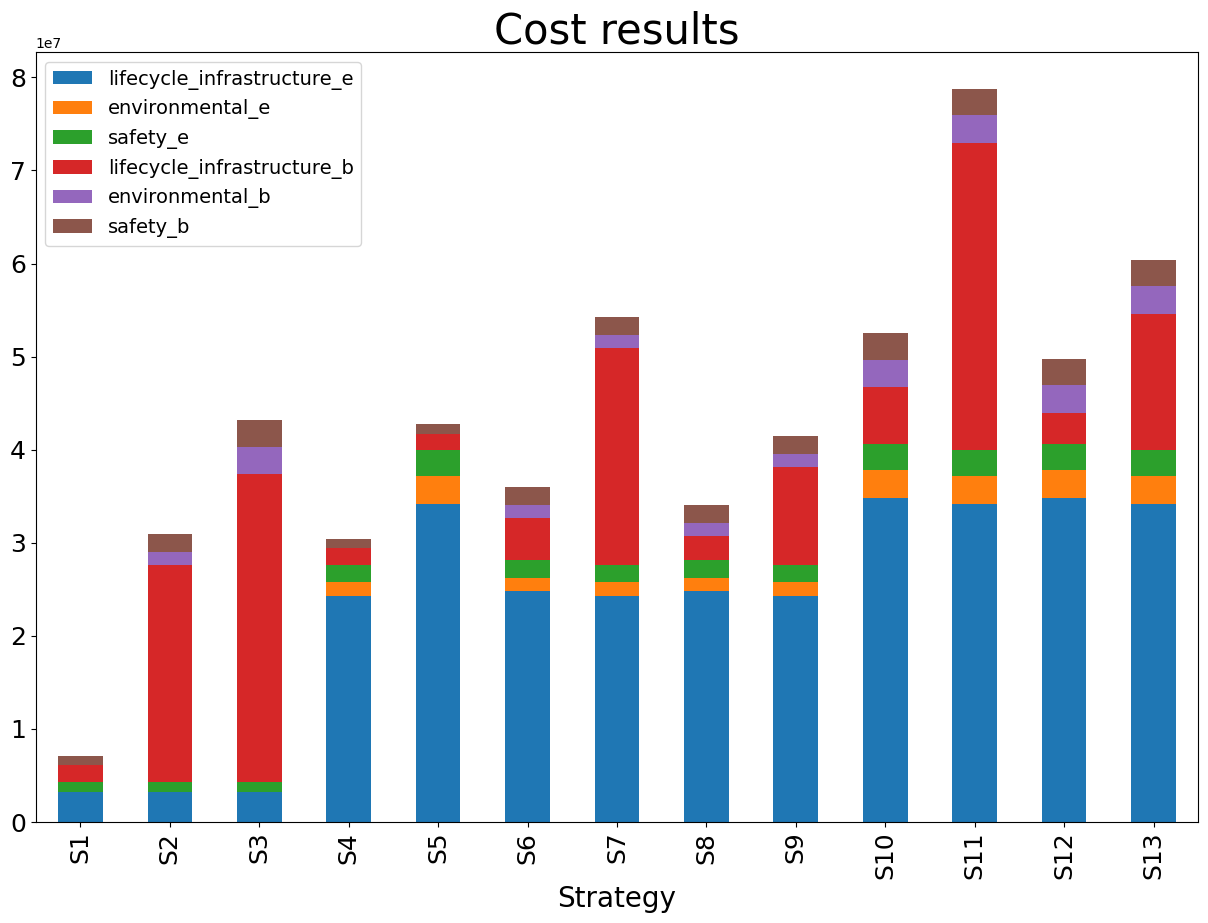

In [250]:
# plotting cost results
df_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost.png')

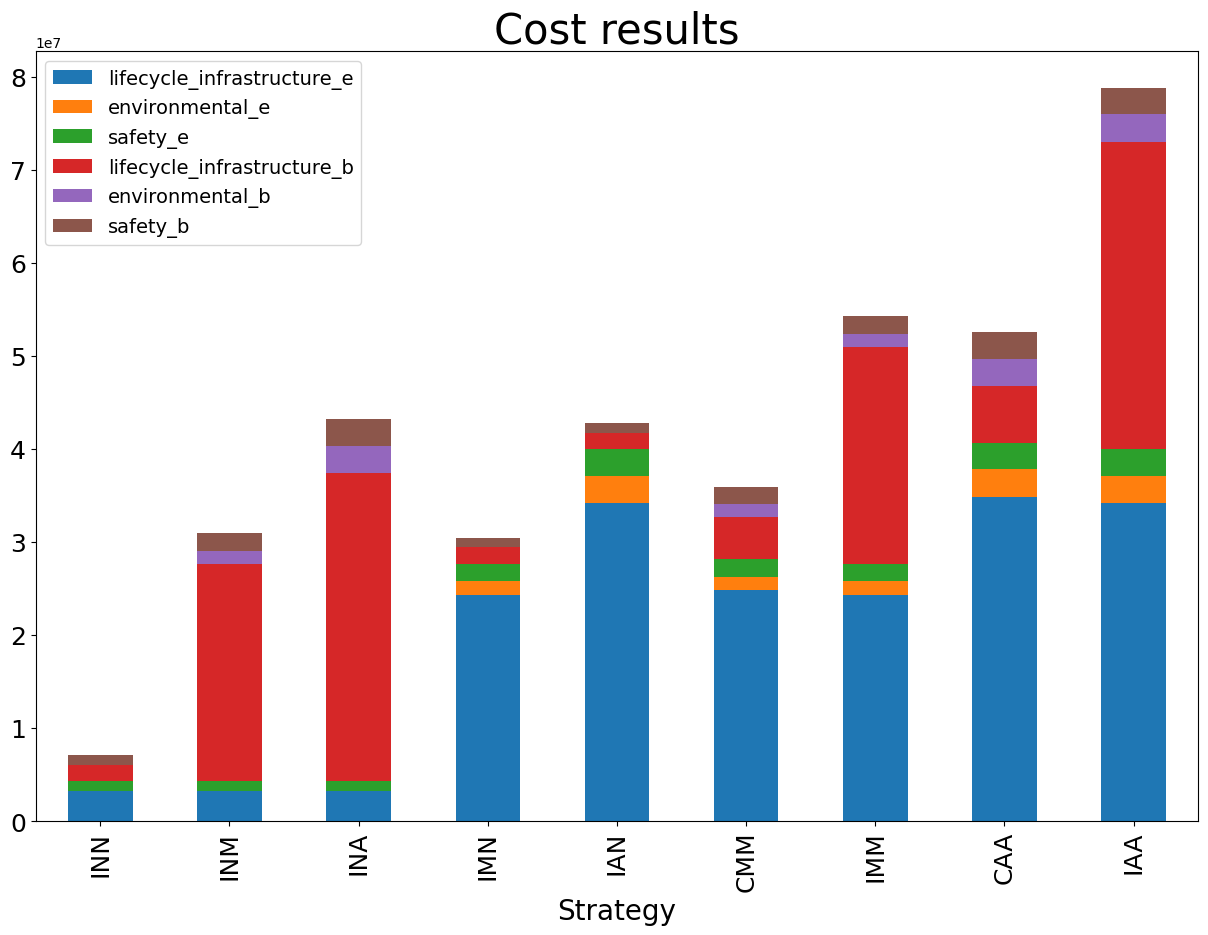

In [251]:
# Filter out the unwanted rows and rename the strategies according to the given mapping
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

rename_map = {
    'S1': 'INN',
    'S2': 'INM',
    'S3': 'INA',
    'S4': 'IMN',
    'S5': 'IAN',
    'S6': 'CMM',
    'S7': 'IMM',
    'S10': 'CAA',
    'S11': 'IAA'
}

df_cost_filtered =df_cost.drop(['S8', 'S9', 'S12', 'S13'])
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# plotting cost results
df_cost_filtered.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([0, 50000000])
plt.grid()
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle_infrastructure_e','environmental_e','safety_e','lifecycle_infrastructure_b', 'environmental_b','safety_b',], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-modified.png')

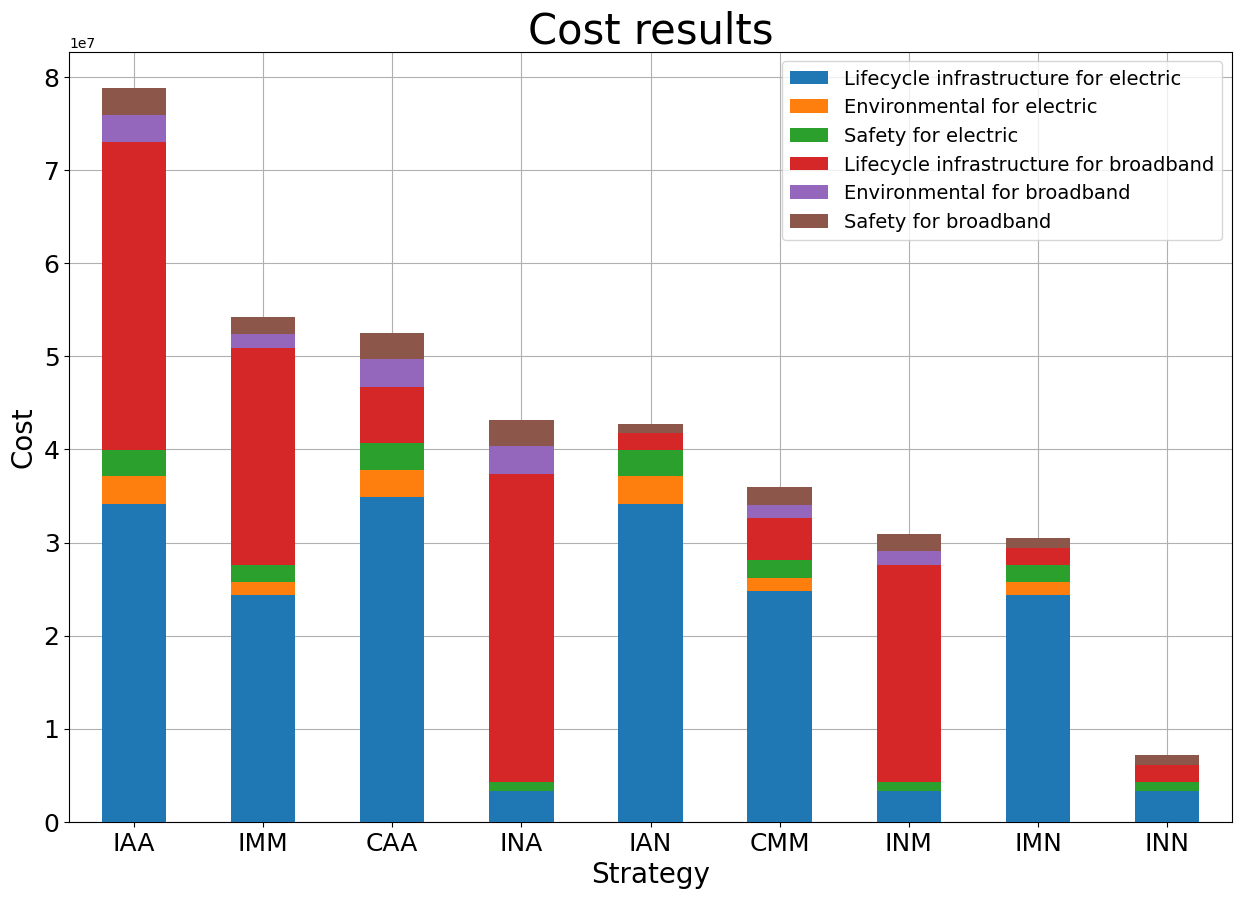

In [252]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_cost is already defined and loaded with data
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

rename_map = {
    'S1': 'INN',
    'S2': 'INM',
    'S3': 'INA',
    'S4': 'IMN',
    'S5': 'IAN',
    'S6': 'CMM',
    'S7': 'IMM',
    'S10': 'CAA',
    'S11': 'IAA'
}


# Filter and rename the strategies
df_cost_filtered = df_cost.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_cost_filtered = df_cost_filtered.rename(index=rename_map)

# Sort dataframe by the sum of the rows from highest to lowest
df_cost_sorted = df_cost_filtered.sum(axis=1).sort_values(ascending=False).index
df_cost_filtered = df_cost_filtered.loc[df_cost_sorted]

# Plotting cost results
ax = df_cost_filtered.plot.bar(stacked=True, figsize=(15, 10), zorder=3)  # Set zorder to 3
plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy', fontsize=20)
plt.ylabel('Cost', fontsize=20)
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)

plt.grid(zorder=0)  # Ensure grid is behind the bars

# Update the legend
legend_labels = {
    'lifecycle_infrastructure_el': 'Lifecycle infrastructure for electric',
    'environmental_restoration_el': 'Environmental for electric',
    'safety_el': 'Safety for electric',
    'lifecycle_infrastructure_br': 'Lifecycle infrastructure for broadband',
    'environmental_restoration_br': 'Environmental for broadband',
    'safety_br': 'Safety for broadband'
}
plt.legend([legend_labels.get(label, label) for label in df_cost_filtered.columns], fontsize=14)

plt.savefig(r'../../figures/npv-cost-modified.png')
plt.show()


In [253]:
df_cost
#df_cost_filtered

lifecycle_infrastructure_el  environmental_restoration_el  \
Strategy                                                              
S1                       3.262527e+06                         0.000   
S2                       3.262527e+06                         0.000   
S3                       3.262527e+06                         0.000   
S4                       2.433064e+07                   1422186.244   
S5                       3.416034e+07                   2968567.363   
S6                       2.481681e+07                   1422186.244   
S7                       2.433064e+07                   1422186.244   
S8                       2.481681e+07                   1422186.244   
S9                       2.433064e+07                   1422186.244   
S10                      3.485867e+07                   2968567.363   
S11                      3.416034e+07                   2968567.363   
S12                      3.485867e+07                   2968567.363   
S13                      3.416034e+07                   2968567.363   

            safety_el  lifecycle_infrastructure_br  \
Strategy                                             
S1        1048641.360                 1.766953e+06   
S2        1048641.360                 2.330422e+07   
S3        1048641.360                 3.304793e+07   
S4        1881130.310                 1.766953e+06   
S5        2822655.341                 1.766953e+06   
S6        1881130.310                 4.520485e+06   
S7        1881130.310                 2.330422e+07   
S8        1881130.310                 2.602966e+06   
S9        1881130.310                 1.052076e+07   
S10       2822655.341                 6.067214e+06   
S11       2822655.341                 3.304793e+07   
S12       2822655.341                 3.306052e+06   
S13       2822655.341                 1.464019e+07   

          environmental_restoration_br    safety_br  
Strategy                                             
S1                               0.000  1048641.360  
S2                         1422186.244  1881130.310  
S3                         2968567.363  2822655.341  
S4                               0.000  1048641.360  
S5                               0.000  1048641.360  
S6                         1422186.244  1881130.310  
S7                         1422186.244  1881130.310  
S8                         1422186.244  1881130.310  
S9                         1422186.244  1881130.310  
S10                        2968567.363  2822655.341  
S11                        2968567.363  2822655.341  
S12                        2968567.363  2822655.341  
S13                        2968567.363  2822655.341

In [254]:
with open(r'../../results/outcomes/Benefit/Analyze result/ npv_benefit.csv') as loss_benefit:
    df_loss_benefit=pd.read_csv(loss_benefit)
df_loss_benefit

Strategy  aesthetic_benefit_el  economic_losses_el  aesthetic_benefit_br  \
0       S1                0.0000         81686750.02                0.0000   
1       S2                0.0000         81686750.02           428482.4443   
2       S3                0.0000         81686750.02           766942.4460   
3       S4           428482.4443         63985800.66                0.0000   
4       S5           766942.4460         44369784.12                0.0000   
5       S6           428482.4443         63985800.66           428482.4443   
6      S10           766942.4460         44369784.12           766942.4460   

   economic_loss_br  
0       38995114.21  
1       30545144.76  
2       21180972.42  
3       38995114.21  
4       38995114.21  
5       30545144.76  
6       21180972.42

In [255]:
df_loss_benefit = df_loss_benefit.set_index('Strategy')

In [256]:
df_loss_benefit

aesthetic_benefit_el  economic_losses_el  aesthetic_benefit_br  \
Strategy                                                                   
S1                      0.0000         81686750.02                0.0000   
S2                      0.0000         81686750.02           428482.4443   
S3                      0.0000         81686750.02           766942.4460   
S4                 428482.4443         63985800.66                0.0000   
S5                 766942.4460         44369784.12                0.0000   
S6                 428482.4443         63985800.66           428482.4443   
S10                766942.4460         44369784.12           766942.4460   

          economic_loss_br  
Strategy                    
S1             38995114.21  
S2             30545144.76  
S3             21180972.42  
S4             38995114.21  
S5             38995114.21  
S6             30545144.76  
S10            21180972.42

In [257]:
df_loss=df_loss_benefit.drop(['aesthetic_benefit_el', 'aesthetic_benefit_br'], axis=1)

In [258]:
df_loss

economic_losses_el  economic_loss_br
Strategy                                      
S1               81686750.02       38995114.21
S2               81686750.02       30545144.76
S3               81686750.02       21180972.42
S4               63985800.66       38995114.21
S5               44369784.12       38995114.21
S6               63985800.66       30545144.76
S10              44369784.12       21180972.42

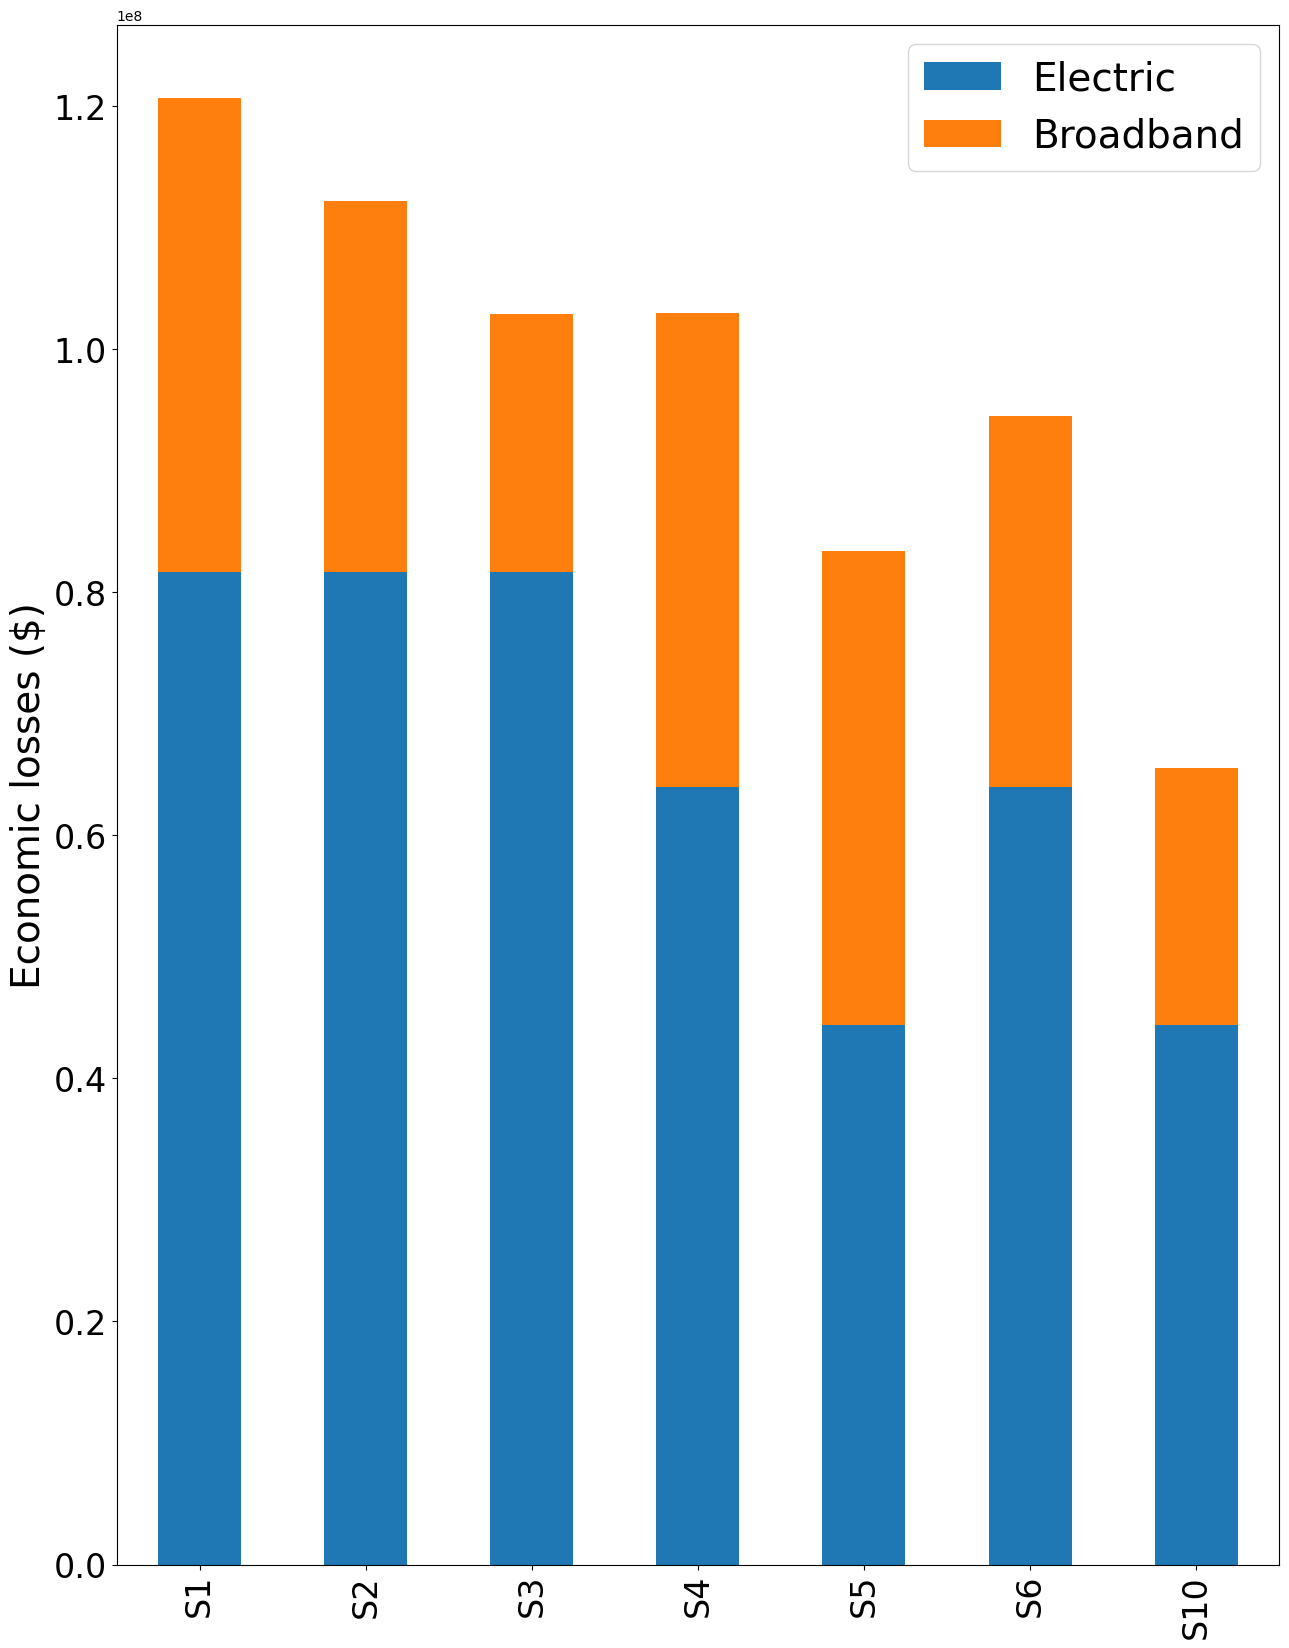

In [259]:
# plotting loss results
df_loss.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([400000000, 1300000000])
plt.grid()
#plt.title("loss results", fontsize=30)
plt.xlabel('',fontsize=28)
plt.ylabel('Economic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)

In [260]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_loss is already defined and loaded with data

# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

rename_map = {
    'S1': 'INN',
    'S2': 'INM',
    'S3': 'INA',
    'S4': 'IMN',
    'S5': 'IAN',
    'S6': 'CMM',
    'S7': 'IMM',
    'S10': 'CAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_loss_filtered = df_loss.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_loss_filtered = df_loss_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_loss_filtered.loc['IAA'] = df_loss_filtered.loc['CAA']
df_loss_filtered.loc['IMM'] = df_loss_filtered.loc['CMM']

# Calculate avoided economic losses based on 'INN' strategy
inn_el = df_loss_filtered.loc['INN', 'economic_losses_el']
inn_br = df_loss_filtered.loc['INN', 'economic_loss_br']

df_loss_filtered['avoided_economic_losses_el'] = inn_el-df_loss_filtered['economic_losses_el'] 
df_loss_filtered['avoided_economic_loss_br'] = inn_br - df_loss_filtered['economic_loss_br']

df_loss_filtered

economic_losses_el  economic_loss_br  avoided_economic_losses_el  \
Strategy                                                                     
INN              81686750.02       38995114.21                        0.00   
INM              81686750.02       30545144.76                        0.00   
INA              81686750.02       21180972.42                        0.00   
IMN              63985800.66       38995114.21                 17700949.36   
IAN              44369784.12       38995114.21                 37316965.90   
CMM              63985800.66       30545144.76                 17700949.36   
CAA              44369784.12       21180972.42                 37316965.90   
IAA              44369784.12       21180972.42                 37316965.90   
IMM              63985800.66       30545144.76                 17700949.36   

          avoided_economic_loss_br  
Strategy                            
INN                           0.00  
INM                     8449969.45  
INA                    17814141.79  
IMN                           0.00  
IAN                           0.00  
CMM                     8449969.45  
CAA                    17814141.79  
IAA                    17814141.79  
IMM                     8449969.45

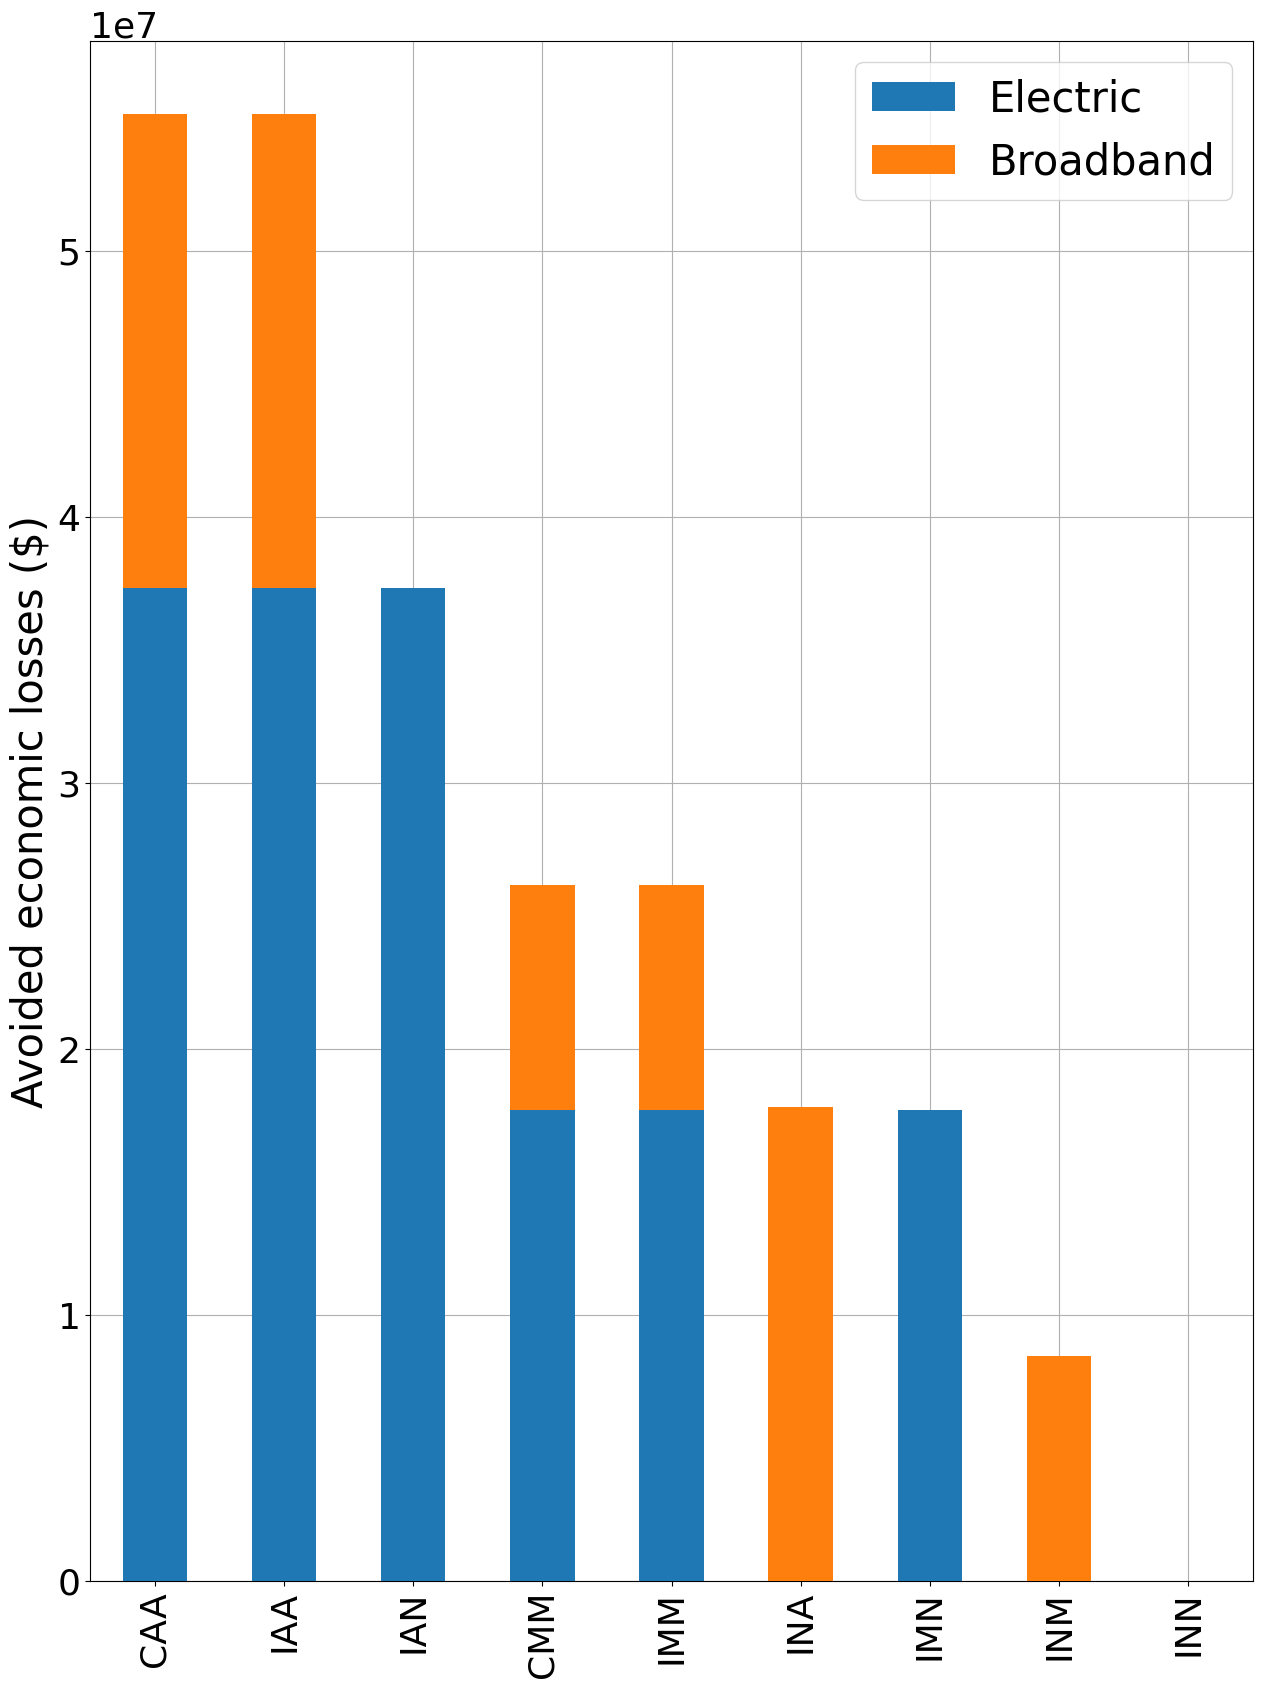

In [261]:
import matplotlib.pyplot as plt

# Plotting first loss results
fig1, ax1 = plt.subplots()
df_loss.plot.bar(stacked=True, ax=ax1)
fig1.set_size_inches(15, 20)
ax1.set_xlabel('', fontsize=28)
ax1.set_ylabel('Economic losses ($)', fontsize=28)
ax1.legend(['Electric', 'Broadband'], fontsize=28)
ax1.grid(True)
ax1.tick_params(axis='x', labelsize=24)
ax1.tick_params(axis='y', labelsize=24)
plt.savefig(r'../../figures/npv-loss-E-vs-B.png', dpi=300)
plt.close(fig1)  # Close the figure to free memory

# Preparing data for the second plot
df_loss_filtered = df_loss_filtered.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_loss_sorted = df_loss_filtered.sum(axis=1).sort_values(ascending=False).index
df_loss_filtered = df_loss_filtered.loc[df_loss_sorted]

# Plotting second loss results
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.bar(stacked=True, ax=ax2, zorder=3)
fig2.set_size_inches(15, 20)
ax2.set_xlabel('', fontsize=30)
ax2.set_ylabel('Avoided economic losses ($)', fontsize=30)
ax2.tick_params(axis='x', labelsize=26)
ax2.tick_params(axis='y', labelsize=26)
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300)
plt.show()


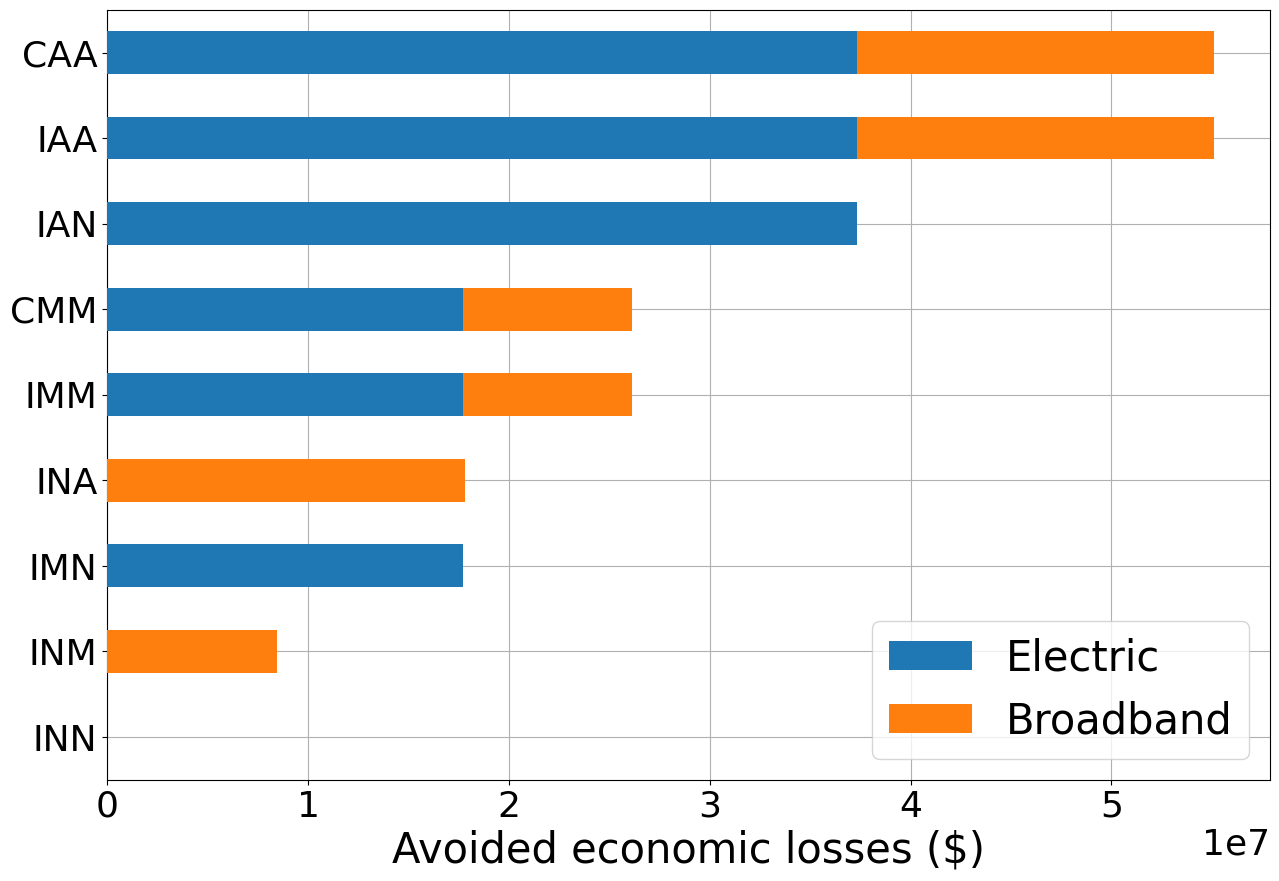

In [262]:
# Reverse the order of the DataFrame after sorting and before plotting
df_loss_filtered = df_loss_filtered.iloc[::-1]

# Plotting second loss results with horizontal bars and reversed order
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.barh(stacked=True, ax=ax2, zorder=3)  # Use barh for horizontal bars
fig2.set_size_inches(15, 10)  # Adjust dimensions for horizontal layout
ax2.set_ylabel('', fontsize=30)  # Y-axis now has categories, no label needed
ax2.set_xlabel('Avoided economic losses ($)', fontsize=30)  # X-axis for values
ax2.tick_params(axis='y', labelsize=26)  # Adjust y-tick labels for categories
ax2.tick_params(axis='x', labelsize=26)  # Adjust x-tick labels for values
ax2.grid(True, zorder=0)

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.xaxis.offsetText.set_fontsize(26)  # Adjust font size for x-axis offset text

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300, bbox_inches='tight')
plt.show()


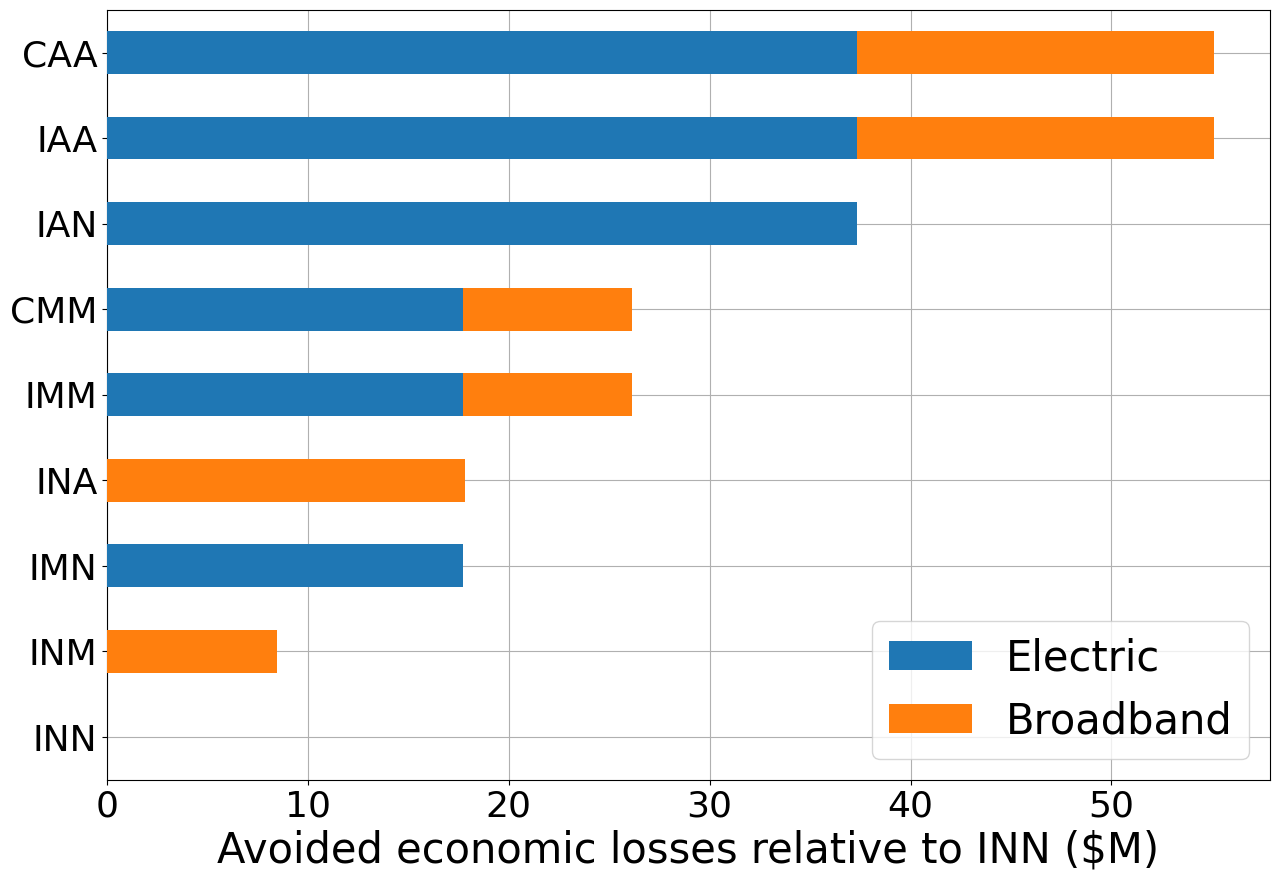

In [263]:
# Plotting second loss results with horizontal bars and reversed order
fig2, ax2 = plt.subplots()
df_loss_filtered.plot.barh(stacked=True, ax=ax2, zorder=3)  # Use barh for horizontal bars
fig2.set_size_inches(15, 10)  # Adjust dimensions for horizontal layout
ax2.set_ylabel('', fontsize=30)  # Y-axis now has categories, no label needed
ax2.set_xlabel('Avoided economic losses relative to INN ($M)', fontsize=30)  # X-axis for values
ax2.tick_params(axis='y', labelsize=26)  # Adjust y-tick labels for categories
ax2.tick_params(axis='x', labelsize=26)  # Adjust x-tick labels for values
ax2.grid(True, zorder=0)

# Customizing the x-axis labels to be in millions (0, 10, 20, ..., 50)
ax2.set_xticks([i * 1e7 for i in range(6)])
ax2.set_xticklabels([str(i * 10) for i in range(6)])

legend_labels = {
    'avoided_economic_losses_el': 'Electric',
    'avoided_economic_loss_br': 'Broadband'
}
ax2.legend([legend_labels.get(label, label) for label in df_loss_filtered.columns], fontsize=30)
ax2.xaxis.offsetText.set_fontsize(26)  # Adjust font size for x-axis offset text

plt.savefig(r'../../figures/npv-loss-E-vs-B-modified.png', dpi=300, bbox_inches='tight')
plt.show()


In [264]:
df_benefit=df_loss_benefit.drop(['economic_losses_el', 'economic_loss_br'], axis=1)
df_benefit

aesthetic_benefit_el  aesthetic_benefit_br
Strategy                                            
S1                      0.0000                0.0000
S2                      0.0000           428482.4443
S3                      0.0000           766942.4460
S4                 428482.4443                0.0000
S5                 766942.4460                0.0000
S6                 428482.4443           428482.4443
S10                766942.4460           766942.4460

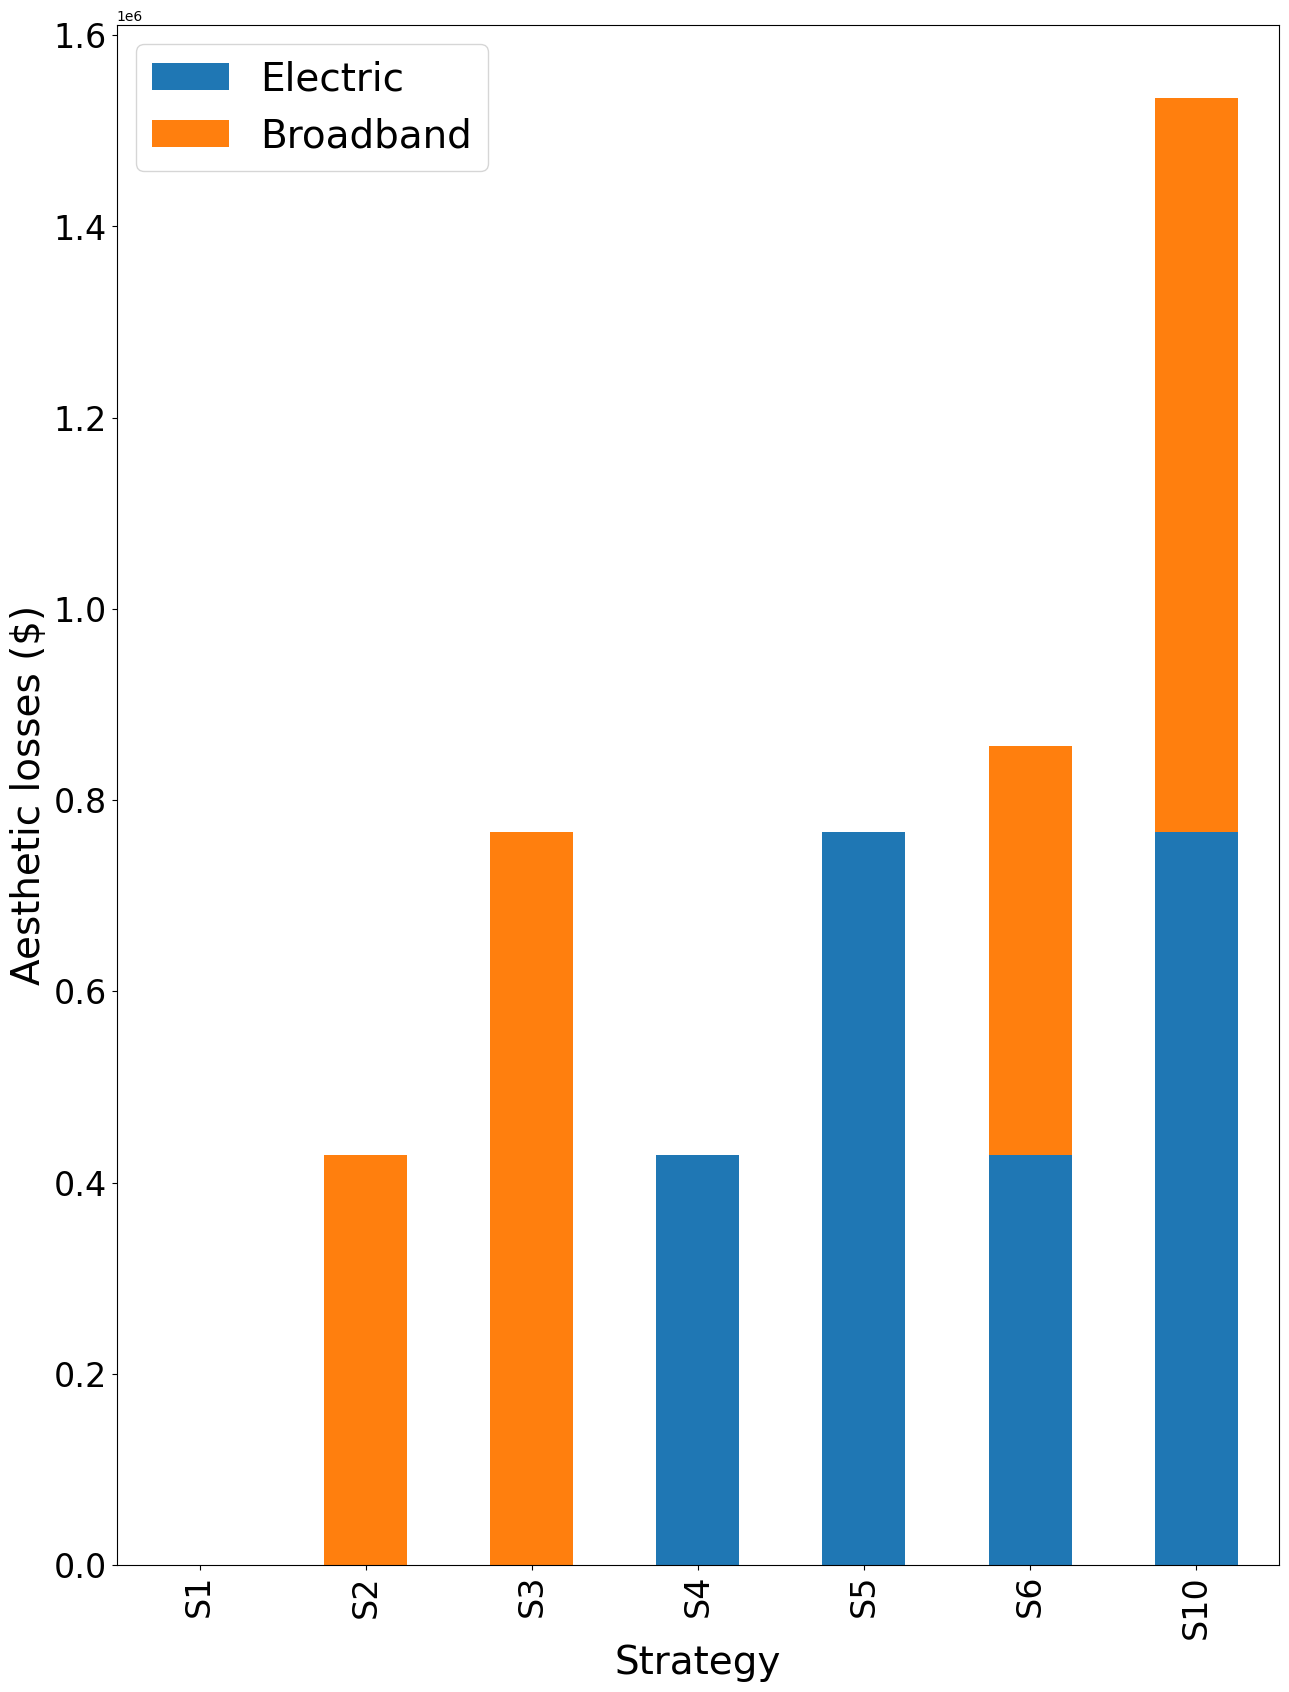

In [265]:
# plotting benefit results
#color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
df_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 20)
#plt.ylim([0, 50000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=28)
plt.ylabel('Aesthetic losses ($)',fontsize=28)
plt.legend(['Electric','Broadband'], fontsize=28)
plt.grid()
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)
color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']


In [266]:
# Rename the strategies
rename_map = {
    'S1': 'INN',
    'S2': 'INC',
    'S3': 'INA',
    'S4': 'ICN',
    'S5': 'IAN',
    'S6': 'JCC',
    'S7': 'ICC',
    'S10': 'JAA',
    'S11': 'IAA'
}

rename_map = {
    'S1': 'INN',
    'S2': 'INM',
    'S3': 'INA',
    'S4': 'IMN',
    'S5': 'IAN',
    'S6': 'CMM',
    'S7': 'IMM',
    'S10': 'CAA',
    'S11': 'IAA'
}

# Filter and rename the strategies
df_benefit_filtered = df_benefit.drop(['S8', 'S9', 'S12', 'S13'], errors='ignore')
df_benefit_filtered = df_benefit_filtered.rename(index=rename_map)

# Add a new row 'IAA' with the same data as 'JAA'
df_benefit_filtered.loc['IAA'] = df_benefit_filtered.loc['CAA']
df_benefit_filtered.loc['IMM'] = df_benefit_filtered.loc['CMM']

# Calculate avoided benefits based on 'INN' strategy
inn_el = df_benefit_filtered.loc['INN', 'aesthetic_benefit_el']
inn_br = df_benefit_filtered.loc['INN', 'aesthetic_benefit_br']

df_benefit_filtered

aesthetic_benefit_el  aesthetic_benefit_br
Strategy                                            
INN                     0.0000                0.0000
INM                     0.0000           428482.4443
INA                     0.0000           766942.4460
IMN                428482.4443                0.0000
IAN                766942.4460                0.0000
CMM                428482.4443           428482.4443
CAA                766942.4460           766942.4460
IAA                766942.4460           766942.4460
IMM                428482.4443           428482.4443

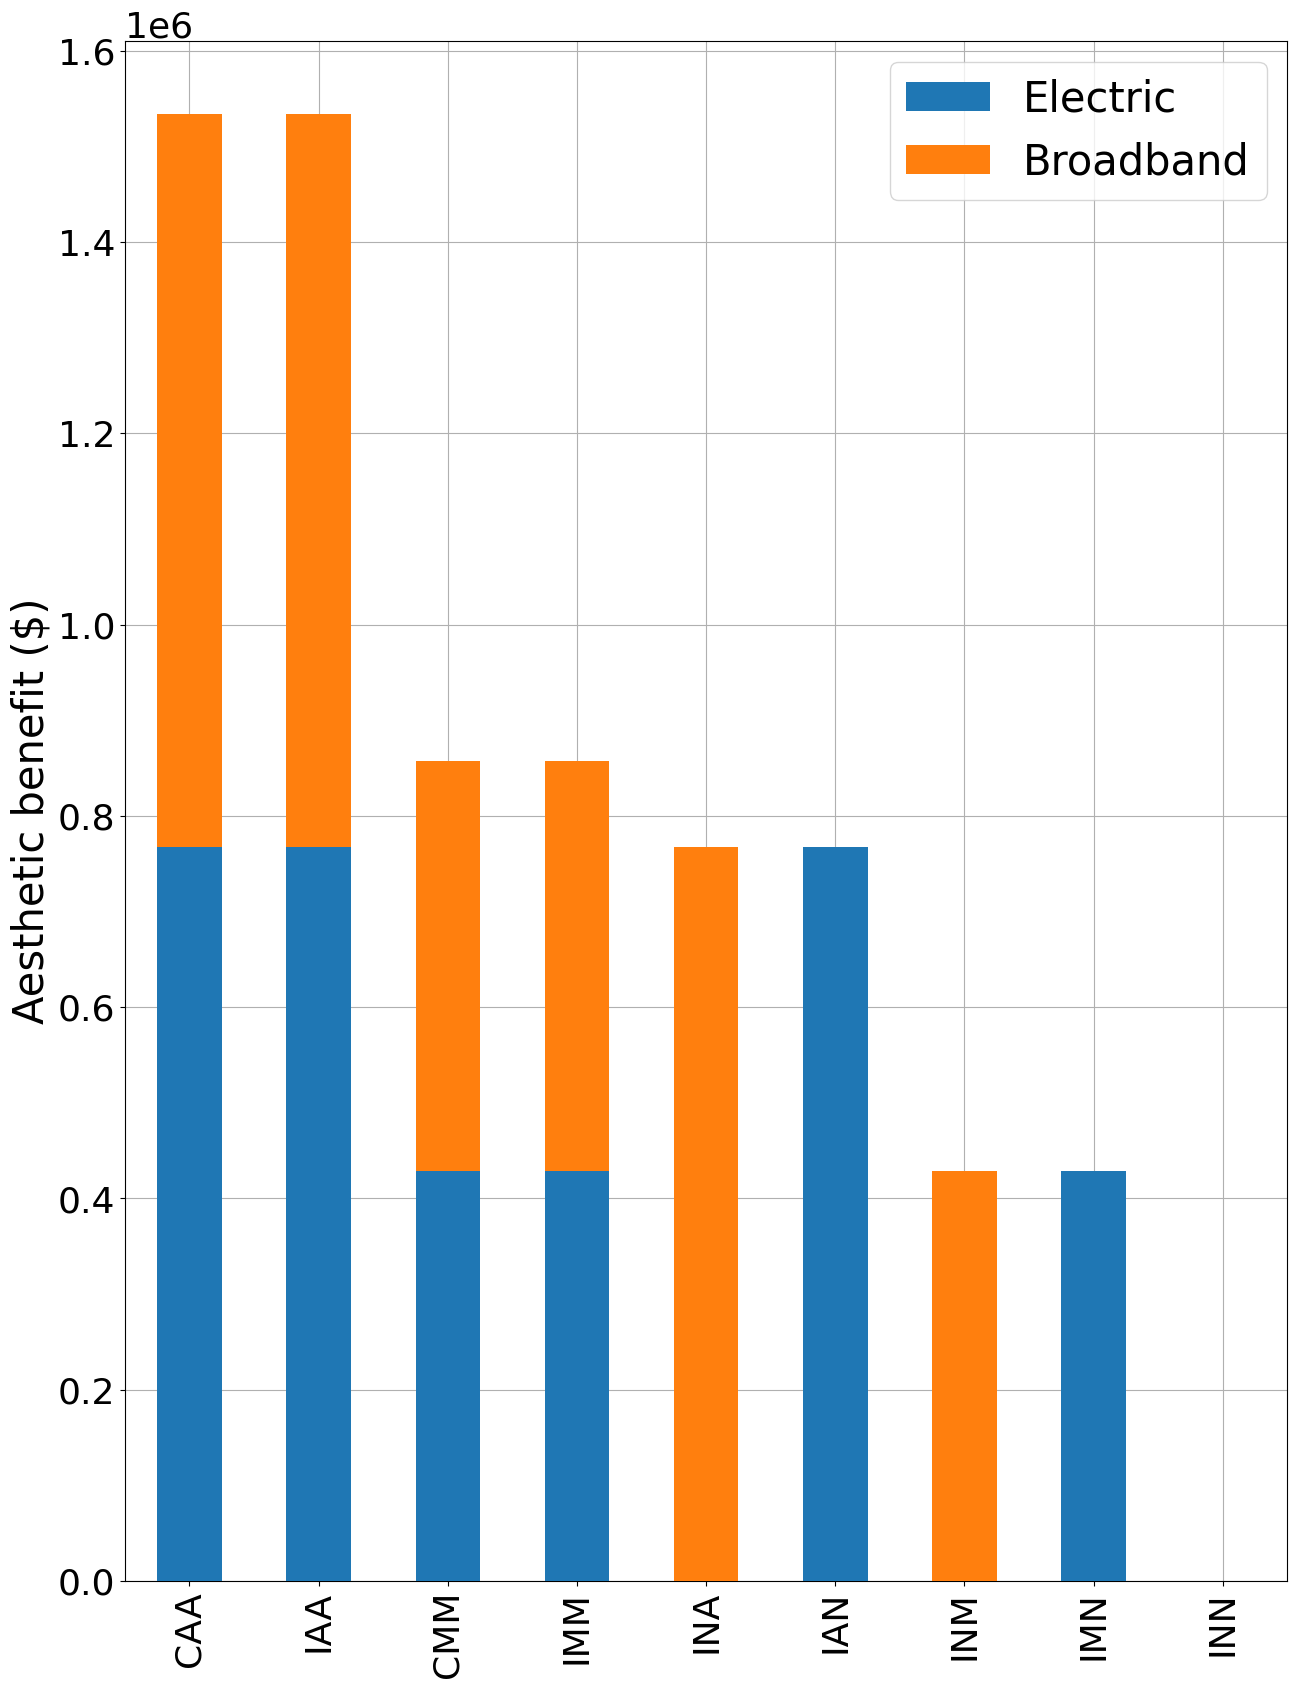

In [267]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in descending order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=False)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data
ax = df_benefit_sorted.plot.bar(stacked=True, zorder=3)
fig = plt.gcf()
fig.set_size_inches(15, 20)

plt.grid()
plt.xlabel('', fontsize=30)
plt.ylabel('Aesthetic benefit ($)', fontsize=30)
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='upper right')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
ax.yaxis.offsetText.set_fontsize(26)

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300)

plt.show()


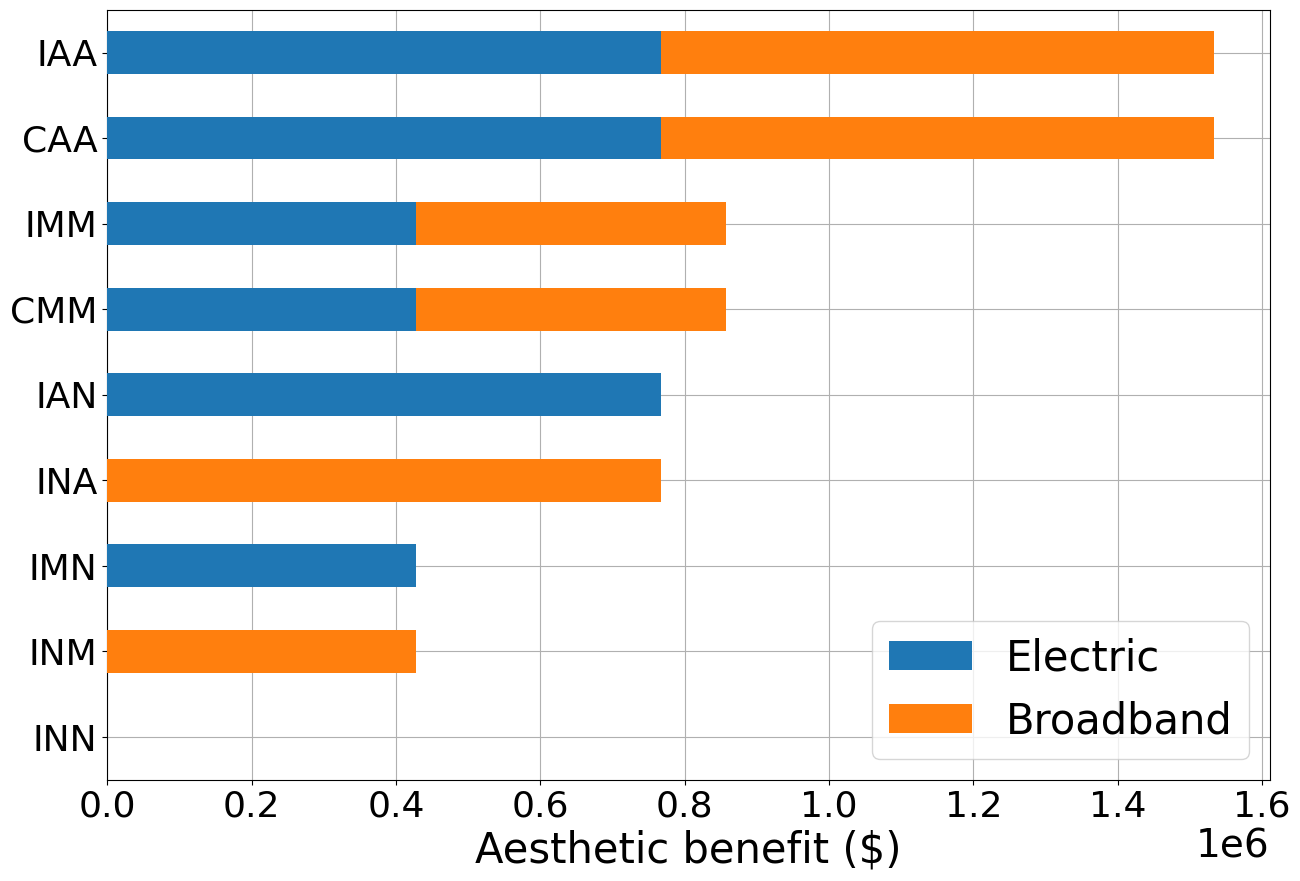

In [268]:
import matplotlib.pyplot as plt

# Sum columns to get the total benefits and add as a new column 'Total'
df_benefit_filtered['Total'] = df_benefit_filtered.sum(axis=1)

# Sort DataFrame by 'Total' in ascending order to reverse the bar order
df_benefit_sorted = df_benefit_filtered.sort_values(by='Total', ascending=True)

# Drop the 'Total' column after sorting, if it's not needed for plotting
df_benefit_sorted.drop('Total', axis=1, inplace=True)

# Plotting the sorted data with horizontal bars
ax = df_benefit_sorted.plot.barh(stacked=True, zorder=3)  # Use barh here for horizontal bars
fig = plt.gcf()
fig.set_size_inches(15, 10)  # You might want to adjust this size if the layout looks cramped

plt.grid()
plt.ylabel('', fontsize=30)  # This is now the y-axis label
plt.xlabel('Aesthetic benefit ($)', fontsize=30)  # This is now the x-axis label
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='lower right')
plt.yticks(fontsize=26)  # This now controls the category labels
plt.xticks(fontsize=26)  # This now controls the value labels
ax.xaxis.offsetText.set_fontsize(28)  # Adjust the fontsize of the offset text on the x-axis

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300, bbox_inches='tight')

plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\1134180671.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])


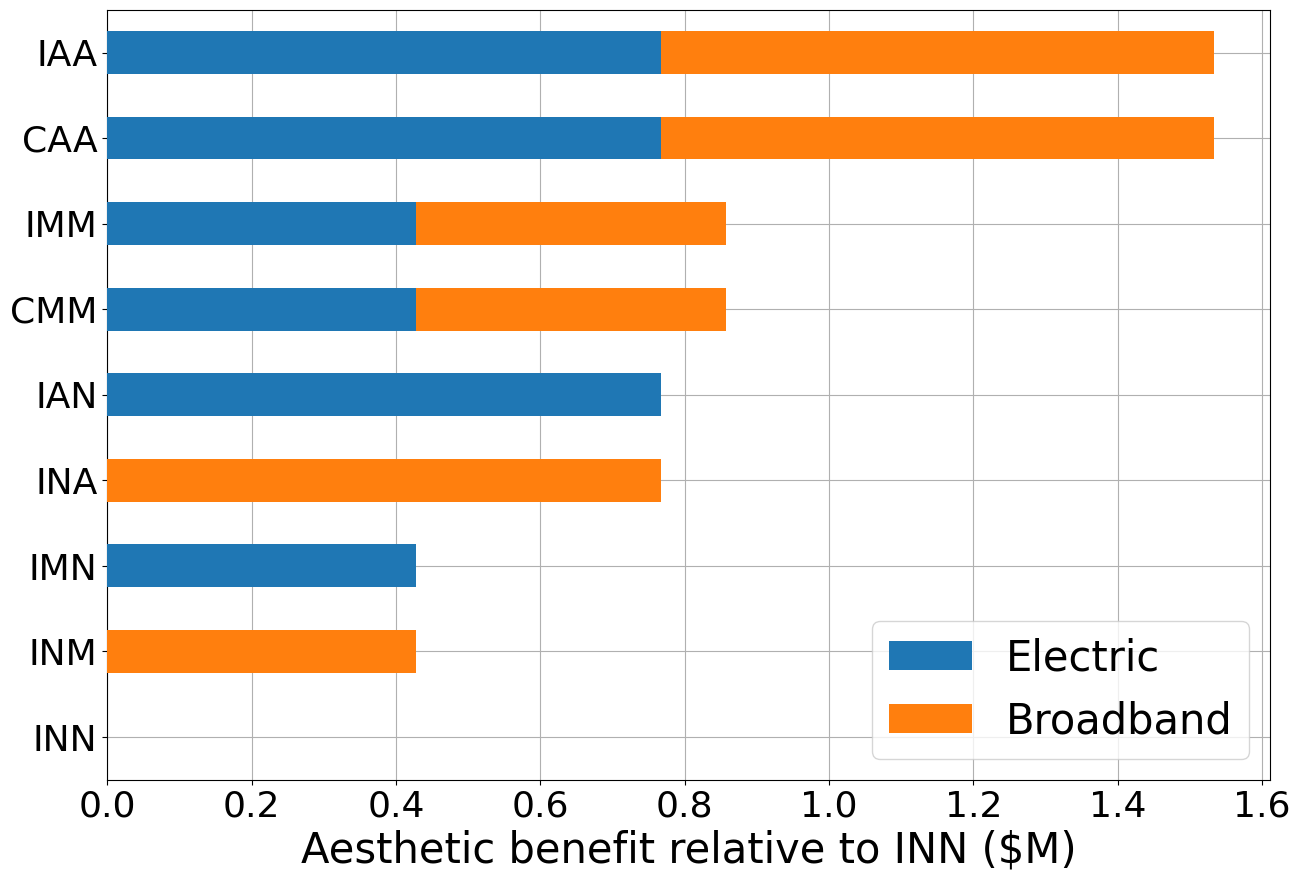

In [269]:
# Plotting the sorted data with horizontal bars
ax = df_benefit_sorted.plot.barh(stacked=True, zorder=3)  # Use barh here for horizontal bars
fig = plt.gcf()
fig.set_size_inches(15, 10)  # You might want to adjust this size if the layout looks cramped

plt.grid()
plt.ylabel('', fontsize=30)  # This is now the y-axis label
plt.xlabel('Aesthetic benefit relative to INN ($M)', fontsize=30)  # This is now the x-axis label
plt.legend(['Electric', 'Broadband'], fontsize=30, loc='lower right')
plt.yticks(fontsize=26)  # This now controls the category labels
plt.xticks(fontsize=26)  # This now controls the value labels

# Disable the offset text
ax.get_xaxis().get_major_formatter().set_useOffset(False)

# Convert x-axis labels to millions and format them correctly
ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])

plt.savefig(r'../../figures/npv-benefit-E-vs-B.png', dpi=300, bbox_inches='tight')

plt.show()


In [270]:
#df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [271]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_new.csv') as npv_cost_loss_benefit:
    df_npv_cost_loss_benefit=pd.read_csv(npv_cost_loss_benefit)
df_npv_cost_loss_benefit

Strategy  lifecycle_infrastructure  environmental_restoration       safety  \
0      INN                5029480.00                      0.000  2097282.720   
1      INC               26566747.32                1422186.244  2929771.670   
2      INA               36310457.11                2968567.363  3871296.702   
3      ICN               26097596.80                1422186.244  2929771.670   
4      IAN               35927293.91                2968567.363  3871296.702   
5      JCC               29337295.98                2844372.488  3762260.620   
6      ICC               47634864.12                2844372.488  3762260.620   
7      JAA               40925879.02                5937134.726  5645310.683   
8      IAA               67208271.02                5937134.726  5645310.683   

    total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0   7126762.72       0.000000e+00             0.000000e+00 -7.126763e+06  
1  30918705.24       4.284824e+05             8.449969e+06 -2.204025e+07  
2  43150321.18       7.669424e+05             1.781414e+07 -2.456924e+07  
3  30449554.71       4.284824e+05             1.770095e+07 -1.232012e+07  
4  42767157.97       7.669424e+05             3.731697e+07 -4.683250e+06  
5  35943929.09       8.569649e+05             2.615092e+07 -8.936045e+06  
6  54241497.23       8.569649e+05             2.615092e+07 -2.723361e+07  
7  52508324.43       1.533885e+06             5.513111e+07  4.156668e+06  
8  78790716.43       1.533885e+06             5.513111e+07 -2.212572e+07

In [272]:
# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

df_npv_cost_loss_benefit['Strategy'] = df_npv_cost_loss_benefit['Strategy'].replace(rename_map)

In [273]:
df_npv_cost_loss_benefit

Strategy  lifecycle_infrastructure  environmental_restoration       safety  \
0      INN                5029480.00                      0.000  2097282.720   
1      INM               26566747.32                1422186.244  2929771.670   
2      INA               36310457.11                2968567.363  3871296.702   
3      IMN               26097596.80                1422186.244  2929771.670   
4      IAN               35927293.91                2968567.363  3871296.702   
5      CMM               29337295.98                2844372.488  3762260.620   
6      IMM               47634864.12                2844372.488  3762260.620   
7      CAA               40925879.02                5937134.726  5645310.683   
8      IAA               67208271.02                5937134.726  5645310.683   

    total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0   7126762.72       0.000000e+00             0.000000e+00 -7.126763e+06  
1  30918705.24       4.284824e+05             8.449969e+06 -2.204025e+07  
2  43150321.18       7.669424e+05             1.781414e+07 -2.456924e+07  
3  30449554.71       4.284824e+05             1.770095e+07 -1.232012e+07  
4  42767157.97       7.669424e+05             3.731697e+07 -4.683250e+06  
5  35943929.09       8.569649e+05             2.615092e+07 -8.936045e+06  
6  54241497.23       8.569649e+05             2.615092e+07 -2.723361e+07  
7  52508324.43       1.533885e+06             5.513111e+07  4.156668e+06  
8  78790716.43       1.533885e+06             5.513111e+07 -2.212572e+07

In [274]:
df_npv_cost_loss_benefit = df_npv_cost_loss_benefit.set_index('Strategy')

In [275]:
df_npv_net_benefit=df_npv_cost_loss_benefit.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [276]:
df_npv_net_benefit_new=df_npv_net_benefit.transpose()

In [277]:
df_npv_net_benefit_new

Strategy            INN          INM          INA         IMN          IAN  \
net_benefit -7126762.72 -22040253.35 -24569236.94 -12320122.9 -4683249.625   

Strategy             CMM          IMM         CAA          IAA  
net_benefit -8936045.391 -27233613.53  4156668.15 -22125723.85

In [278]:
#ax = df.plot.bar(rot=0, color={'INN': '#FB9A99', 'INC': '#FDBF6F', 'INA': '#FF7F00', 'ICN': '#CAB2D6', 'IAN': '#6A3D9A', 'ICC': '#A6CEE3', 'IAA': '#1F78B4', 'JCC': '#B2DF8A', 'JAA': '#33A02C'})

In [279]:
df_npv_net_benefit_new

Strategy            INN          INM          INA         IMN          IAN  \
net_benefit -7126762.72 -22040253.35 -24569236.94 -12320122.9 -4683249.625   

Strategy             CMM          IMM         CAA          IAA  
net_benefit -8936045.391 -27233613.53  4156668.15 -22125723.85

In [280]:
df_npv_net_benefit=df_npv_net_benefit.reset_index()

In [281]:
df_npv_net_benefit

Strategy   net_benefit
0      INN -7.126763e+06
1      INM -2.204025e+07
2      INA -2.456924e+07
3      IMN -1.232012e+07
4      IAN -4.683250e+06
5      CMM -8.936045e+06
6      IMM -2.723361e+07
7      CAA  4.156668e+06
8      IAA -2.212572e+07

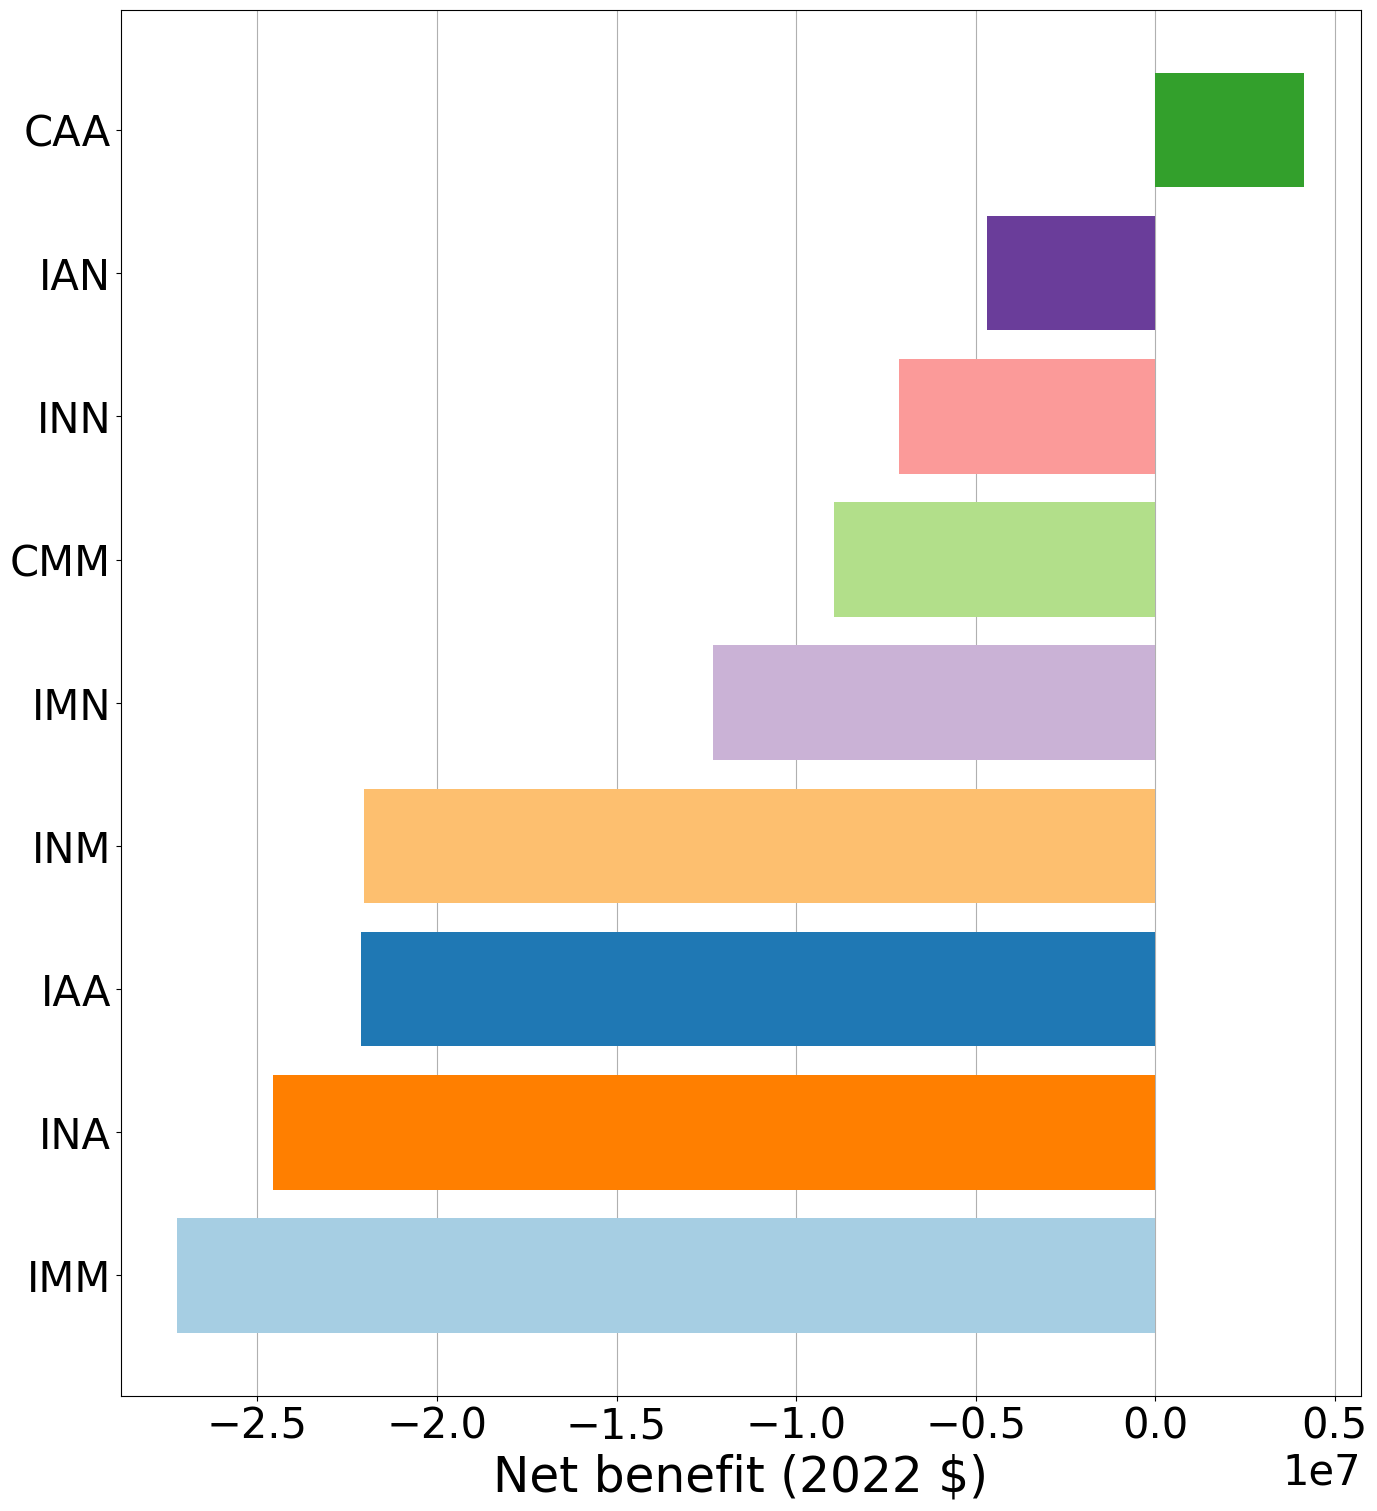

In [282]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit['Strategy'] = ['INN', 'INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']
df_npv_net_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_sorted = df_npv_net_benefit.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_sorted)), labels=df_npv_net_benefit_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

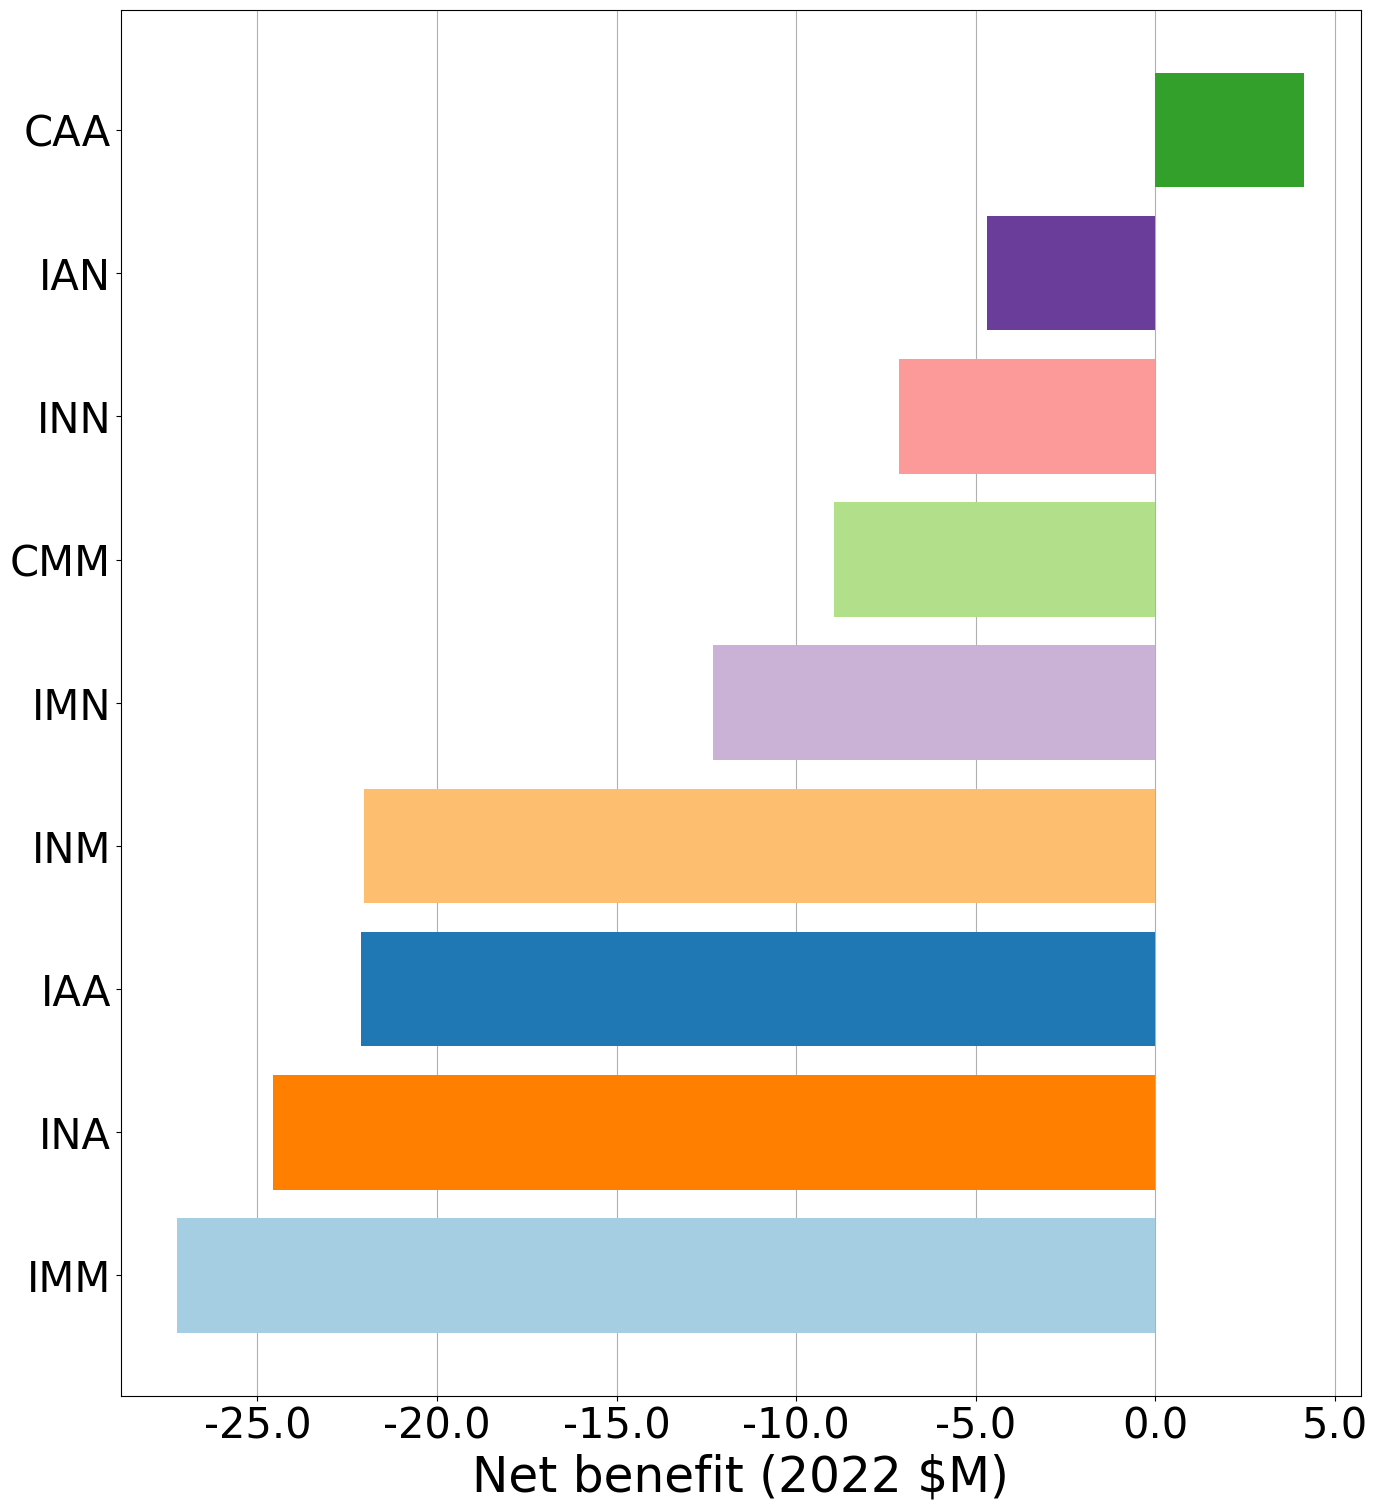

In [283]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_npv_net_benefit is already defined and contains the necessary data
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}


# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit['Strategy'] = ['INN', 'INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']
df_npv_net_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_sorted = df_npv_net_benefit.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Net benefit (2022 $M)', fontsize=35)
plt.yticks(range(len(df_npv_net_benefit_sorted)), labels=df_npv_net_benefit_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=400, bbox_inches='tight')
plt.show()


In [284]:
df_npv_net_benefit

net_benefit
Strategy              
INN      -7.126763e+06
INM      -2.204025e+07
INA      -2.456924e+07
IMN      -1.232012e+07
IAN      -4.683250e+06
CMM      -8.936045e+06
IMM      -2.723361e+07
CAA       4.156668e+06
IAA      -2.212572e+07

In [285]:
# plotting graph (new version)
#ax = df_npv_net_benefit.T.plot(ylabel='Net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit.png', dpi=300)
#plt.show()

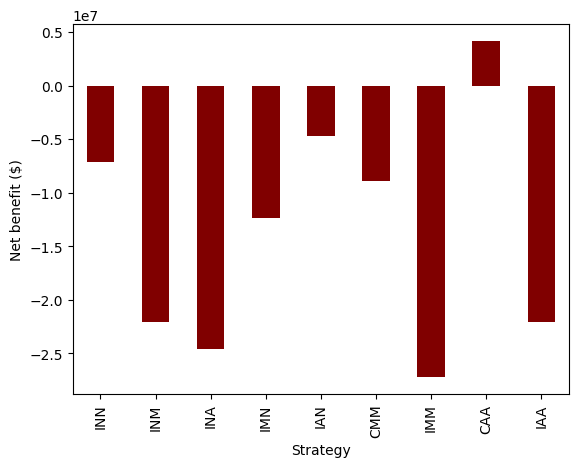

In [286]:
# plotting graph
df_npv_net_benefit.plot(ylabel='Net benefit ($)', kind="bar", color='maroon', legend=False)
plt.savefig(r'../../figures/npv.png', dpi=300, bbox_inches='tight')

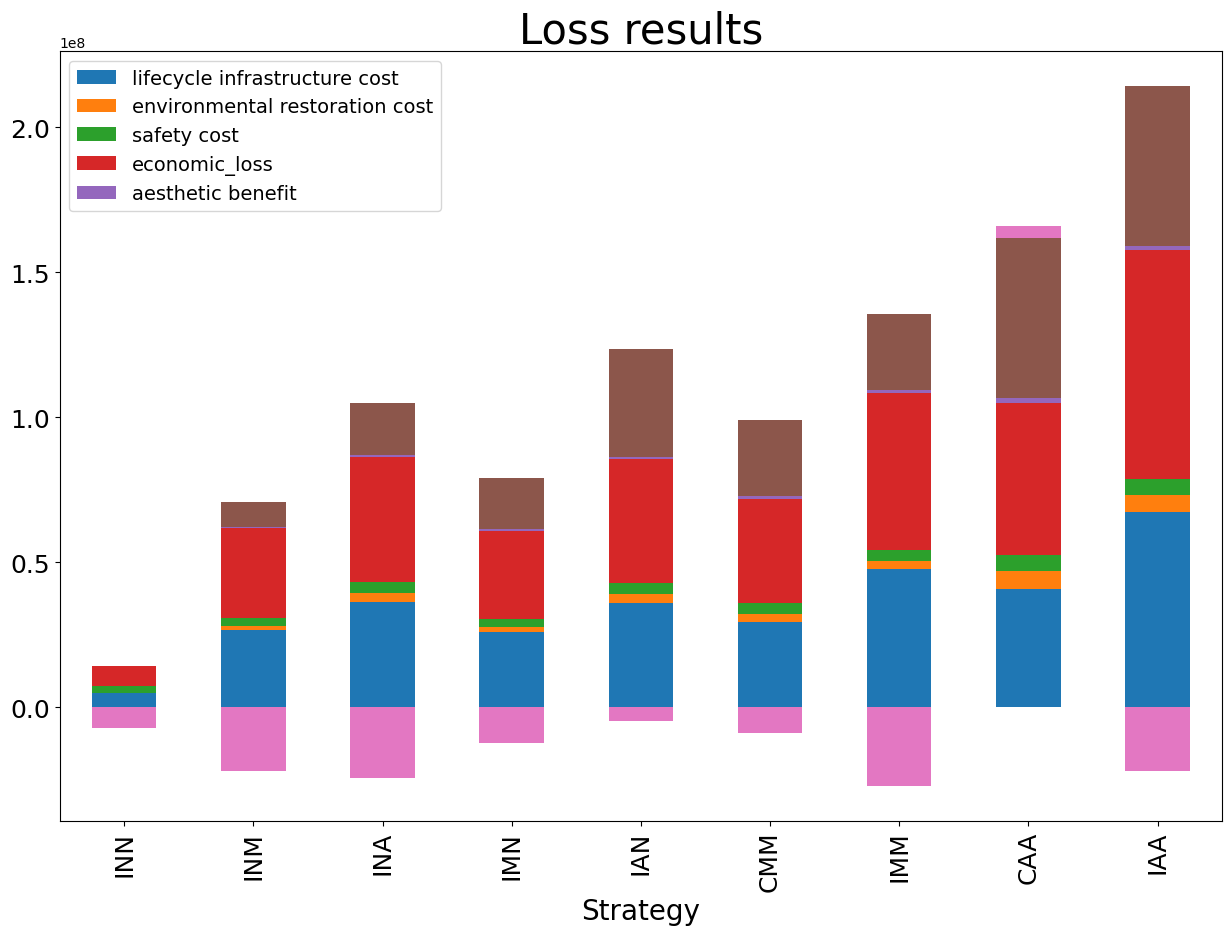

In [287]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated.png', dpi=300)

In [288]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                     5029480.00                      0.000  2097282.720   
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
CMM                    29337295.98                2844372.488  3762260.620   
IMM                    47634864.12                2844372.488  3762260.620   
CAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INN        7126762.72       0.000000e+00             0.000000e+00   
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   

           net_benefit  
Strategy                
INN      -7.126763e+06  
INM      -2.204025e+07  
INA      -2.456924e+07  
IMN      -1.232012e+07  
IAN      -4.683250e+06  
CMM      -8.936045e+06  
IMM      -2.723361e+07  
CAA       4.156668e+06  
IAA      -2.212572e+07

In [289]:
df_npv_cost=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [290]:
df_npv_cost

lifecycle_infrastructure  environmental_restoration       safety
Strategy                                                                  
INN                     5029480.00                      0.000  2097282.720
INM                    26566747.32                1422186.244  2929771.670
INA                    36310457.11                2968567.363  3871296.702
IMN                    26097596.80                1422186.244  2929771.670
IAN                    35927293.91                2968567.363  3871296.702
CMM                    29337295.98                2844372.488  3762260.620
IMM                    47634864.12                2844372.488  3762260.620
CAA                    40925879.02                5937134.726  5645310.683
IAA                    67208271.02                5937134.726  5645310.683

In [291]:
df_npv_cost=df_npv_cost.reset_index()

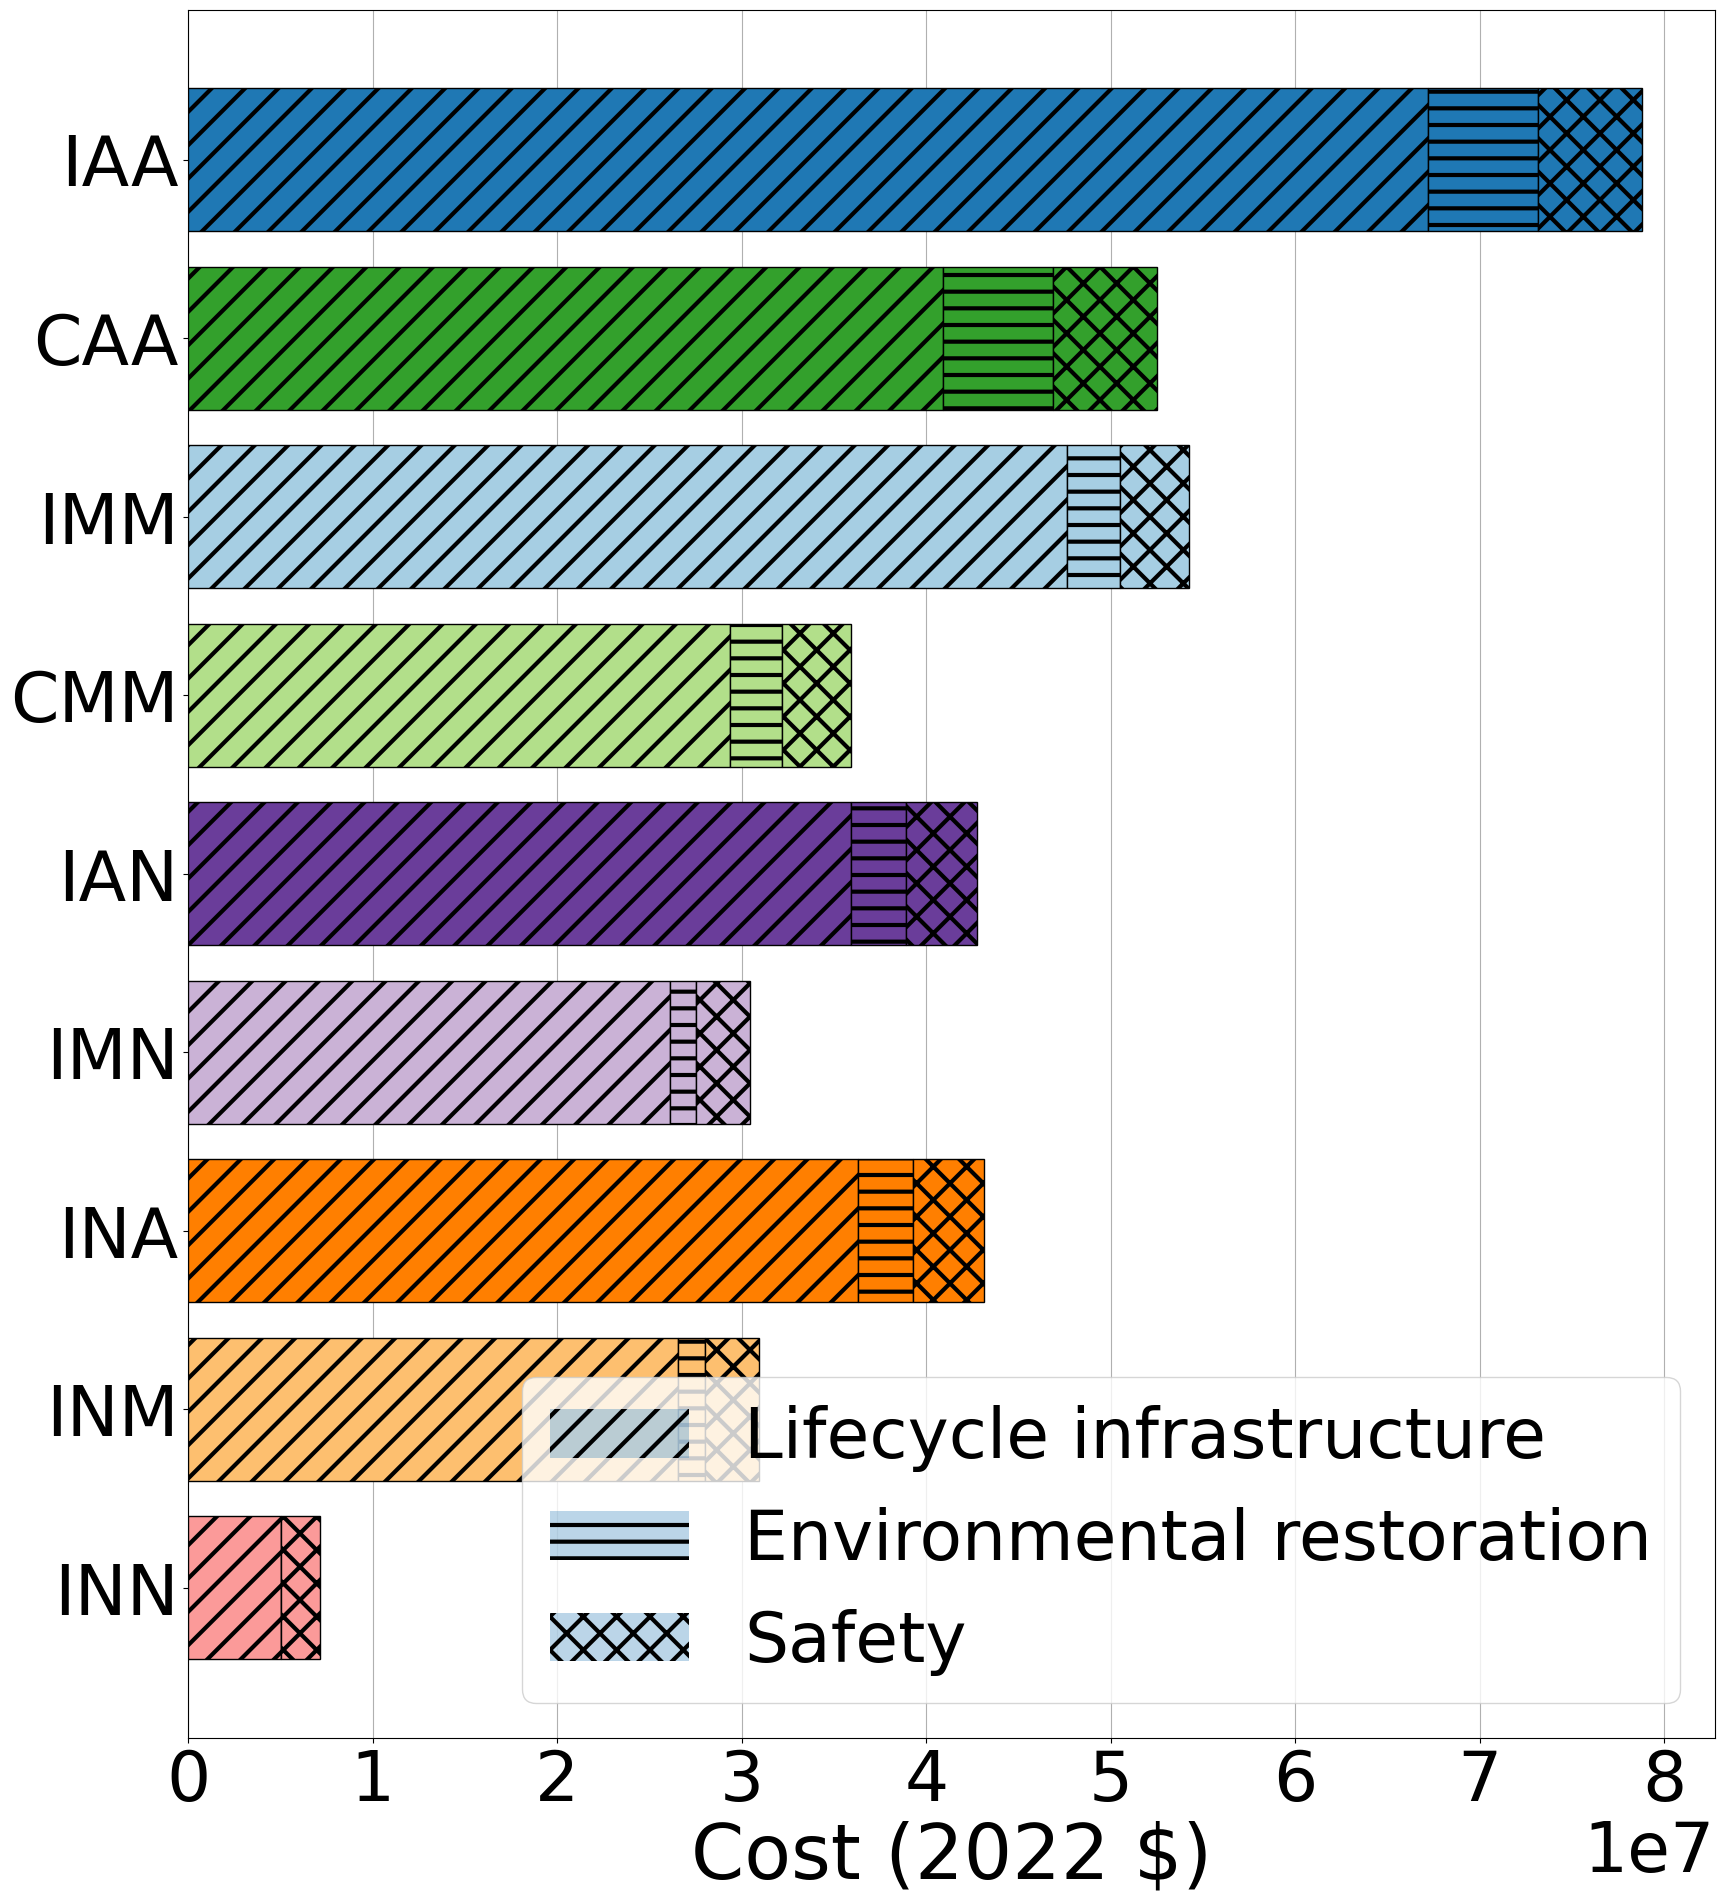

In [292]:
fig,(ax) = plt.subplots()
fig.set_size_inches(16, 18)
x= df_npv_cost.index
issues_addressed = [10, 14, 0, 10, 15, 15]
issues_pending = [5, 10, 50, 2, 0, 10]
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']

#mpl.rc('hatch', color='k', linewidth=1.5)
mpl.rcParams['hatch.linewidth'] = 3.0 

b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='/', zorder=3)

b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

plt.yticks(df_npv_cost.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])

a_val = 0.3



circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
plt.tight_layout()

plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.xlabel("Cost (2022 $)", fontsize=55)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

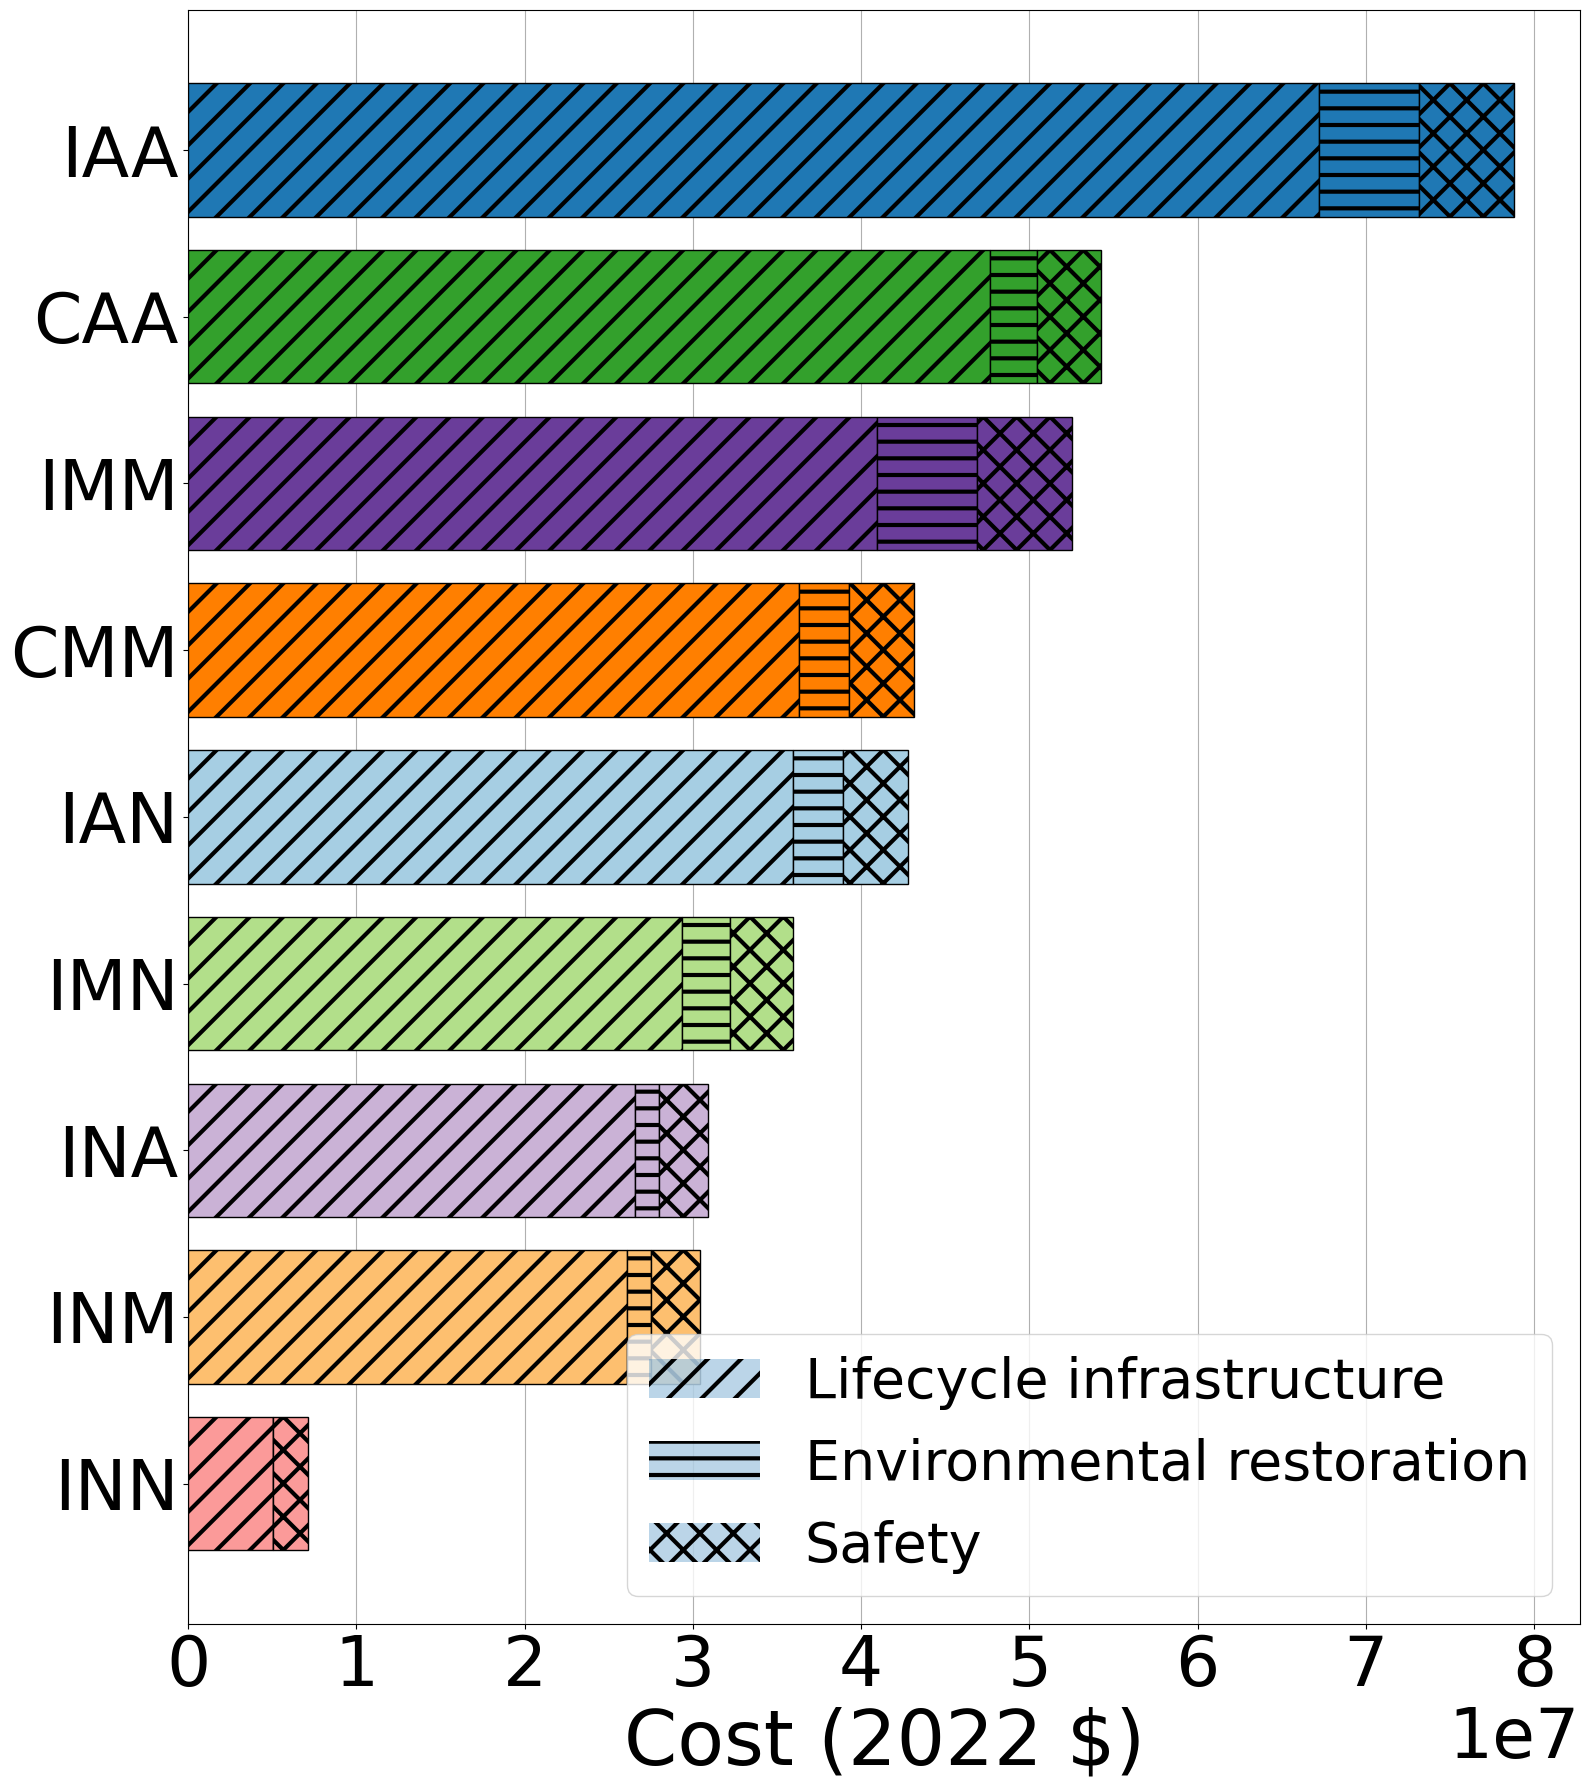

In [293]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])


# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


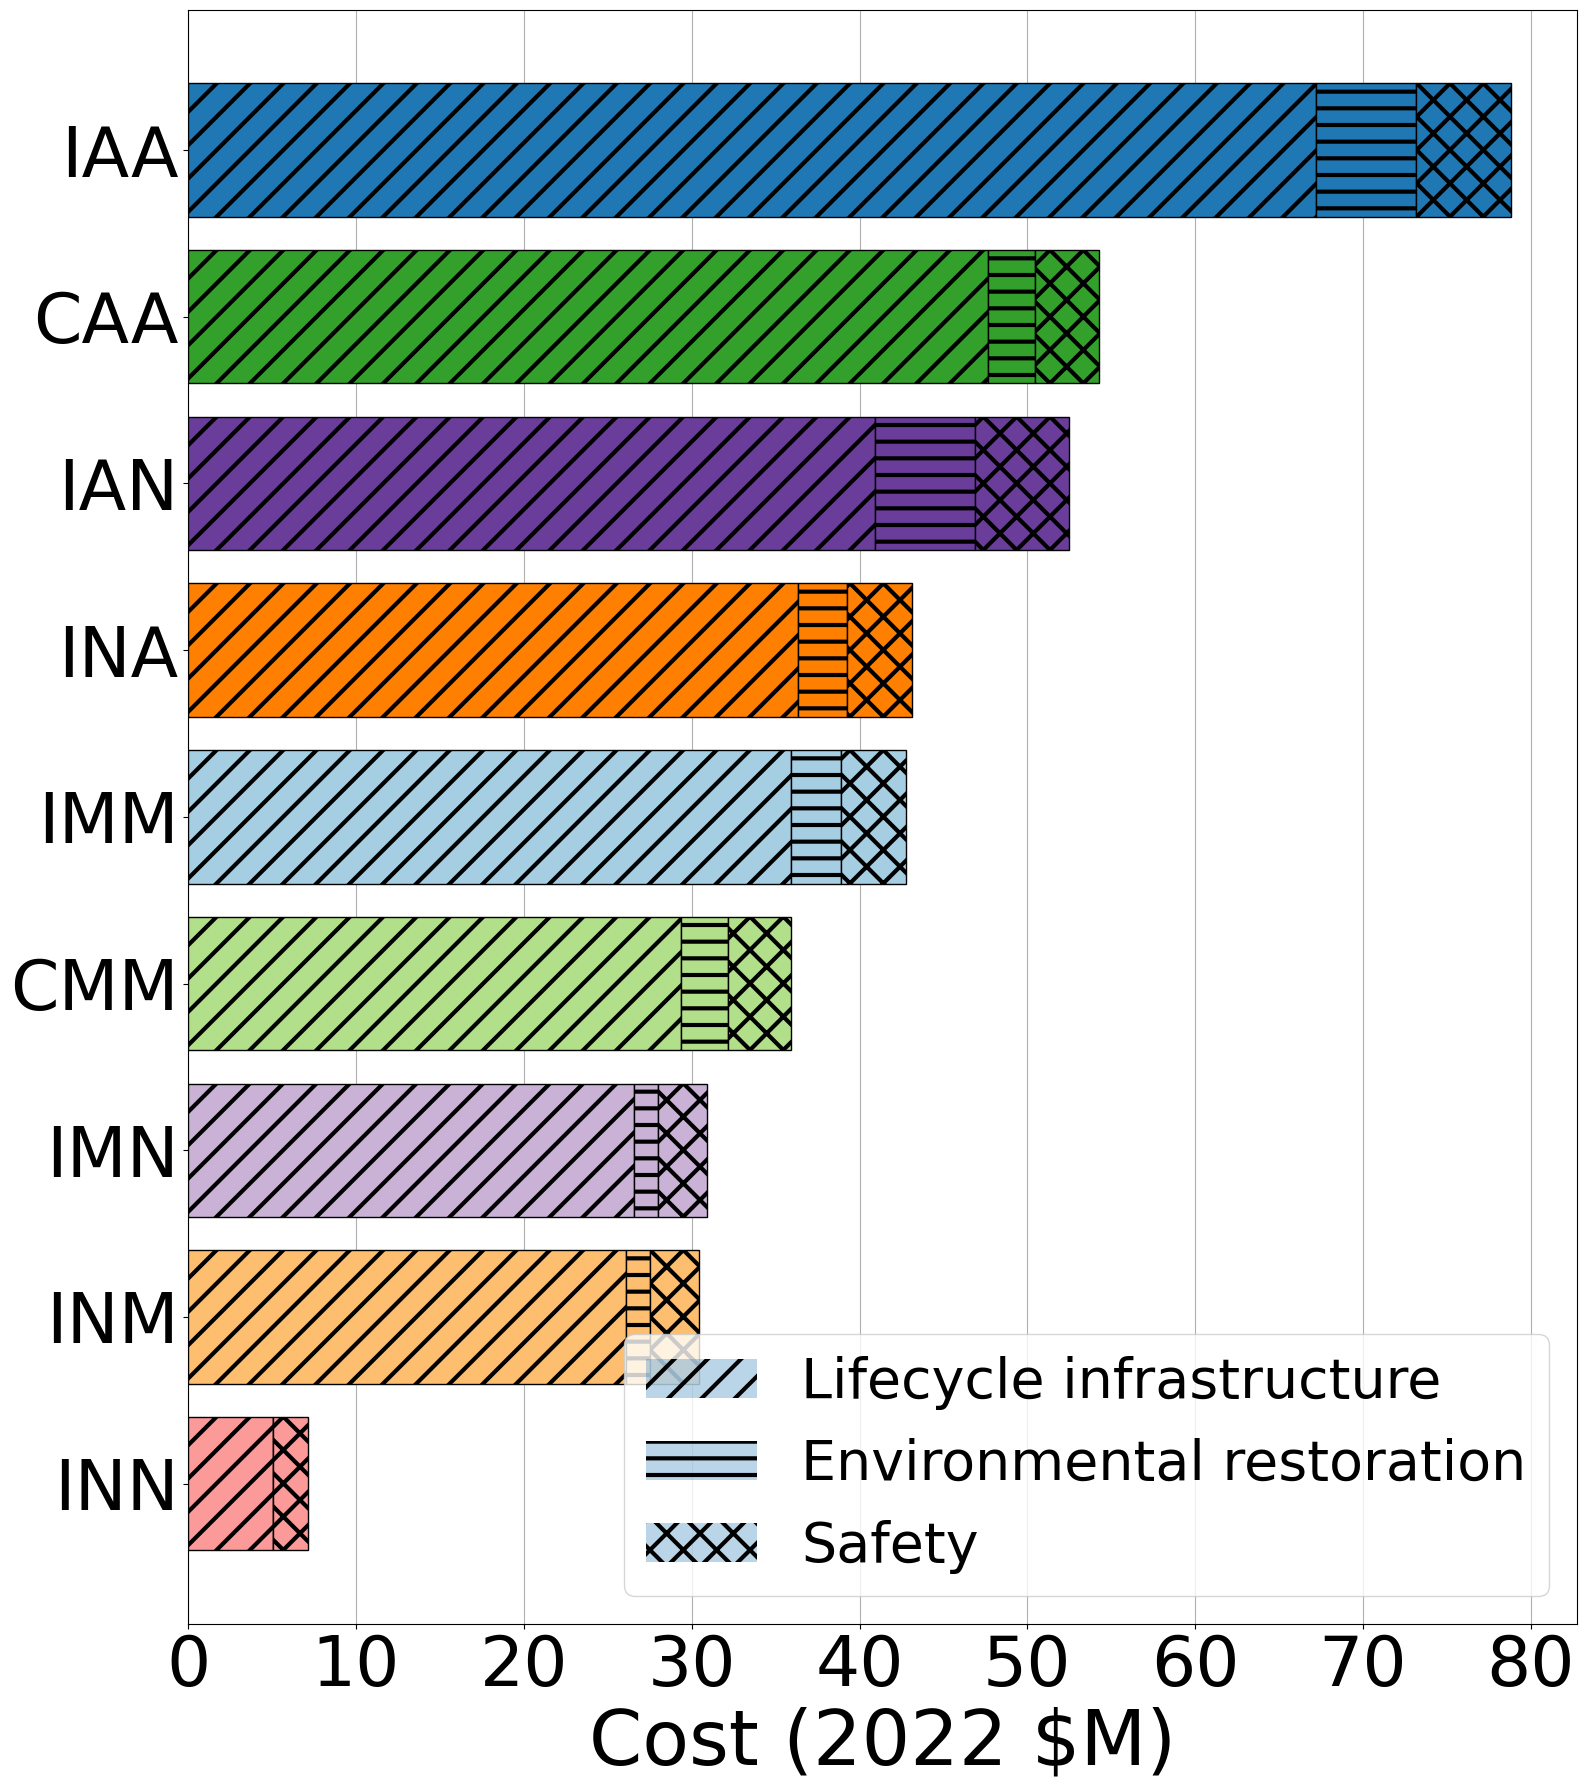

In [294]:
# Calculate the total for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99', '#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost.index, labels=['INN', 'INM', 'IMN', 'CMM', 'IMM', 'INA', 'IAN', 'CAA', 'IAA'])

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

# Set labels and grid
plt.xlabel("Cost (2022 $M)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [295]:
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration       safety
0      INN                5029480.00                      0.000  2097282.720
1      INM               26566747.32                1422186.244  2929771.670
2      INA               36310457.11                2968567.363  3871296.702
3      IMN               26097596.80                1422186.244  2929771.670
4      IAN               35927293.91                2968567.363  3871296.702
5      CMM               29337295.98                2844372.488  3762260.620
6      IMM               47634864.12                2844372.488  3762260.620
7      CAA               40925879.02                5937134.726  5645310.683
8      IAA               67208271.02                5937134.726  5645310.683

In [296]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - icc_infra) / icc_infra) * 100
percentage_increase

41.09050642128713

In [297]:
iaa_infra = df_npv_cost['lifecycle_infrastructure'][8]  # Index of IAA
jaa_infra = df_npv_cost['lifecycle_infrastructure'][7]  # Index of JAA

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((iaa_infra - jaa_infra) / iaa_infra) * 100
percentage_increase

39.10588920250428

In [298]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

38.412134637154494

In [299]:
icc_infra = df_npv_cost['lifecycle_infrastructure'][6]  # Index of ICC
jcc_infra = df_npv_cost['lifecycle_infrastructure'][5]  # Index of JCC

# Calculating the percentage increase of IAA's lifecycle infrastructure over ICC's.
percentage_increase = ((icc_infra - jcc_infra) / icc_infra) * 100
percentage_increase

38.412134637154494

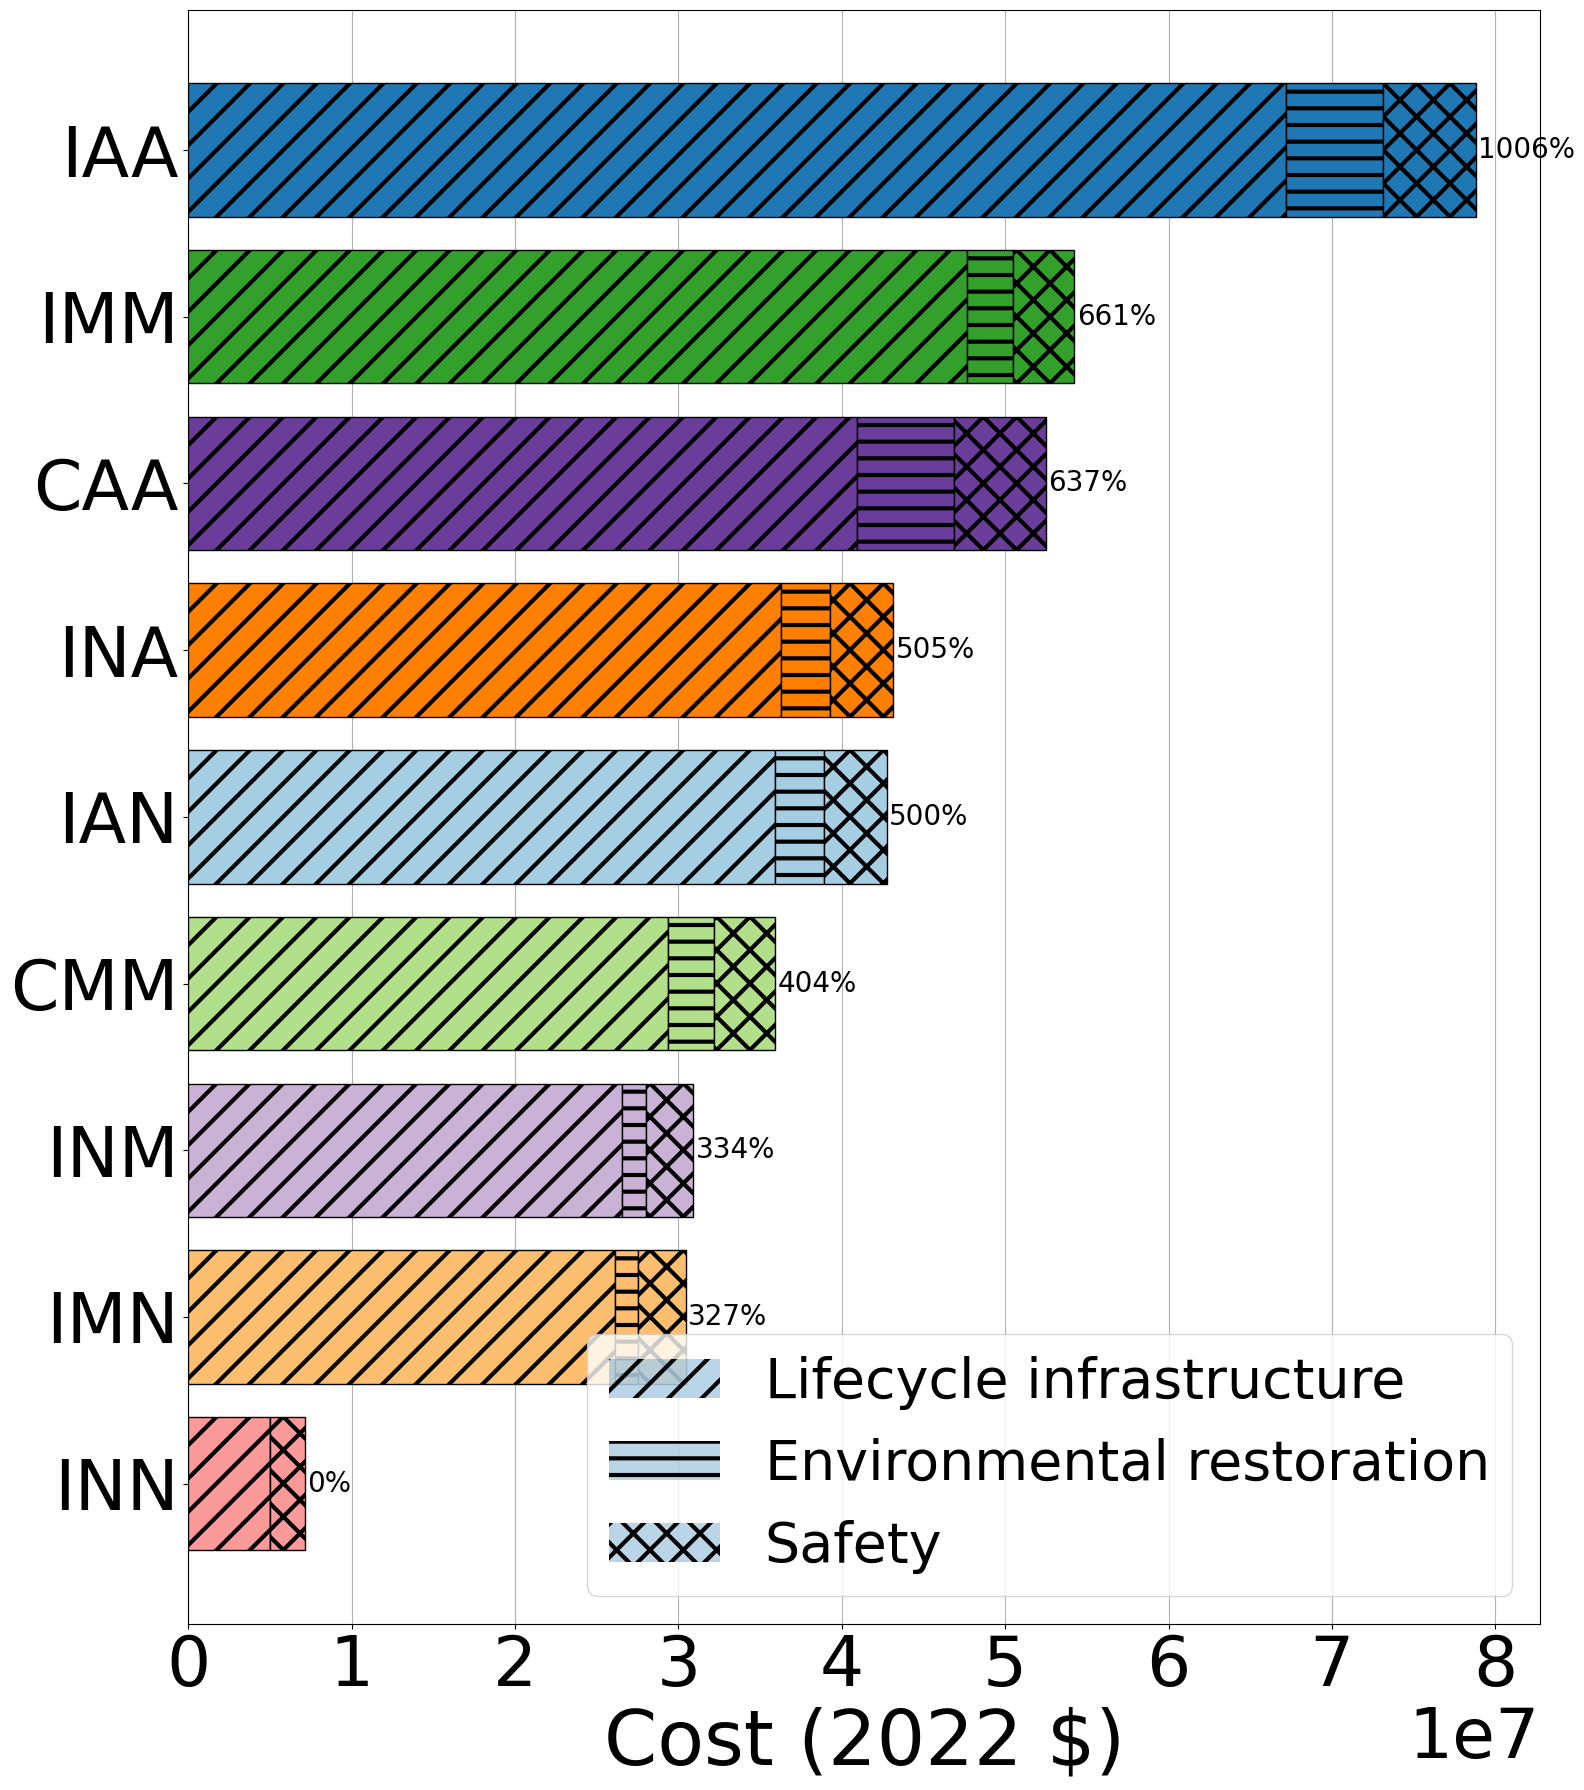

In [300]:
# Manually set the strategy names as the index if they aren't already
df_npv_cost.index = ['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA']

# Calculate the total cost for each strategy
total_cost = df_npv_cost['lifecycle_infrastructure'] + df_npv_cost['environmental_restoration'] + df_npv_cost['safety']

# Find the total cost of INN for reference
inn_total_cost = total_cost['INN']

# Calculate the percentage difference relative to INN for each strategy
percent_diff_to_inn = (total_cost - inn_total_cost) / inn_total_cost * 100

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), sorted_indices_reversed, fontsize=50)

# Annotating percentage difference relative to INN
for i, strategy in enumerate(sorted_indices_reversed):
    strategy_total_cost = total_cost[strategy]
    percent_value = percent_diff_to_inn[strategy]
    # Place the annotation at the end of each total bar, with a small offset to the right for readability
    ax.text(strategy_total_cost + inn_total_cost * 0.02, i, f'{percent_value:.0f}%', va='center', fontsize=20)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)

# Set labels and grid
plt.xlabel("Cost (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=400, bbox_inches='tight')
plt.show()


In [301]:
inn_total_cost

7126762.720000001

In [302]:
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration       safety
INN      INN                5029480.00                      0.000  2097282.720
INM      INM               26566747.32                1422186.244  2929771.670
INA      INA               36310457.11                2968567.363  3871296.702
IMN      IMN               26097596.80                1422186.244  2929771.670
IAN      IAN               35927293.91                2968567.363  3871296.702
CMM      CMM               29337295.98                2844372.488  3762260.620
IMM      IMM               47634864.12                2844372.488  3762260.620
CAA      CAA               40925879.02                5937134.726  5645310.683
IAA      IAA               67208271.02                5937134.726  5645310.683

In [303]:
df_npv_cost['total_cost']=df_npv_cost['lifecycle_infrastructure']+df_npv_cost['environmental_restoration']+df_npv_cost['safety']
df_npv_cost

Strategy  lifecycle_infrastructure  environmental_restoration  \
INN      INN                5029480.00                      0.000   
INM      INM               26566747.32                1422186.244   
INA      INA               36310457.11                2968567.363   
IMN      IMN               26097596.80                1422186.244   
IAN      IAN               35927293.91                2968567.363   
CMM      CMM               29337295.98                2844372.488   
IMM      IMM               47634864.12                2844372.488   
CAA      CAA               40925879.02                5937134.726   
IAA      IAA               67208271.02                5937134.726   

          safety    total_cost  
INN  2097282.720  7.126763e+06  
INM  2929771.670  3.091871e+07  
INA  3871296.702  4.315032e+07  
IMN  2929771.670  3.044955e+07  
IAN  3871296.702  4.276716e+07  
CMM  3762260.620  3.594393e+07  
IMM  3762260.620  5.424150e+07  
CAA  5645310.683  5.250832e+07  
IAA  5645310.683  7.879072e+07

In [304]:
(3.192343e+07-2.322343e+07)/3.192343e+07

0.2725271062664632

In [305]:
(7.133958e+07-5.063958e+07)/7.133958e+07

0.29016150641761557

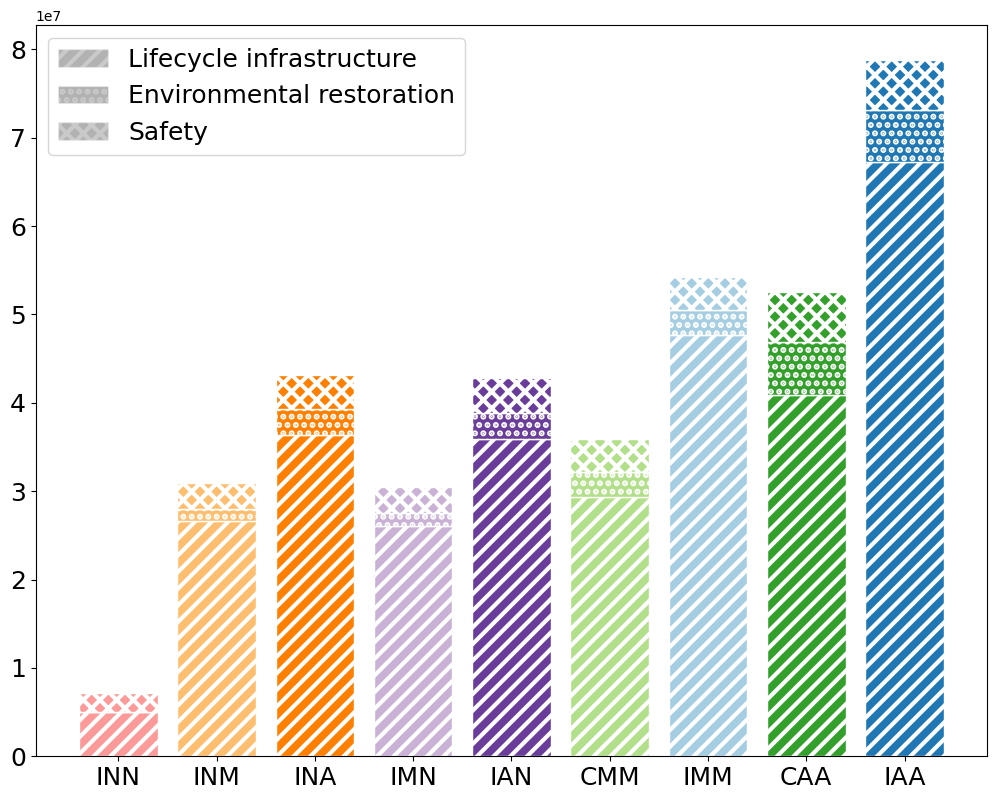

In [306]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 8)

x= df_npv_cost.index
y1 = df_npv_cost['lifecycle_infrastructure']
y2 = df_npv_cost['environmental_restoration']
y3 = df_npv_cost['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White', hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='White',  hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',edgecolor='White', alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',edgecolor='White', alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

#plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)
plt.show()

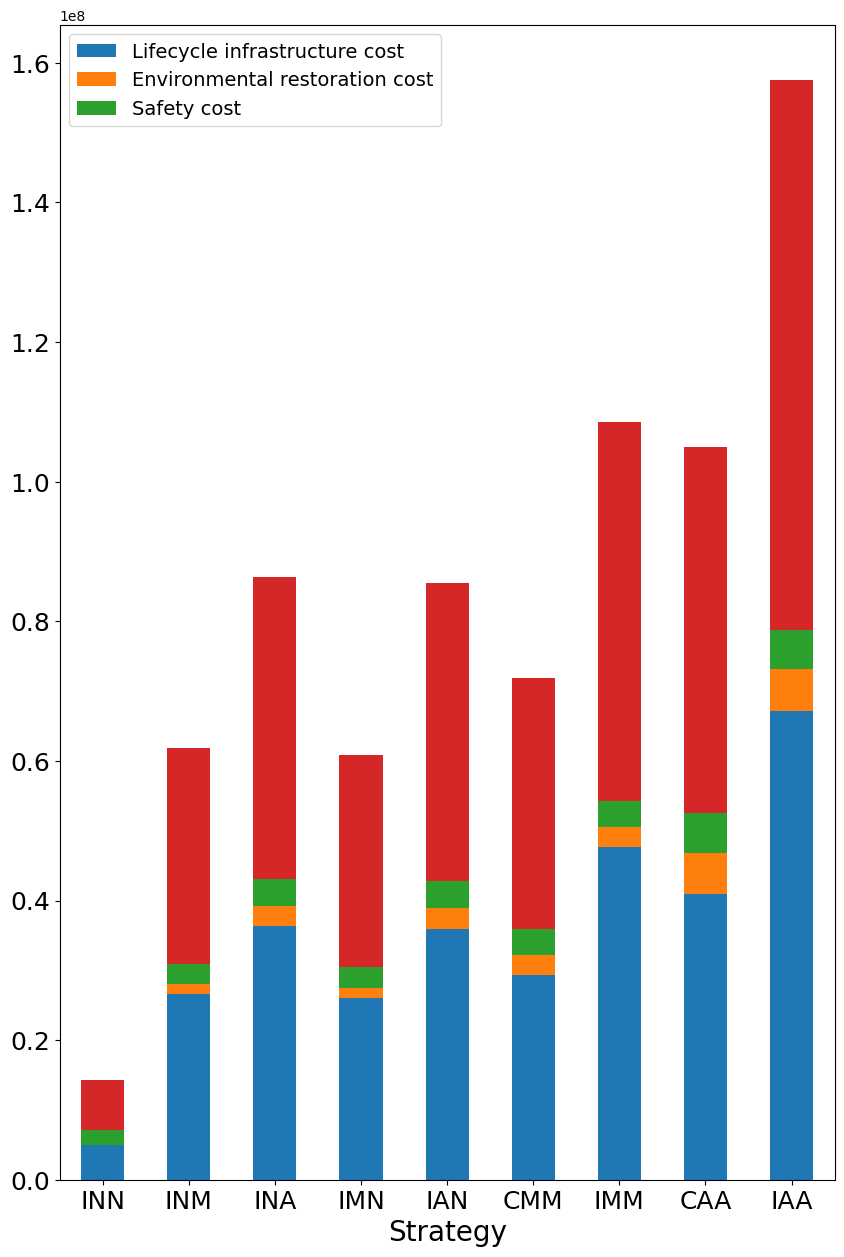

In [307]:
# plotting cost results integerated for broadband and electric
df_npv_cost.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation = 0)
plt.savefig(r'../../figures/npv-cost-integrated.png', dpi=300)

In [308]:
df_npv_loss=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [309]:
df_npv_loss

avoided_economic_losses
Strategy                         
INN                  0.000000e+00
INM                  8.449969e+06
INA                  1.781414e+07
IMN                  1.770095e+07
IAN                  3.731697e+07
CMM                  2.615092e+07
IMM                  2.615092e+07
CAA                  5.513111e+07
IAA                  5.513111e+07

In [310]:
df_npv_loss=df_npv_loss.reset_index()

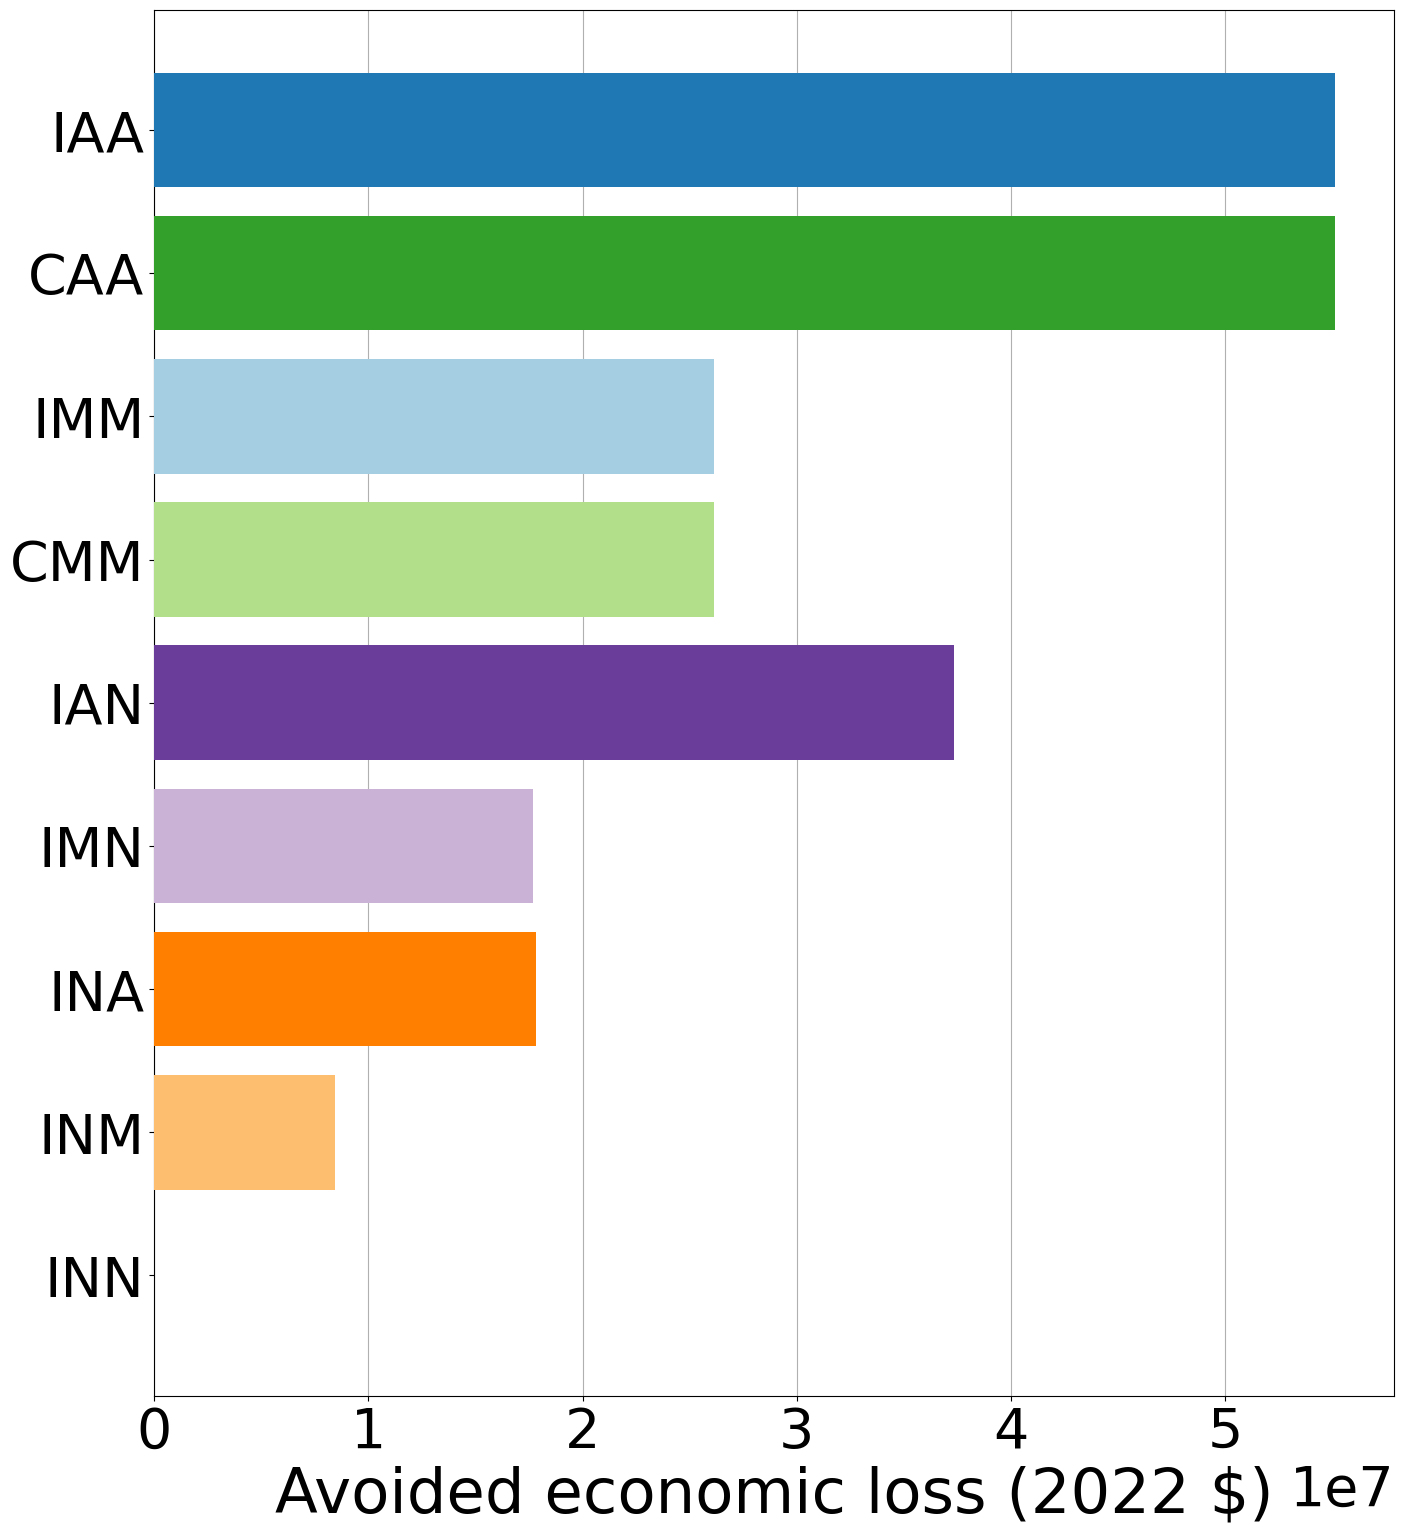

In [311]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

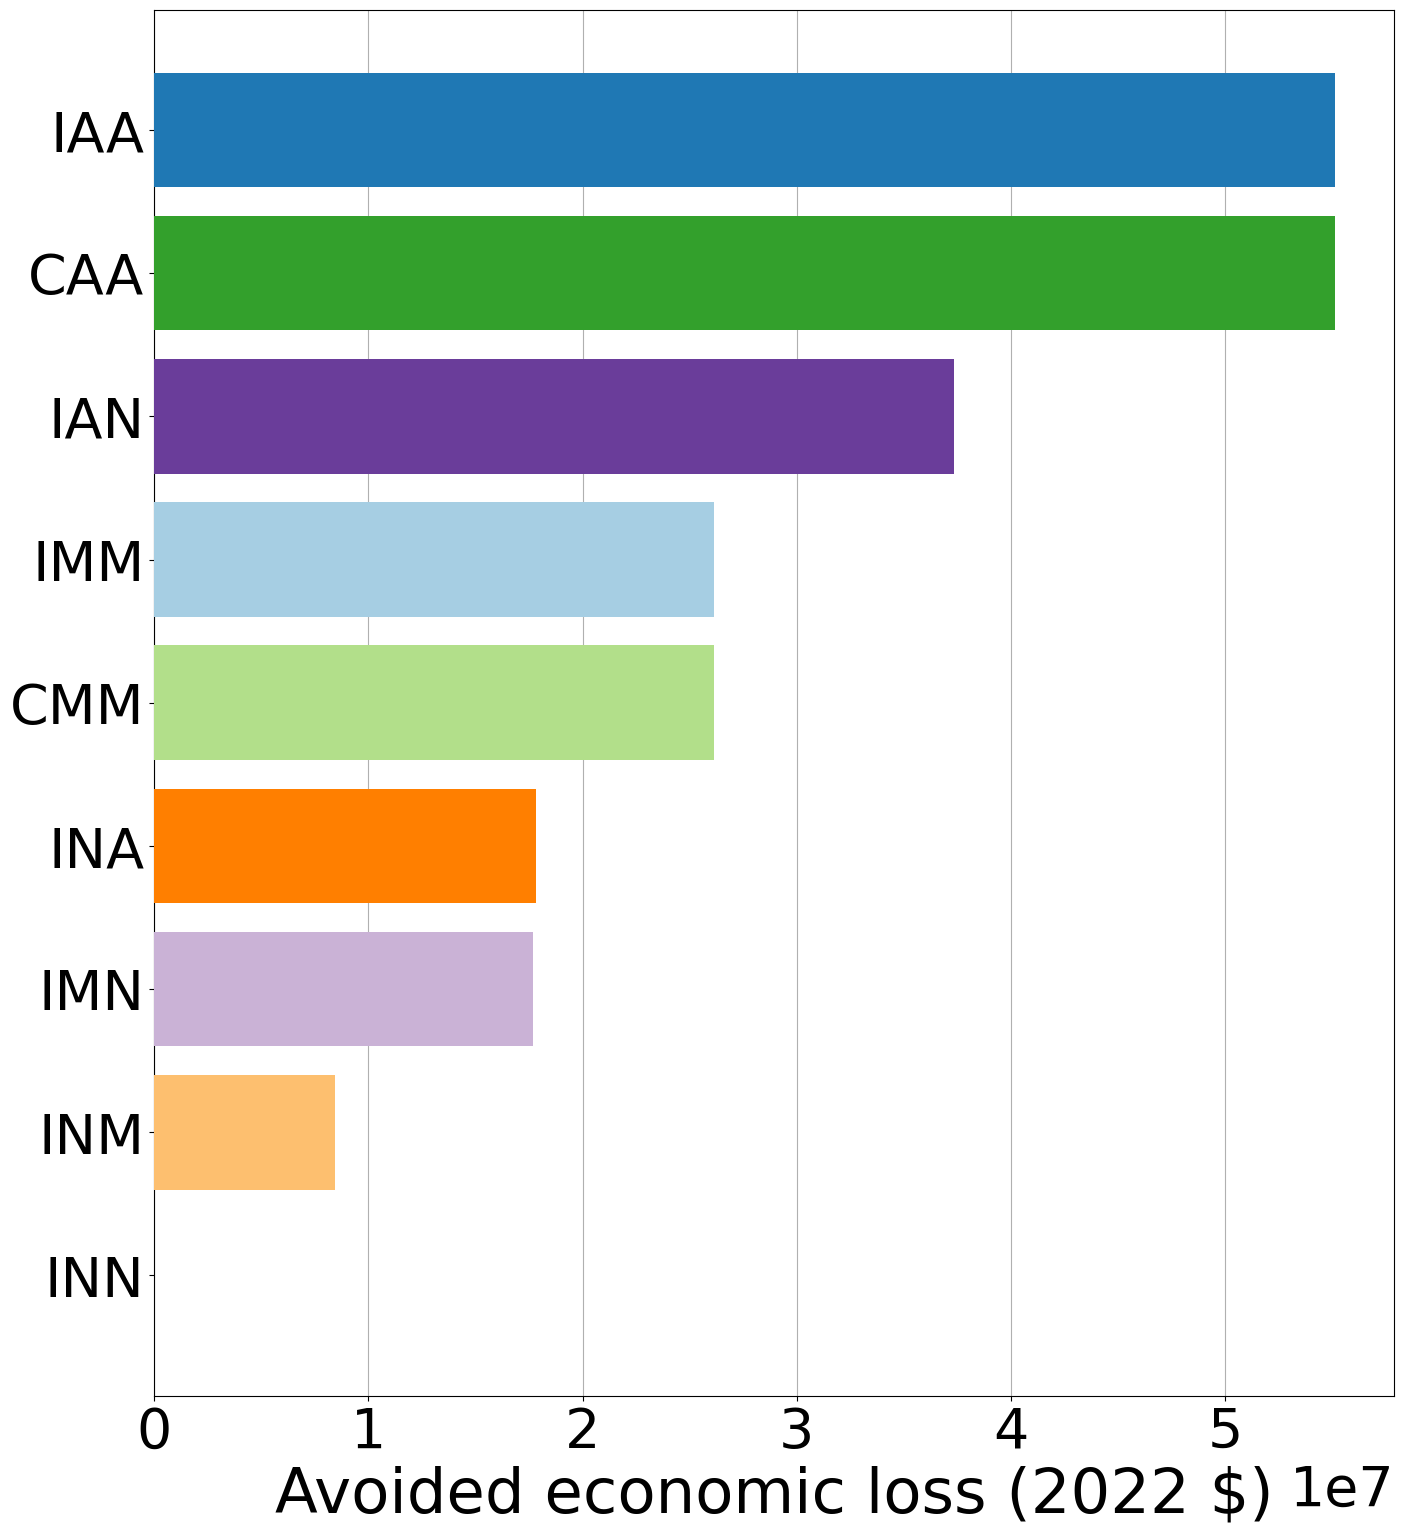

In [312]:
strategy_order = ['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA']
colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

plt.xlabel('Avoided economic loss (2022 $)', fontsize=12)
plt.xticks(fontsize=40)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=40)  # Set y-ticks and labels from the sorted DataFrame
plt.xlabel ('Avoided economic loss (2022 $)', fontsize=45)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

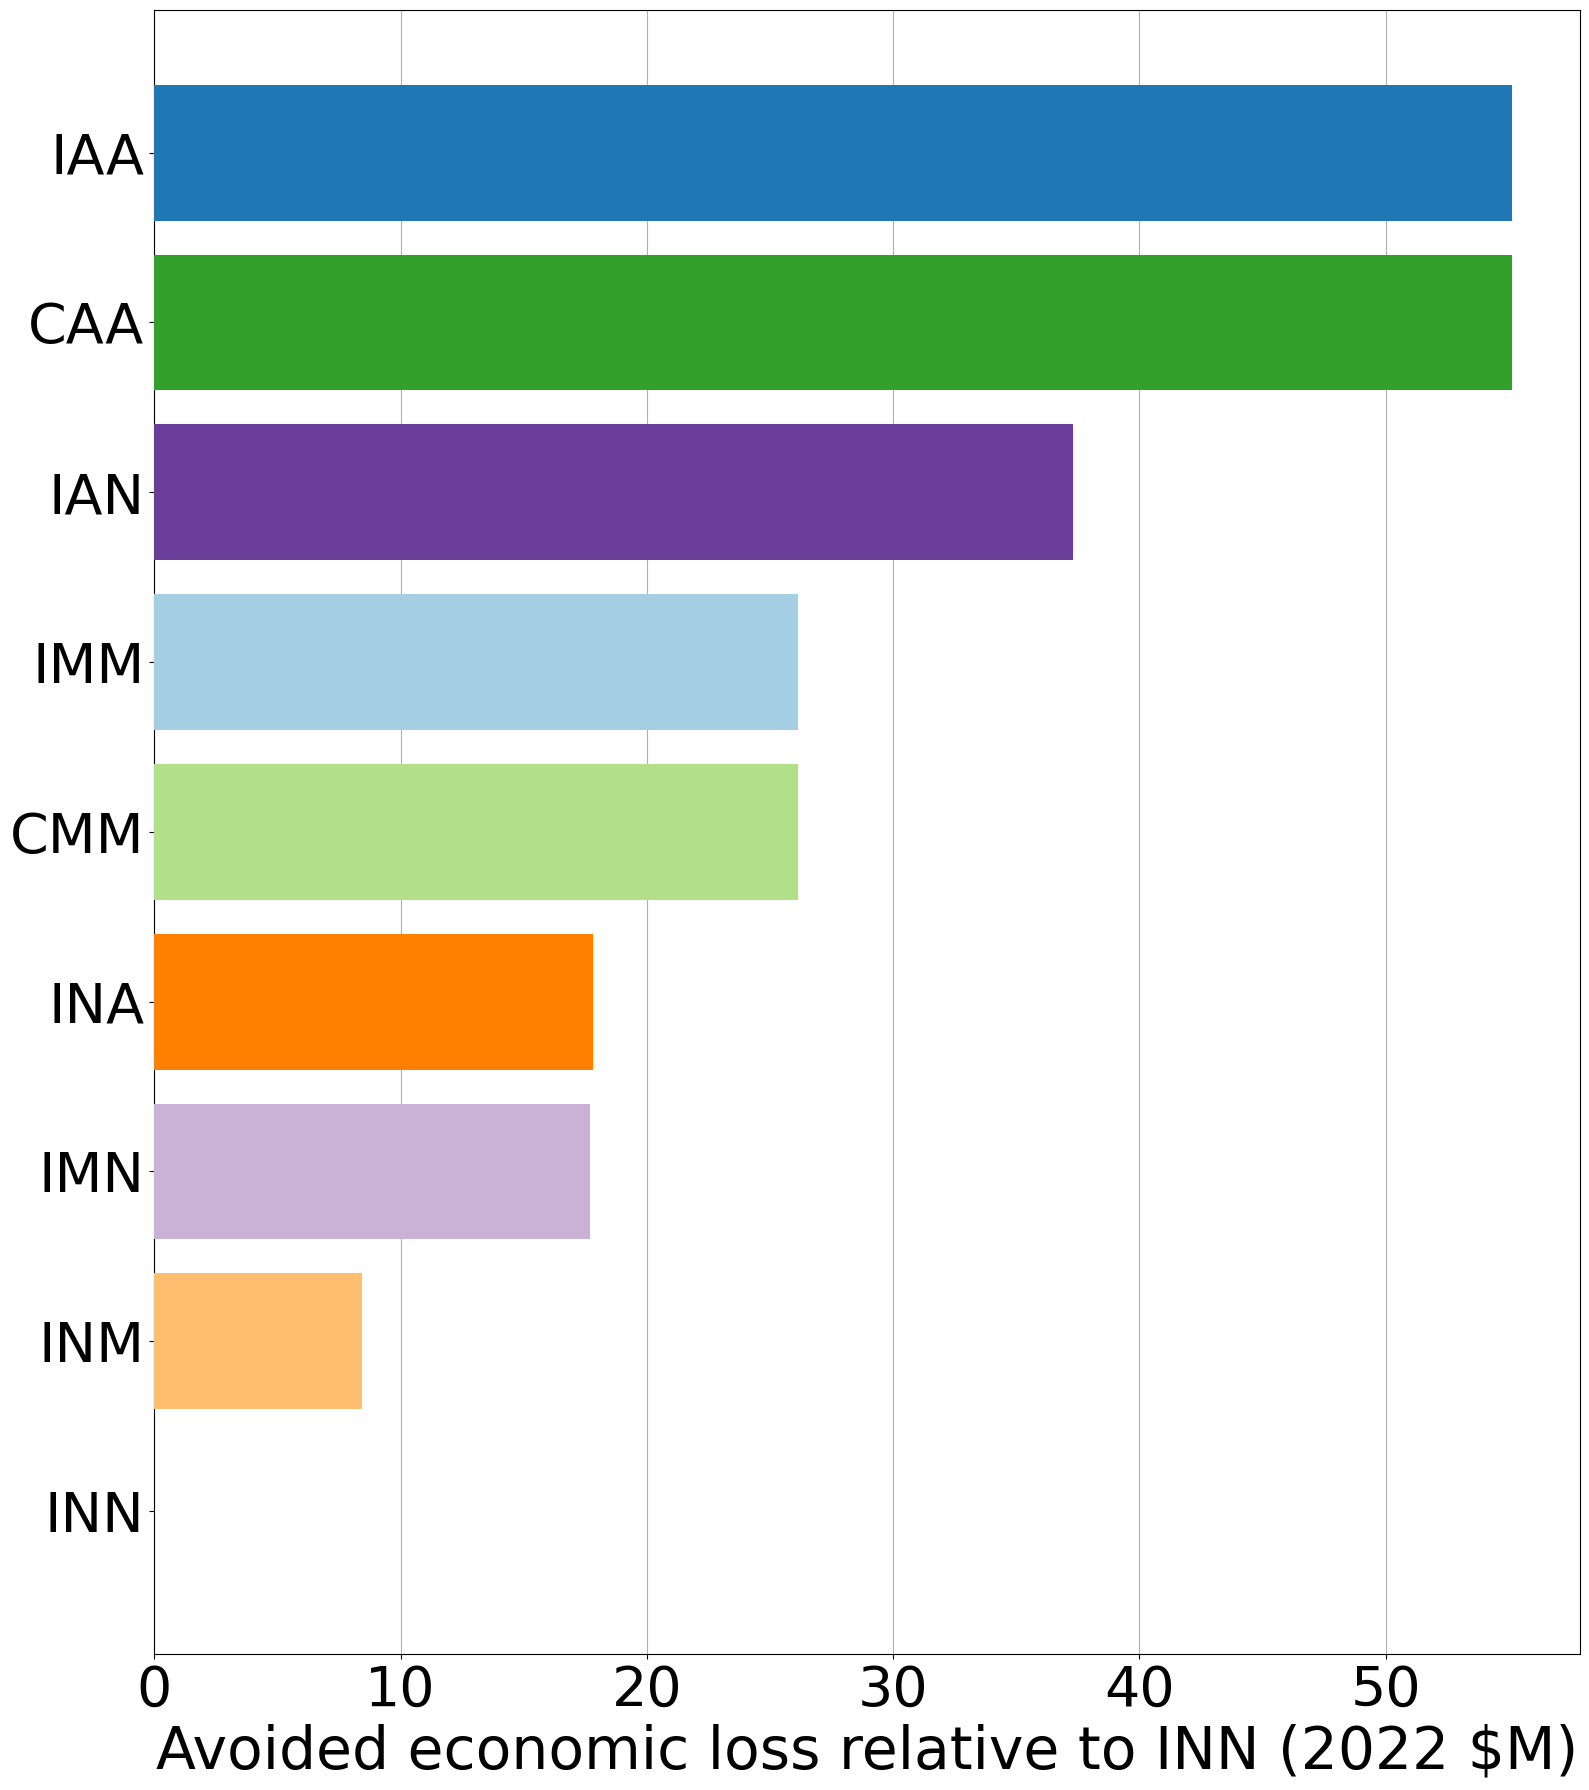

In [313]:
# Assuming df_npv_loss is already defined and contains the necessary data
strategy_order = ['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA']
colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Avoided economic loss relative to INN (2022 $M)', fontsize=42)
plt.xticks(fontsize=40)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=40)  # Set y-ticks and labels from the sorted DataFrame
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [314]:
df_npv_loss_sorted

Strategy  avoided_economic_losses    color
0      INN             0.000000e+00  #FB9A99
1      INM             8.449969e+06  #FDBF6F
2      IMN             1.770095e+07  #CAB2D6
3      INA             1.781414e+07  #FF7F00
4      CMM             2.615092e+07  #B2DF8A
5      IMM             2.615092e+07  #A6CEE3
6      IAN             3.731697e+07  #6A3D9A
7      CAA             5.513111e+07  #33A02C
8      IAA             5.513111e+07  #1F78B4

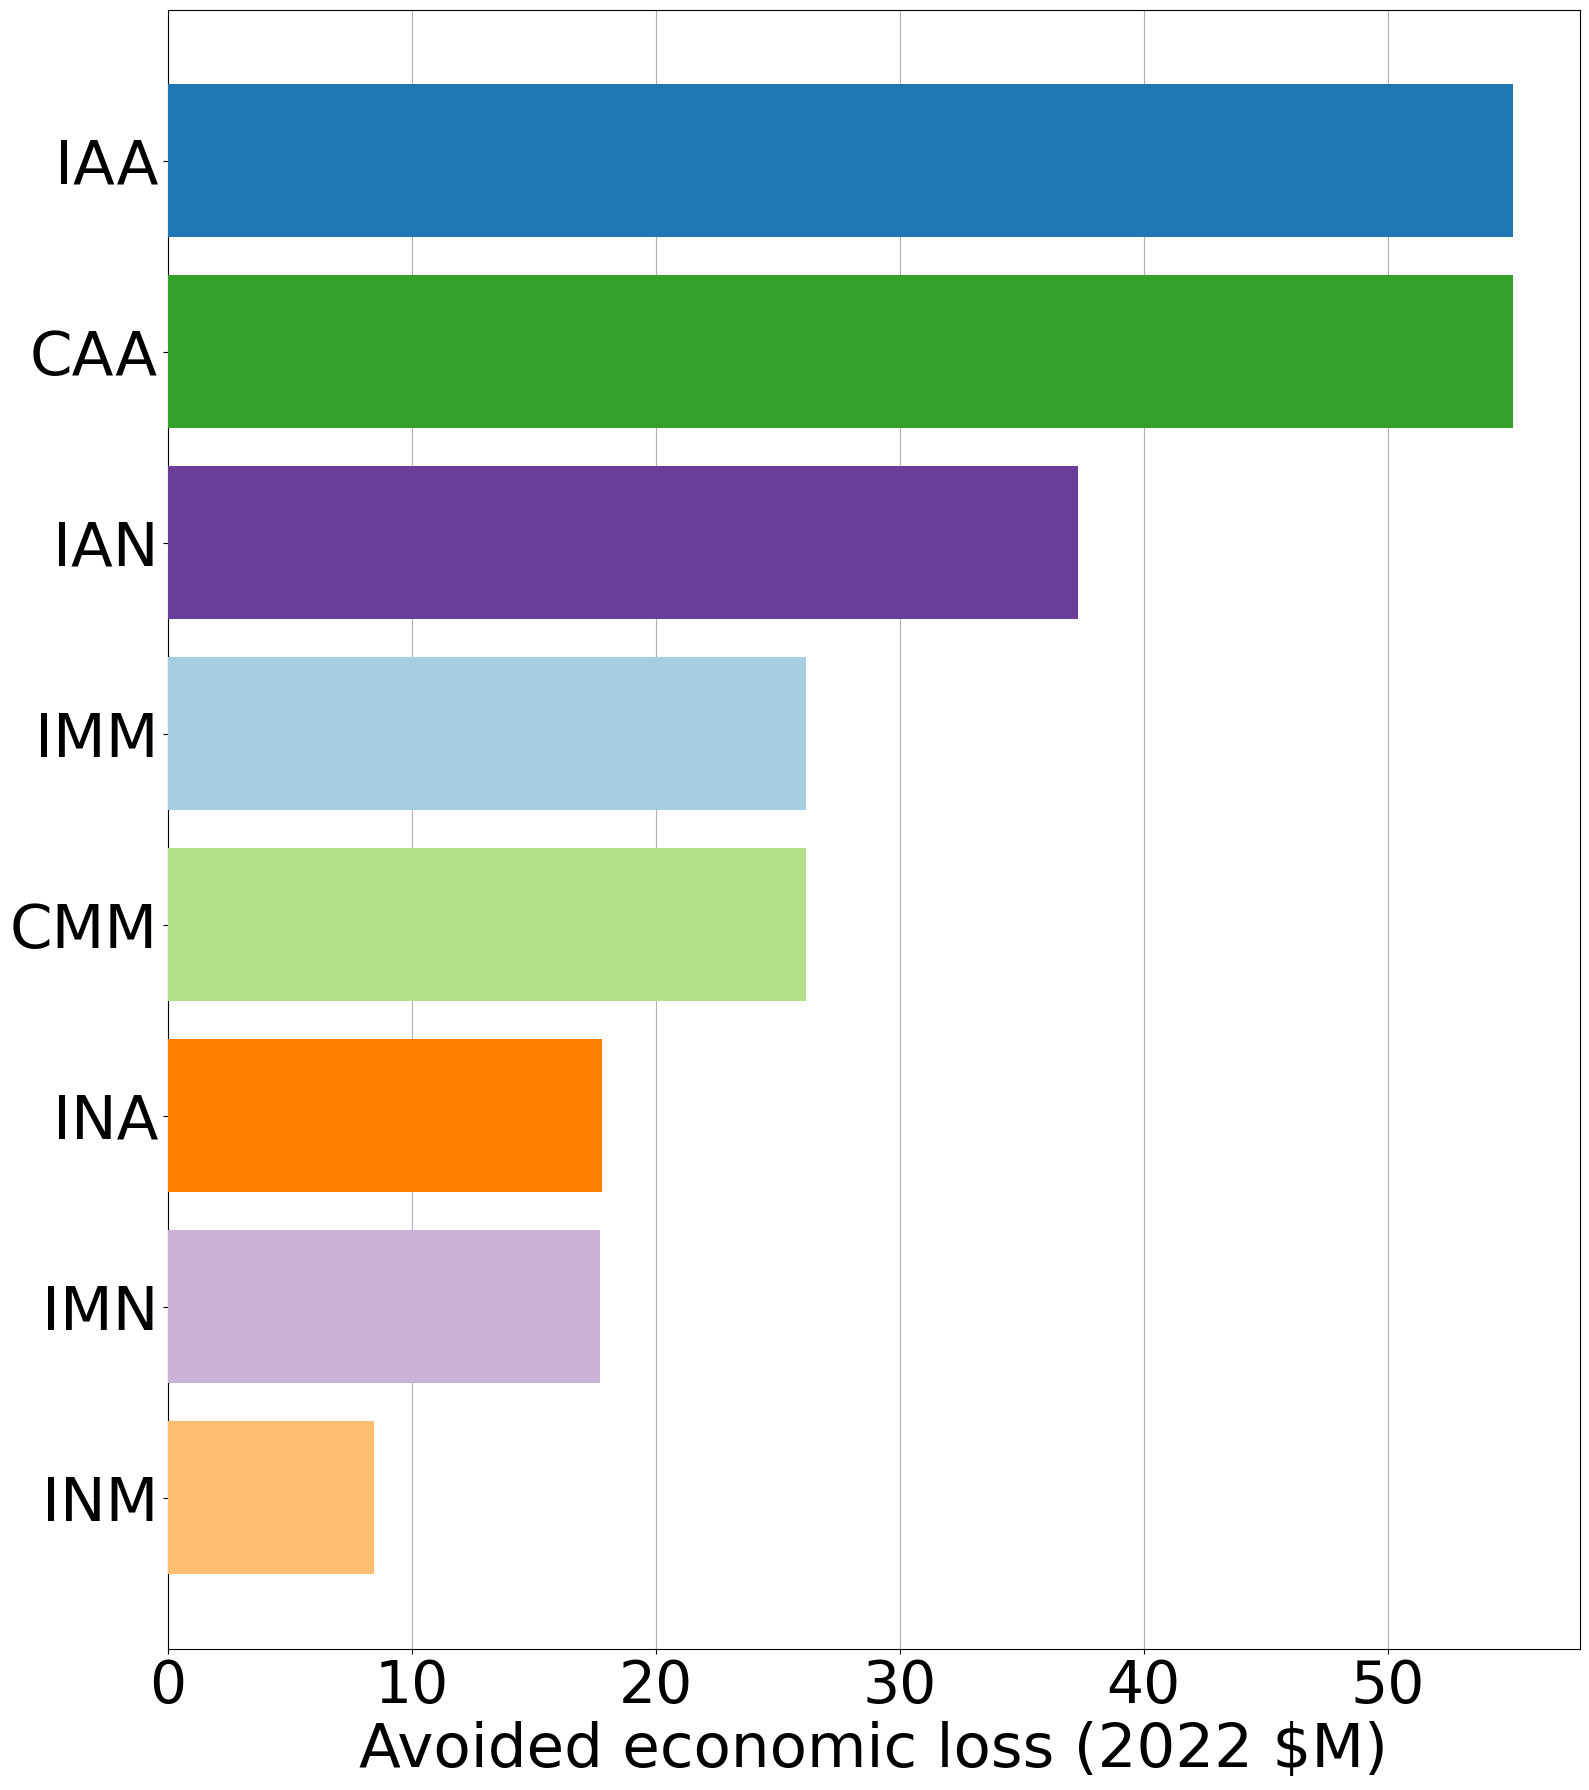

In [341]:
# Assuming df_npv_loss is already defined and contains the necessary data
strategy_order = ['INM','INA','IMN','IAN','CMM','IMM','CAA','IAA']

colors = ['#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

color_mapping = dict(zip(strategy_order, colors))

# Sort the DataFrame based on 'avoided_economic_losses' and reset index
df_npv_loss_sorted = df_npv_loss.sort_values('avoided_economic_losses', ascending=True).reset_index(drop=True)
df_npv_loss_sorted = df_npv_loss_sorted.loc[df_npv_loss_sorted['Strategy']!='INN']

# Reset the index of the DataFrame
df_npv_loss_sorted = df_npv_loss_sorted.reset_index(drop=True)

# Apply the color mapping
df_npv_loss_sorted['color'] = df_npv_loss_sorted['Strategy'].map(color_mapping)

fig, ax = plt.subplots(figsize=(16, 18))

# Loop over the sorted and re-indexed DataFrame using the mapped colors
for i, row in df_npv_loss_sorted.iterrows():
    plt.barh(i, row['avoided_economic_losses'], color=row['color'], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

#plt.xlabel('Avoided loss relative to INN (2022 $M)', fontsize=44)
plt.xlabel('Avoided economic loss (2022 $M)', fontsize=44)
plt.xticks(fontsize=42)
plt.yticks(range(len(df_npv_loss_sorted)), labels=df_npv_loss_sorted['Strategy'], fontsize=44)  # Set y-ticks and labels from the sorted DataFrame
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [316]:
df_npv_loss_sorted

Strategy  avoided_economic_losses    color
0      INM             8.449969e+06  #FDBF6F
1      IMN             1.770095e+07  #CAB2D6
2      INA             1.781414e+07  #FF7F00
3      CMM             2.615092e+07  #B2DF8A
4      IMM             2.615092e+07  #A6CEE3
5      IAN             3.731697e+07  #6A3D9A
6      CAA             5.513111e+07  #33A02C
7      IAA             5.513111e+07  #1F78B4

In [317]:
(47900000.0-24200000.0)/24200000.0

0.9793388429752066

In [318]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Loss results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

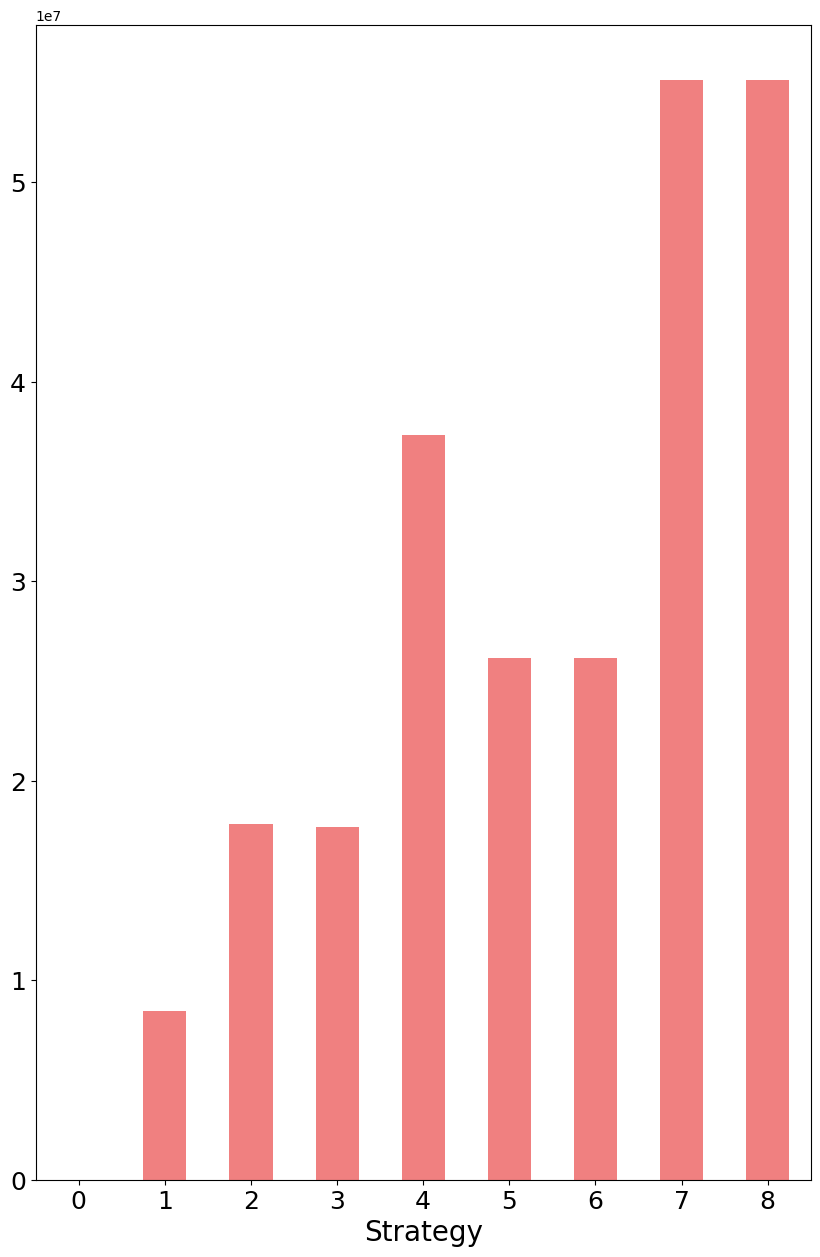

In [319]:
# plotting loss results integerated for broadband and electric
df_npv_loss.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Loss results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated.png', dpi=300)

In [320]:
df_npv_benefit=df_npv_cost_loss_benefit.drop(['total_cost','net_benefit','lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [321]:
df_npv_benefit

aesthetic_benefit
Strategy                   
INN            0.000000e+00
INM            4.284824e+05
INA            7.669424e+05
IMN            4.284824e+05
IAN            7.669424e+05
CMM            8.569649e+05
IMM            8.569649e+05
CAA            1.533885e+06
IAA            1.533885e+06

In [322]:
df_npv_benefit=df_npv_benefit.reset_index()

In [323]:
df_npv_benefit

Strategy  aesthetic_benefit
0      INN       0.000000e+00
1      INM       4.284824e+05
2      INA       7.669424e+05
3      IMN       4.284824e+05
4      IAN       7.669424e+05
5      CMM       8.569649e+05
6      IMM       8.569649e+05
7      CAA       1.533885e+06
8      IAA       1.533885e+06

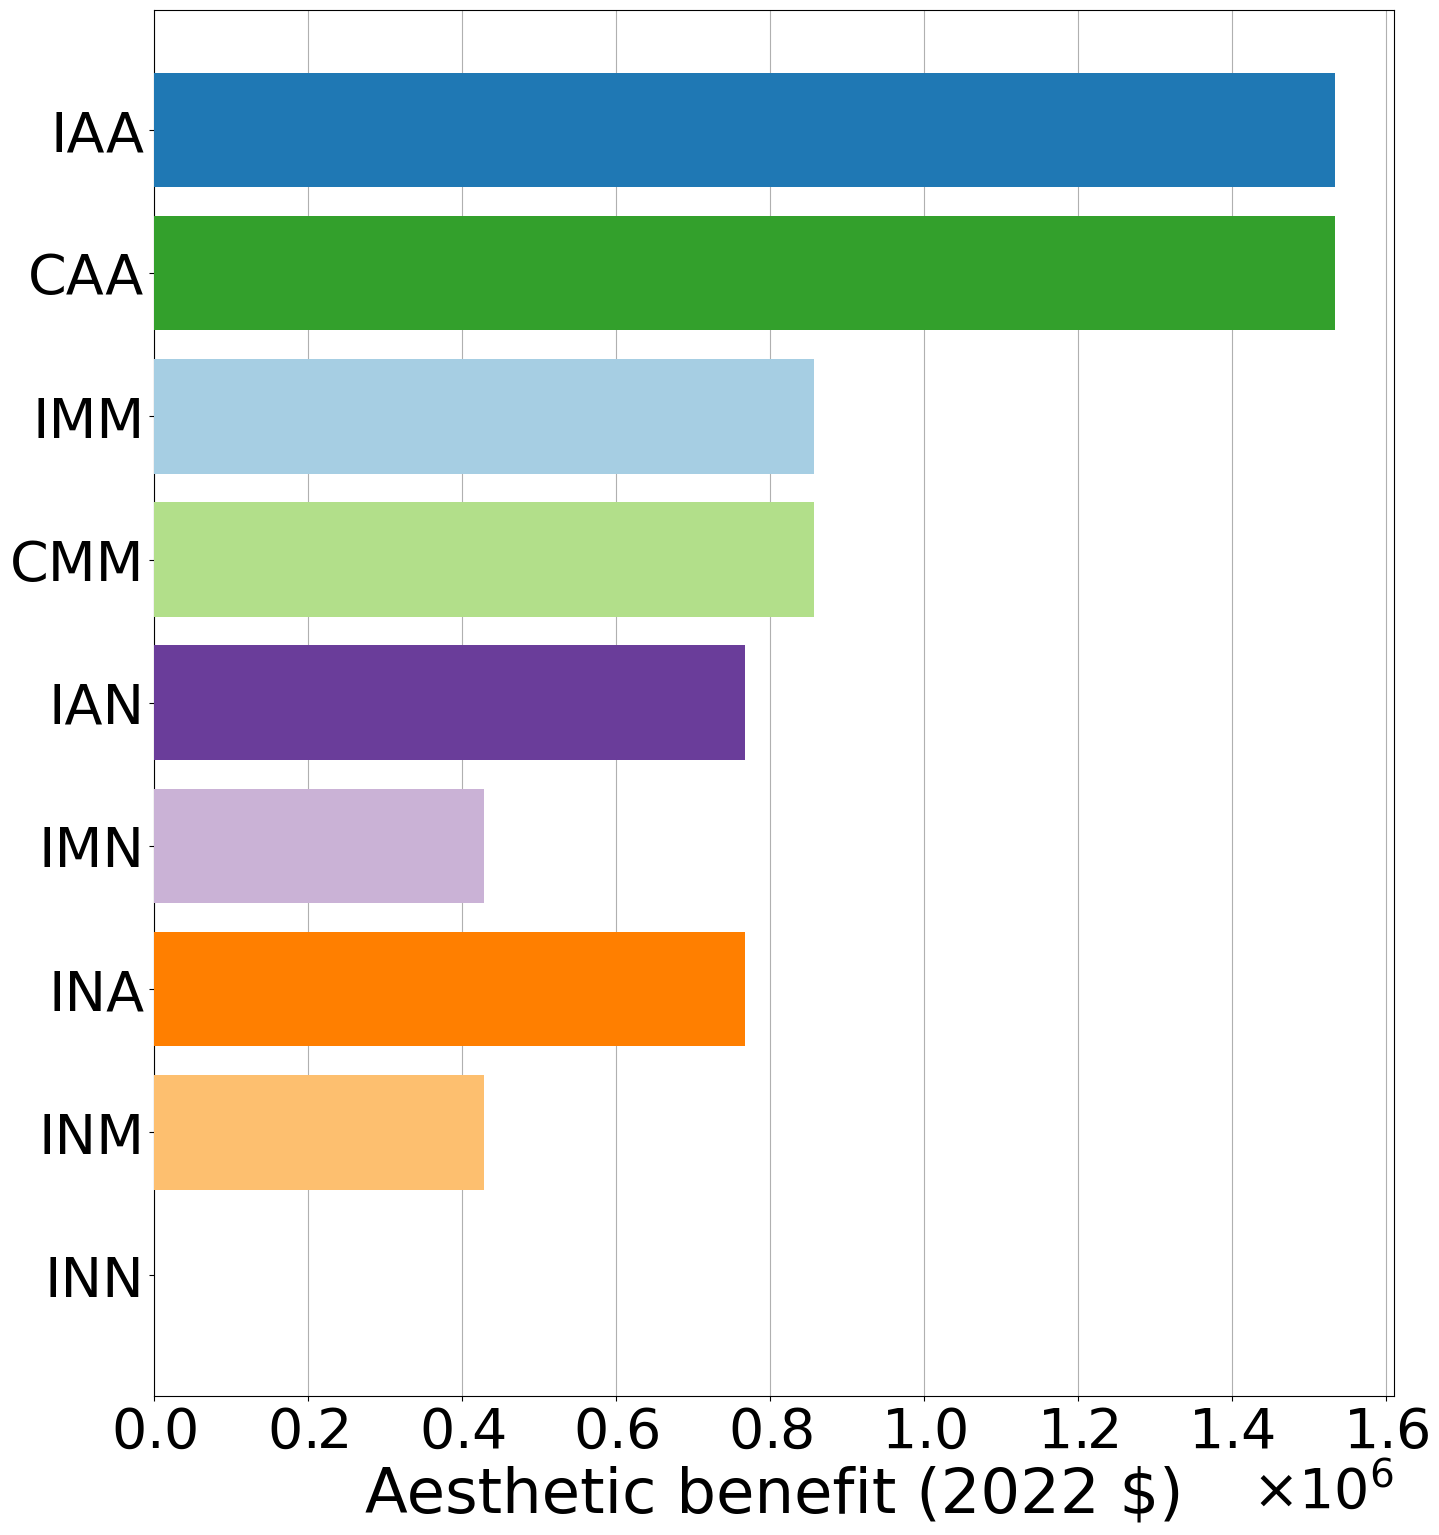

In [324]:
from matplotlib.ticker import ScalarFormatter

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Aesthetic benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(40)

ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=400, bbox_inches='tight')
plt.show()

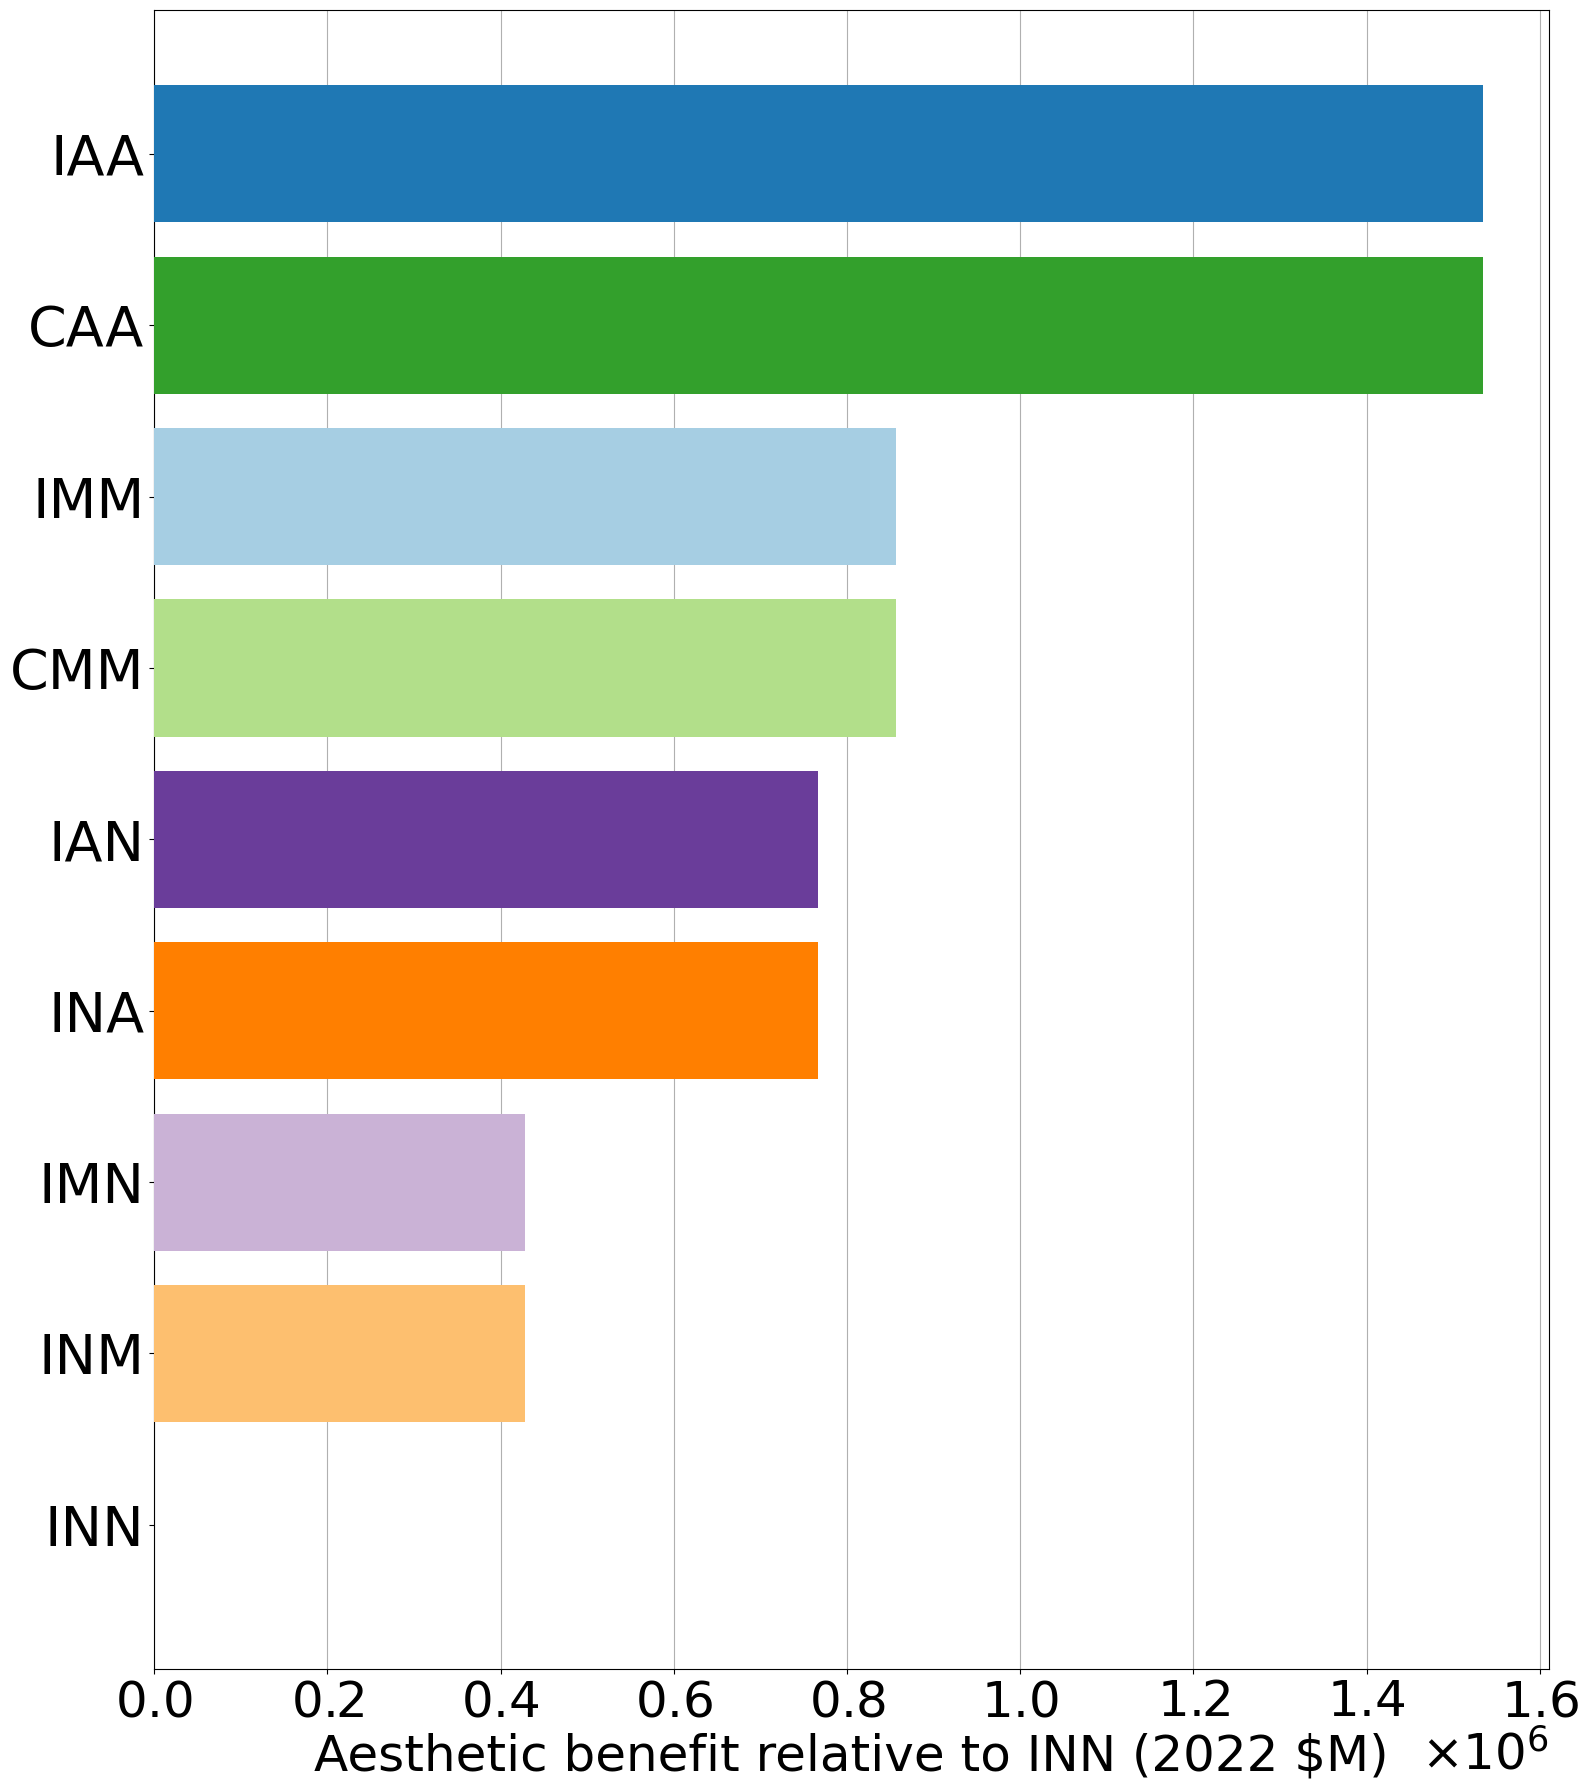

In [325]:
# Create a dictionary to map labels to colors
label_color_dict = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_benefit['Strategy'] = ['INN', 'INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']
df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

plt.xlabel('Aesthetic benefit relative to INN (2022 $M)', fontsize=36)

#plt.ylabel('Strategies', fontsize=45)  # Updated label for y-axis
plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=40)
plt.xticks(fontsize=36)

# Set scientific notation for x-axis
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.offsetText.set_fontsize(36)

ax.yaxis.offsetText.set_fontsize(36)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


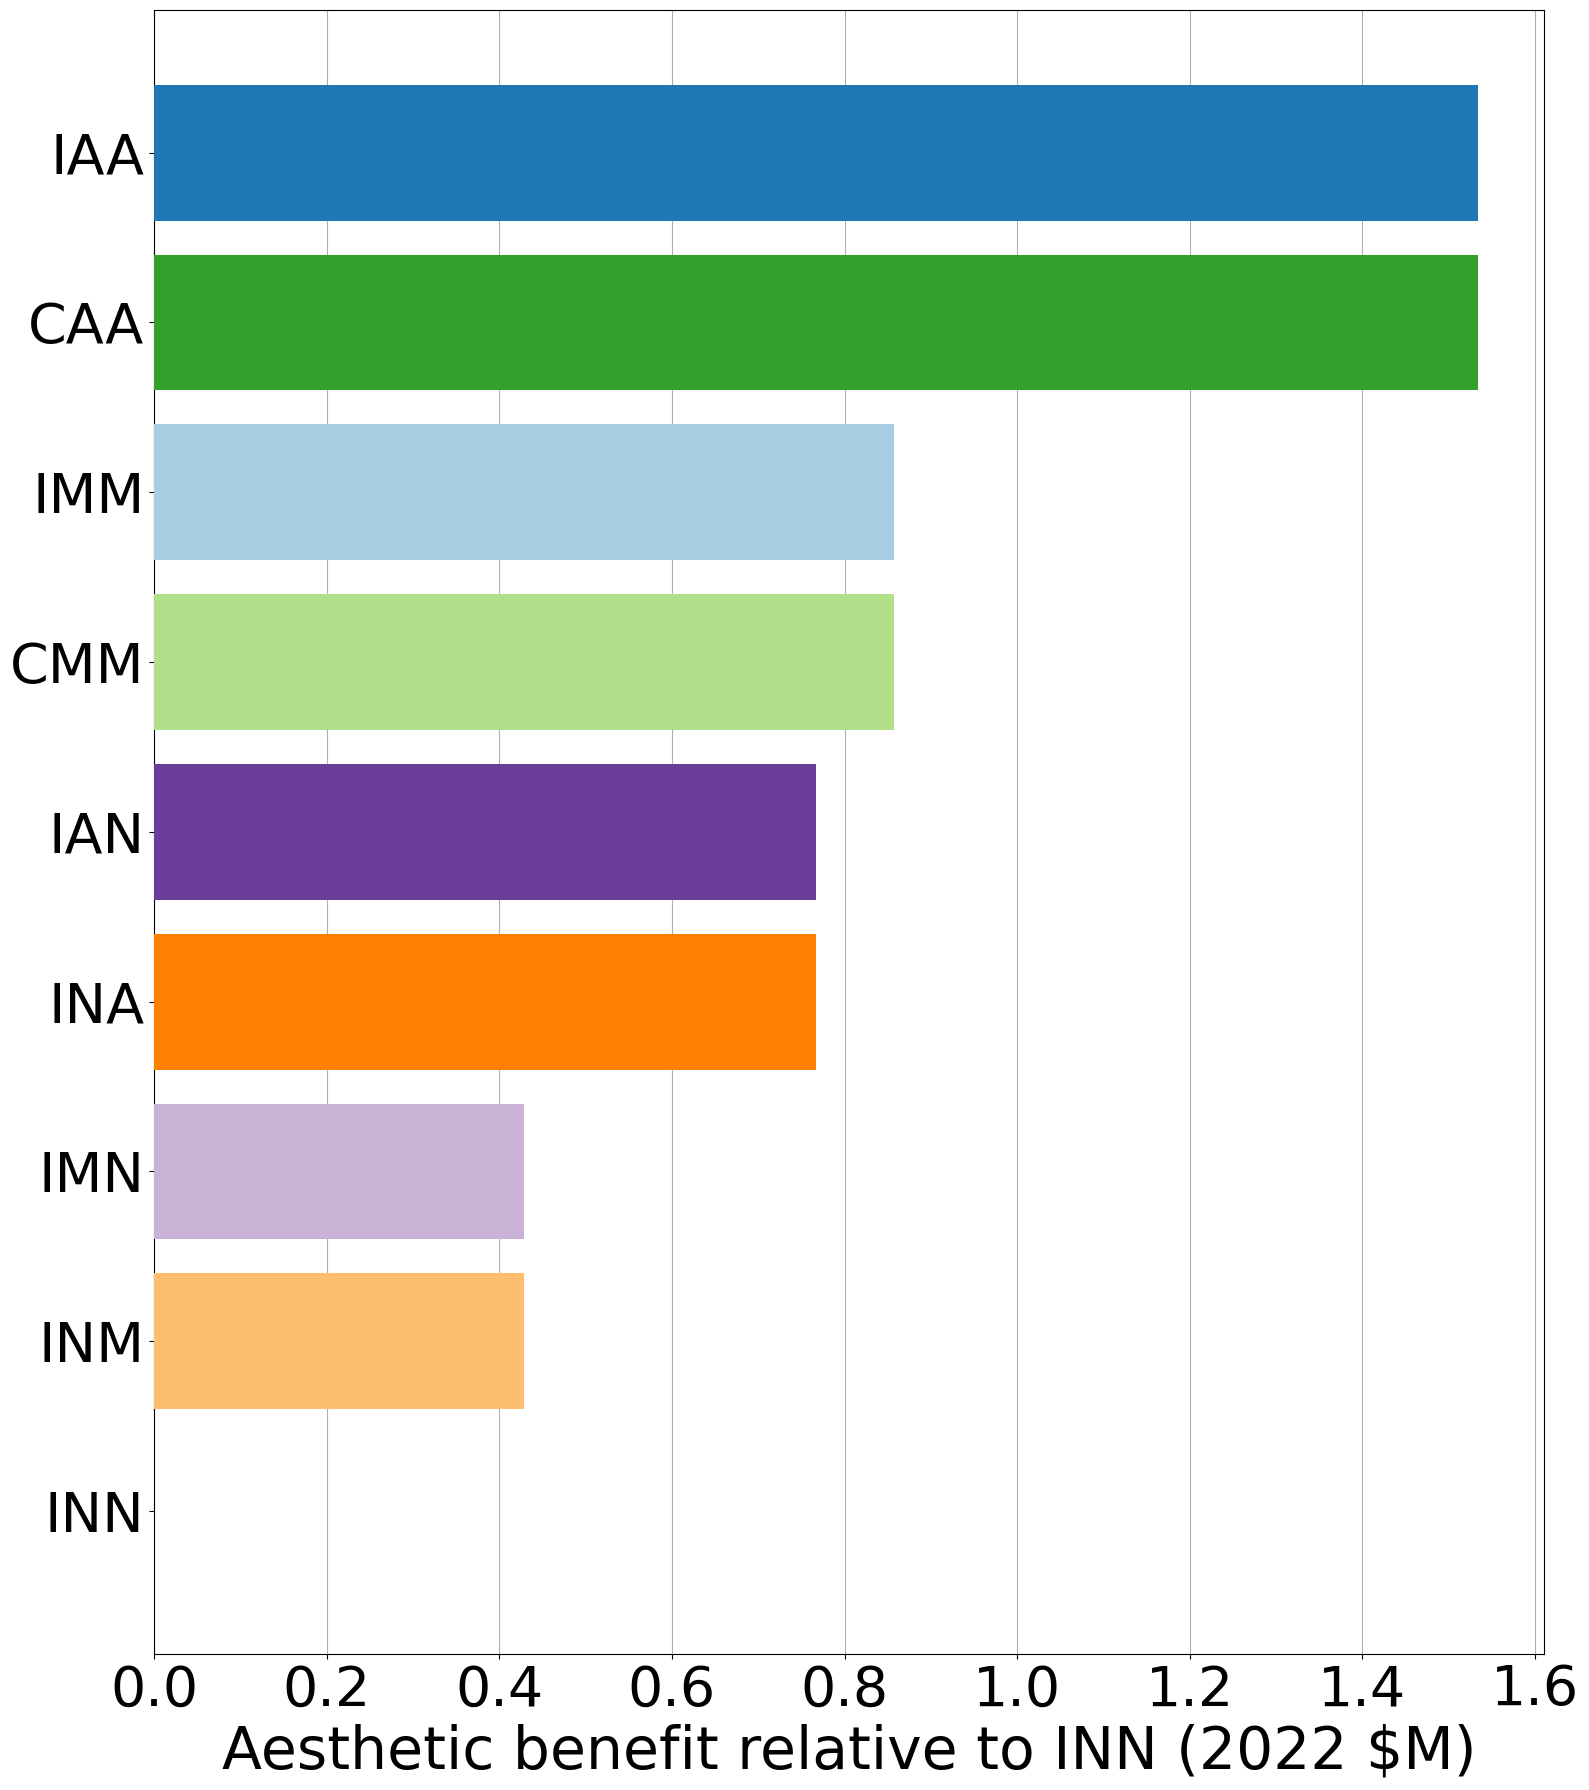

In [326]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Create a dictionary to map labels to colors
label_color_dict = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_benefit['Strategy'] = ['INN', 'INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']
df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = FuncFormatter(lambda x,pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Aesthetic benefit relative to INN (2022 $M)', fontsize=42)


plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=40)
plt.xticks(fontsize=40)

ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [327]:
df_npv_benefit

aesthetic_benefit
Strategy                   
INN            0.000000e+00
INM            4.284824e+05
INA            7.669424e+05
IMN            4.284824e+05
IAN            7.669424e+05
CMM            8.569649e+05
IMM            8.569649e+05
CAA            1.533885e+06
IAA            1.533885e+06

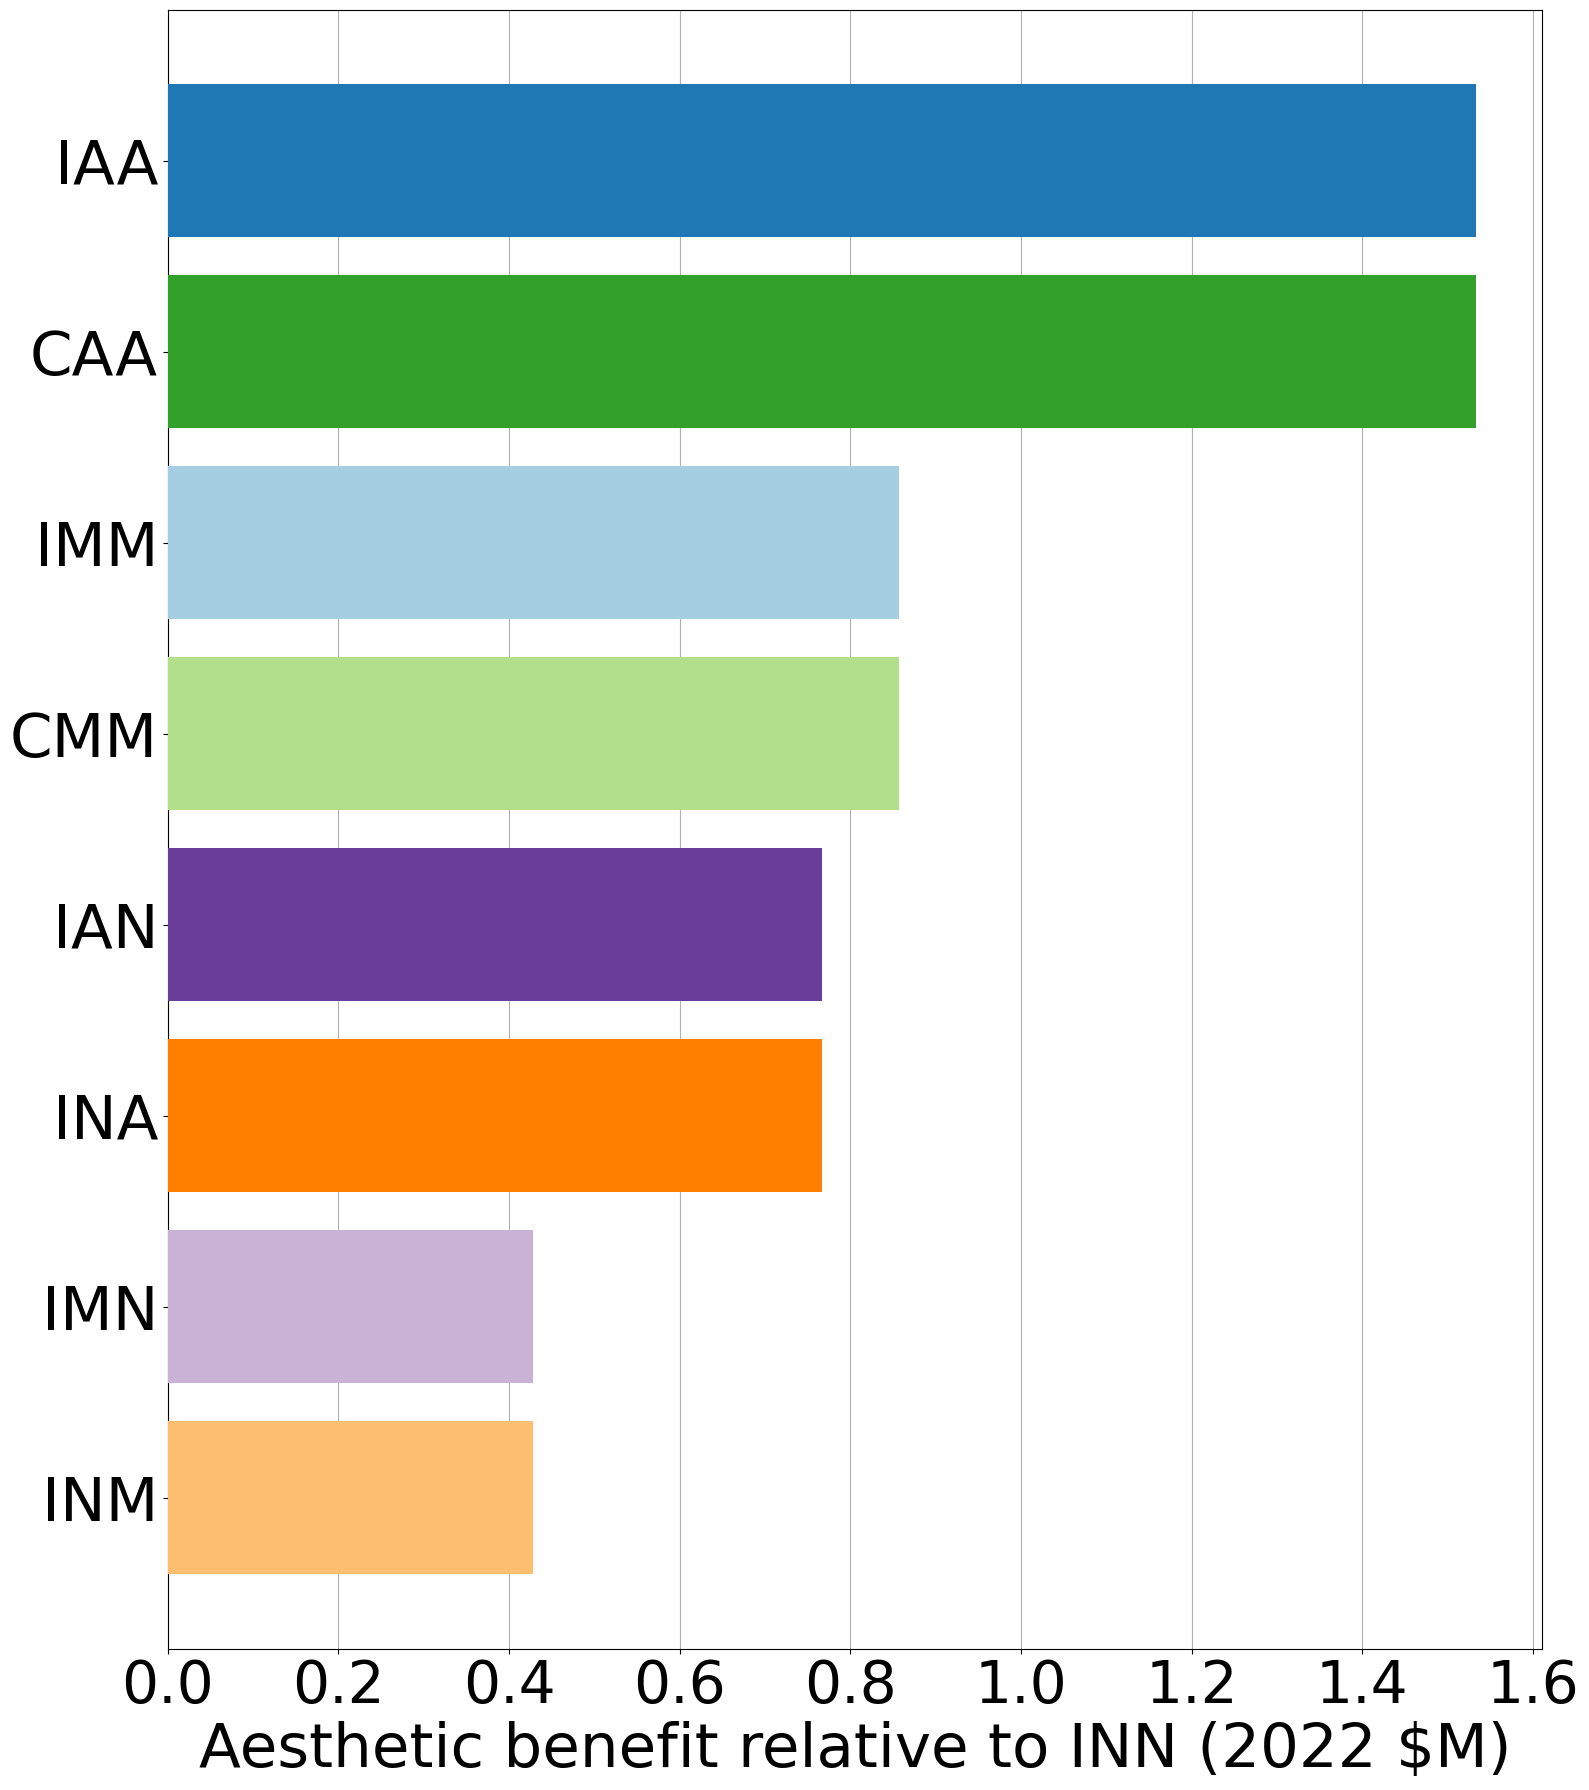

In [328]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Remove the row with index 'INN'
df_npv_benefit = df_npv_benefit.drop(index='INN')

# Create a dictionary to map labels to colors
label_color_dict = {
    'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
#df_npv_benefit['Strategy'] = ['INC', 'INA', 'ICN', 'IAN', 'JCC', 'ICC', 'JAA', 'IAA']
df_npv_benefit['Strategy'] = ['INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']

df_npv_benefit.set_index('Strategy', inplace=True)

# Sort the DataFrame in ascending order by 'aesthetic_benefit'
df_npv_benefit_sorted = df_npv_benefit.sort_values('aesthetic_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_benefit_sorted.iterrows()):
    plt.barh(i, row['aesthetic_benefit'], color=label_color_dict[index], zorder=3)

# Convert the x-axis values to millions without decimals
formatter = FuncFormatter(lambda x,pos: f'{x * 1e-6:.1f}')
ax.xaxis.set_major_formatter(formatter)

plt.xlabel('Aesthetic benefit relative to INN (2022 $M)', fontsize=44)


plt.yticks(range(len(df_npv_benefit_sorted)), labels=df_npv_benefit_sorted.index, fontsize=44)
plt.xticks(fontsize=42)

ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.tight_layout()
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [99]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'INM'),
  Text(1, 0, 'INA'),
  Text(2, 0, 'IMN'),
  Text(3, 0, 'IAN'),
  Text(4, 0, 'CMM'),
  Text(5, 0, 'IMM'),
  Text(6, 0, 'CAA'),
  Text(7, 0, 'IAA')])

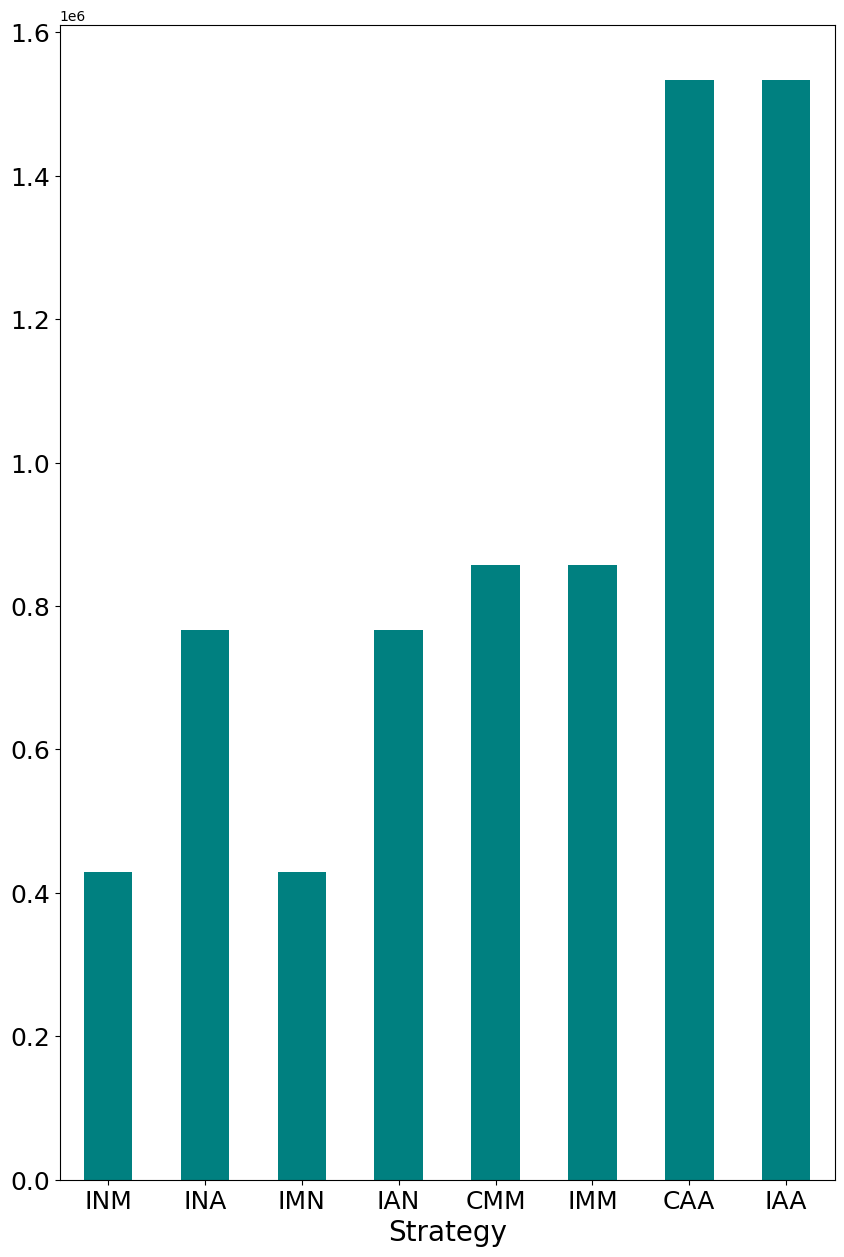

In [100]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated.png', dpi=300)

In [102]:
with open(r'../../results/outcomes/npv_cost_loss_benefit_relative_new.csv') as npv_cost_loss_benefit_relative:
    df_npv_cost_loss_benefit_relative=pd.read_csv(npv_cost_loss_benefit_relative)
df_npv_cost_loss_benefit_relative

Strategy  lifecycle_infrastructure  environmental_restoration       safety  \
0      INN                      0.00                      0.000        0.000   
1      INC               21537267.32                1422186.244   832488.950   
2      INA               31280977.11                2968567.363  1774013.982   
3      ICN               21068116.80                1422186.244   832488.950   
4      IAN               30897813.91                2968567.363  1774013.982   
5      JCC               24307815.98                2844372.488  1664977.900   
6      ICC               42605384.12                2844372.488  1664977.900   
7      JAA               35896399.02                5937134.726  3548027.963   
8      IAA               62178791.02                5937134.726  3548027.963   

    total_cost  aesthetic_benefit  avoided_economic_losses   net_benefit  
0         0.00       0.000000e+00             0.000000e+00  0.000000e+00  
1  23791942.51       4.284824e+05             8.449969e+06 -1.491349e+07  
2  36023558.46       7.669424e+05             1.781414e+07 -1.744247e+07  
3  23322791.99       4.284824e+05             1.770095e+07 -5.193360e+06  
4  35640395.26       7.669424e+05             3.731697e+07  2.443513e+06  
5  28817166.37       8.569649e+05             2.615092e+07 -1.809283e+06  
6  47114734.51       8.569649e+05             2.615092e+07 -2.010685e+07  
7  45381561.71       1.533885e+06             5.513111e+07  1.128343e+07  
8  71663953.71       1.533885e+06             5.513111e+07 -1.499896e+07

In [104]:
# Renaming map
rename_map = {
    'INN': 'INN',
    'INC': 'INM',
    'INA': 'INA',
    'ICN': 'IMN',
    'IAN': 'IAN',
    'JCC': 'CMM',
    'ICC': 'IMM',
    'JAA': 'CAA',
    'IAA': 'IAA'
}

df_npv_cost_loss_benefit_relative['Strategy'] = df_npv_cost_loss_benefit_relative['Strategy'].replace(rename_map)

In [105]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.set_index('Strategy')

In [106]:
df_npv_net_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure', 'environmental_restoration','safety','total_cost','aesthetic_benefit','avoided_economic_losses'], axis=1)

In [107]:
df_npv_net_benefit_relative

net_benefit
Strategy              
INN       0.000000e+00
INM      -1.491349e+07
INA      -1.744247e+07
IMN      -5.193360e+06
IAN       2.443513e+06
CMM      -1.809283e+06
IMM      -2.010685e+07
CAA       1.128343e+07
IAA      -1.499896e+07

In [108]:
df_npv_net_benefit_relative=df_npv_net_benefit_relative.reset_index()

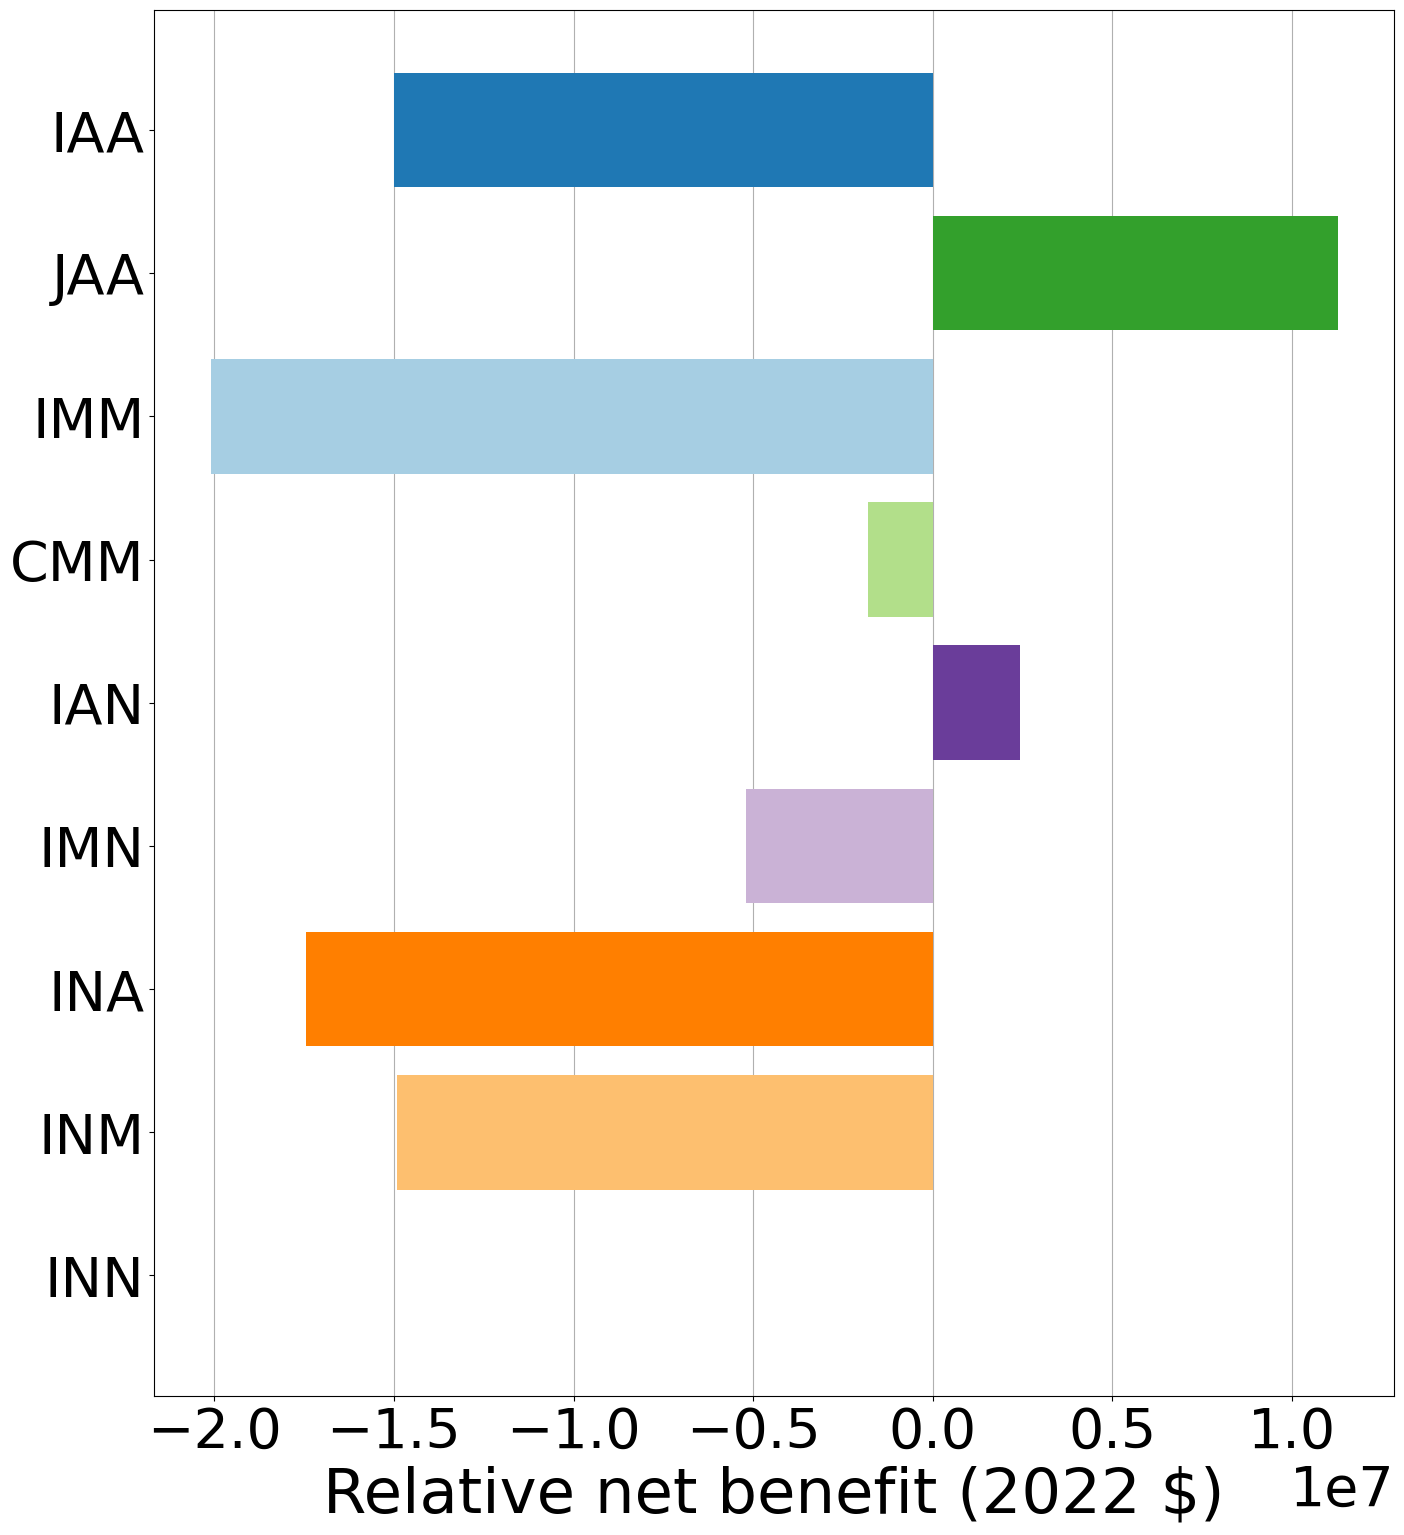

In [109]:
# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16,18))
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_net_benefit_relative.loc[i,"net_benefit"],color=row, zorder=3)
plt.xlabel ('Relative net benefit (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_net_benefit_relative.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','JAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

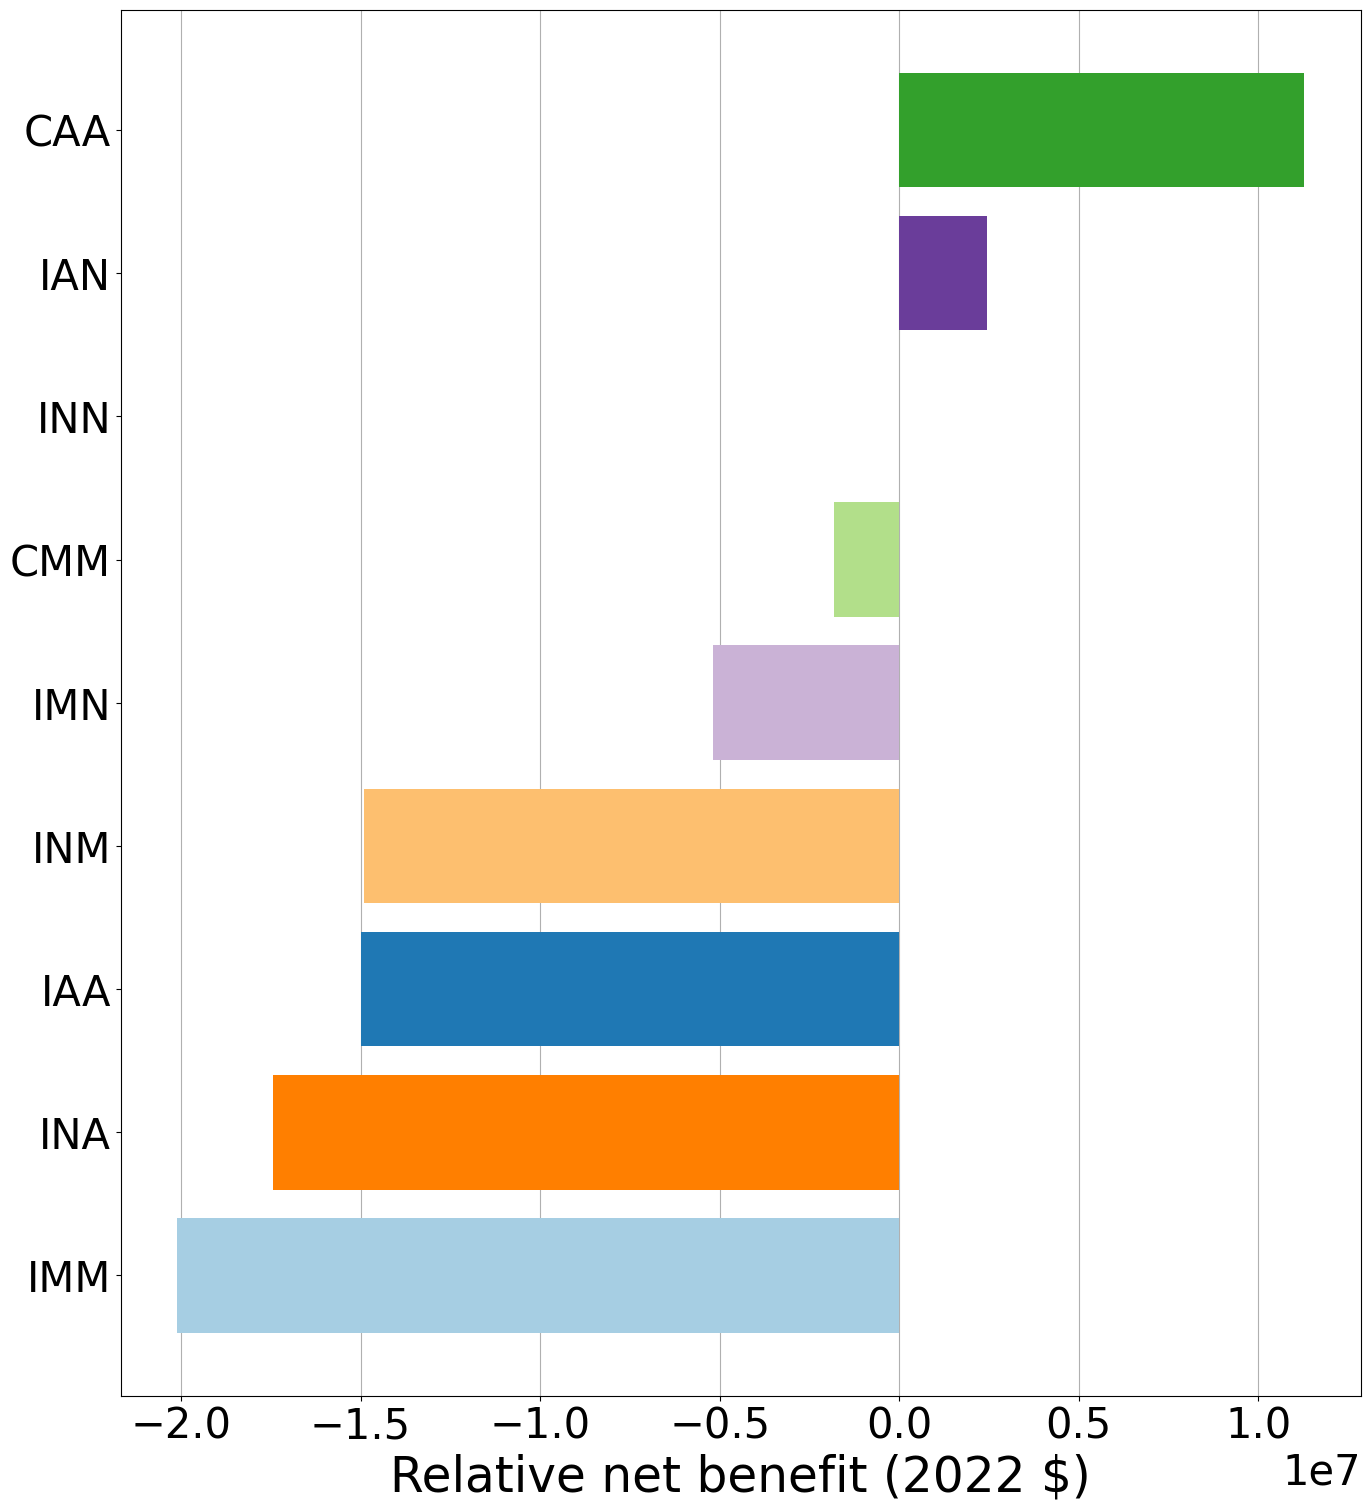

In [110]:
# Create a dictionary to map labels to colors
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Ensure the index of the DataFrame is set correctly to strategy names
df_npv_net_benefit_relative['Strategy'] = ['INN', 'INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']
df_npv_net_benefit_relative.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18))

for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

plt.xlabel('Relative net benefit (2022 $)', fontsize=35)
#plt.ylabel('Strategies', fontsize=45)  # Add a label for clarity
plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=30)
plt.xticks(fontsize=30)

ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [163]:
# Create a dictionary to map labels to colors
#strategy_colors = {
#    'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
#    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
#}

# Ensure the index of the DataFrame is set correctly to strategy names
#df_npv_net_benefit_relative['Strategy'] = ['INN','INM', 'INA', 'IMN', 'IAN', 'CMM', 'IMM', 'CAA', 'IAA']

#df_npv_net_benefit_relative = df_npv_net_benefit_relative.loc[df_npv_net_benefit_relative['Strategy']!='INN']

#df_npv_net_benefit_relative.set_index('Strategy', inplace=True)

# Sort the DataFrame in descending order by 'net_benefit'
#df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
#fig, ax = plt.subplots(figsize=(16, 18))

#for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
#    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

# Convert the x-axis values to millions
#formatter = plt.FuncFormatter(lambda x, pos: f'{x * 1e-6:.1f}')
#ax.xaxis.set_major_formatter(formatter)

#plt.xlabel('Net benefit relative to INN (2022 $M)', fontsize=42)
#plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=40)
#plt.xticks(fontsize=38)

#ax.xaxis.offsetText.set_fontsize(30)
#ax.yaxis.offsetText.set_fontsize(30)
#plt.grid(axis='x')
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
#plt.show()


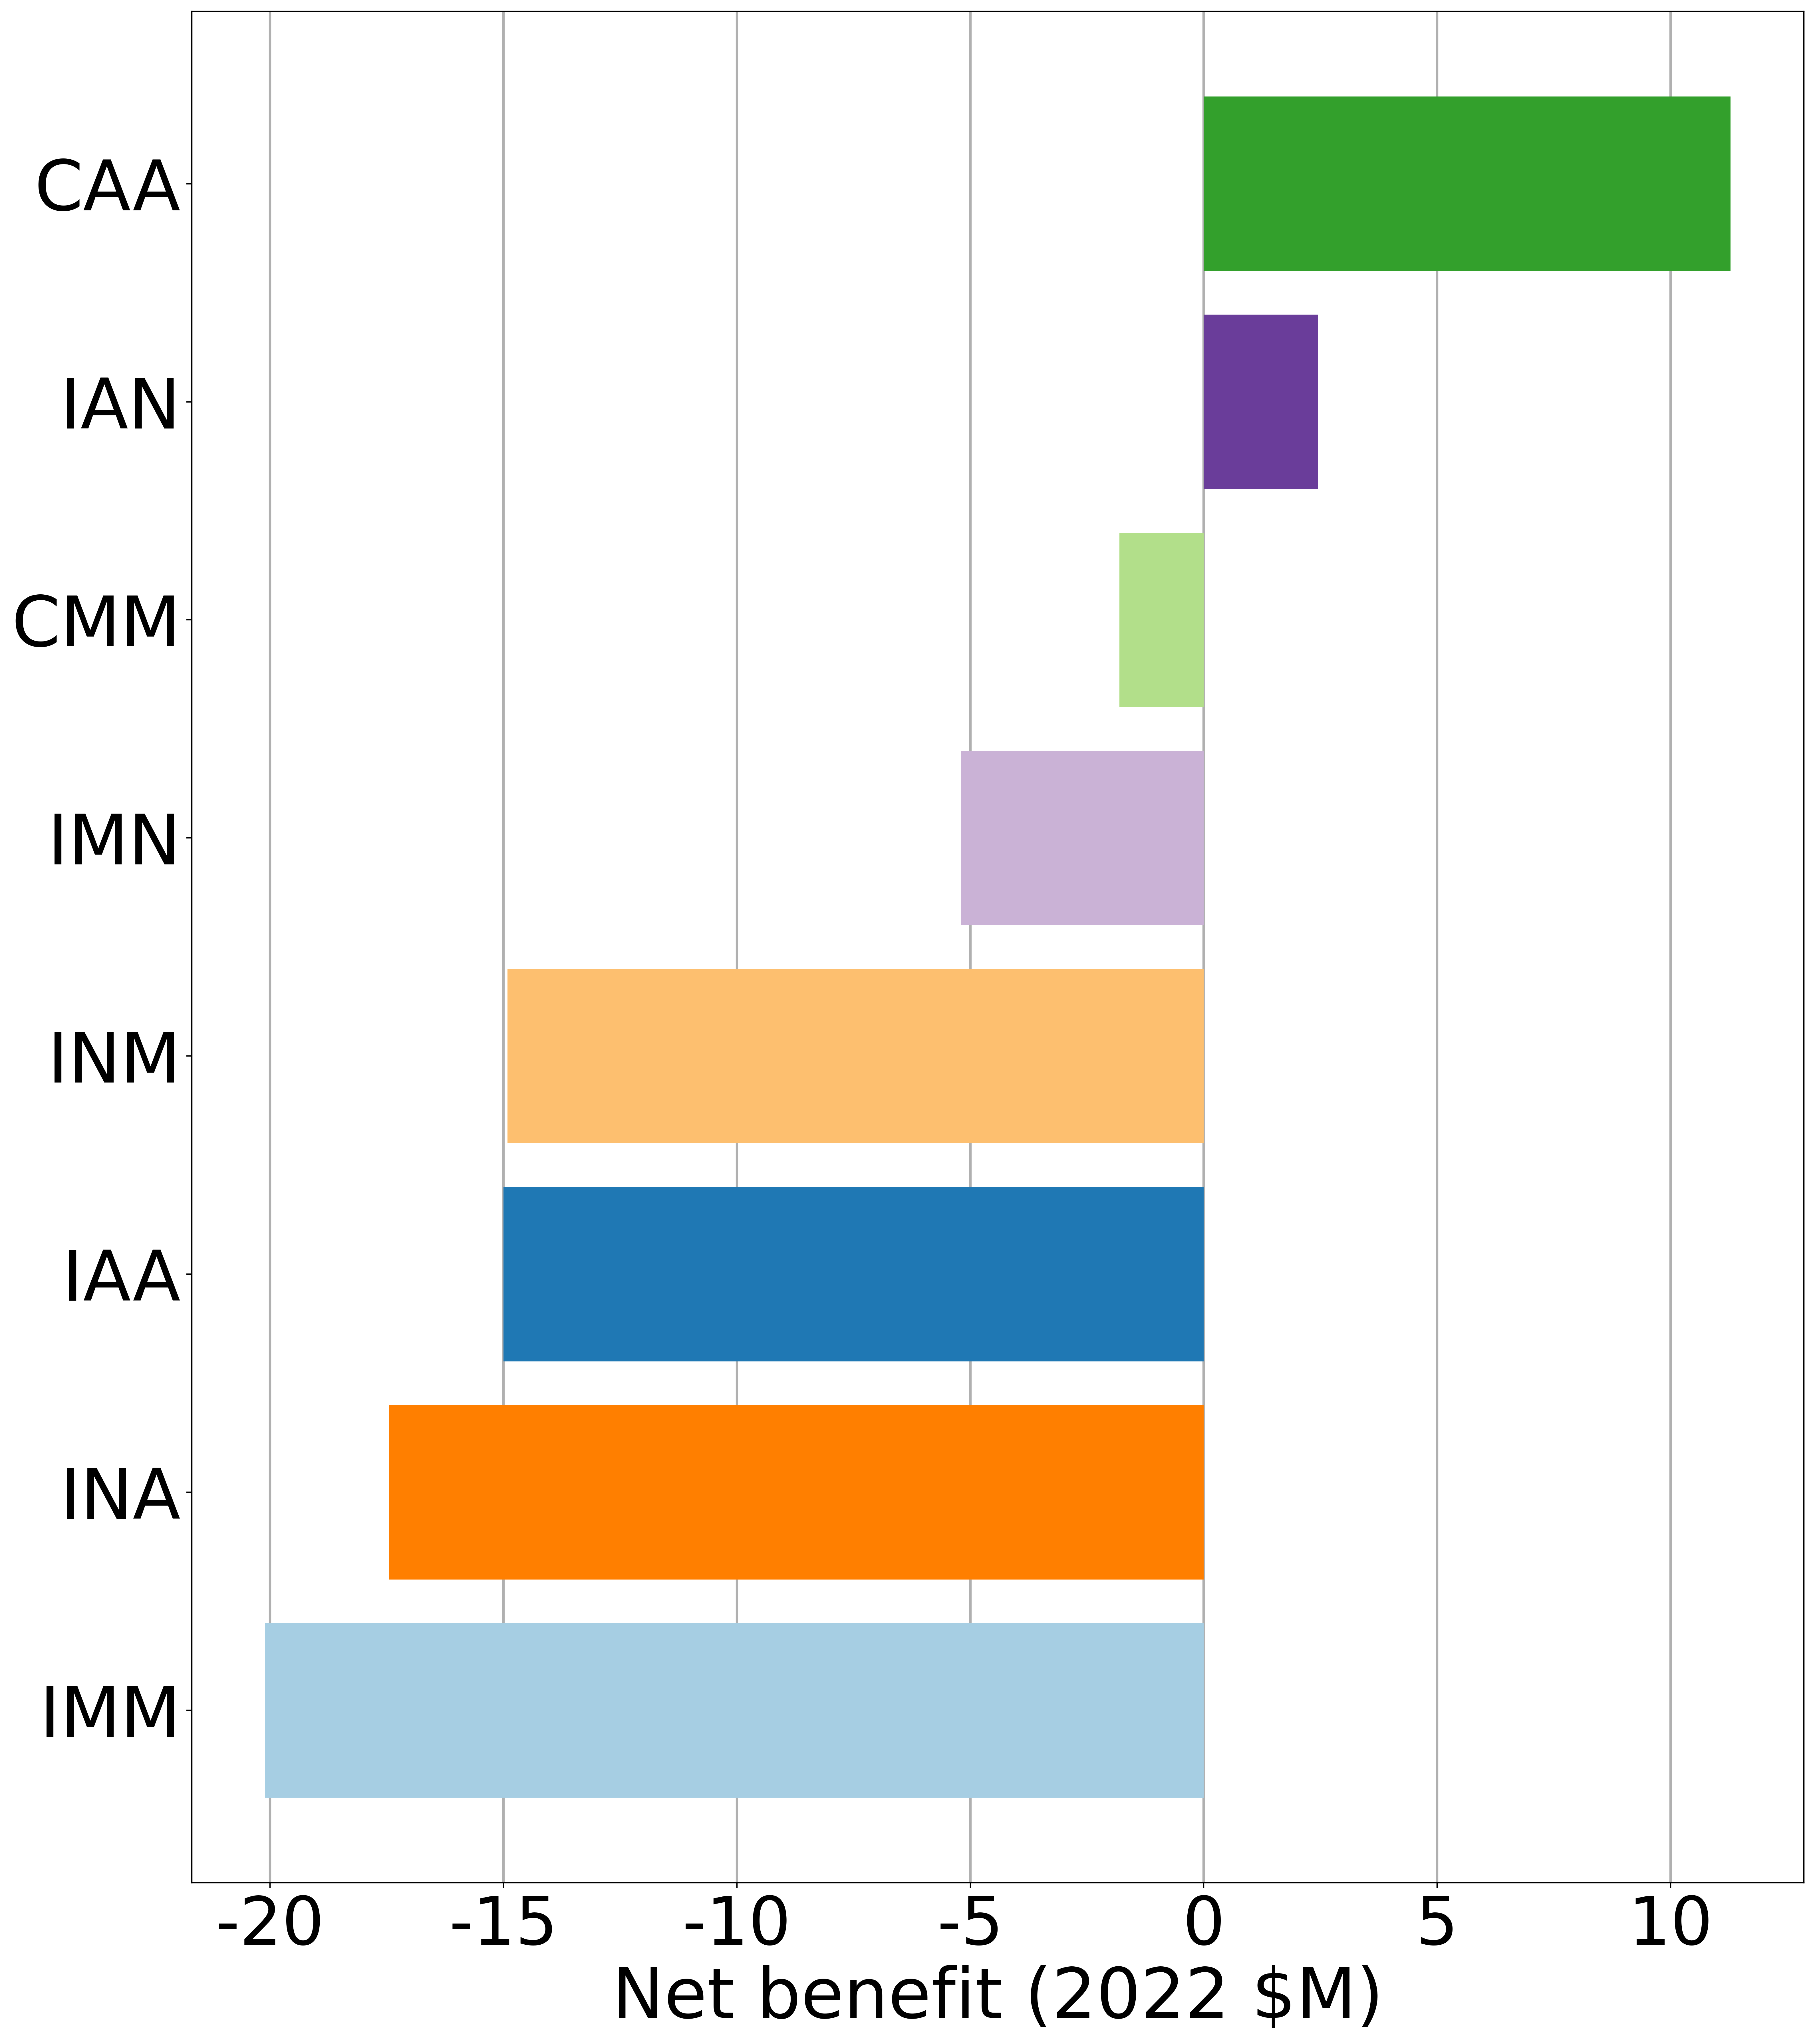

In [330]:
# Define your strategy colors mapping
strategy_colors = {
    'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Sort the DataFrame in descending order by 'net_benefit'
df_npv_net_benefit_relative_sorted = df_npv_net_benefit_relative.sort_values('net_benefit', ascending=True)

# Using plt to provide horizontal bar plots for net present values using color codes
fig, ax = plt.subplots(figsize=(16, 18), dpi=400)

# Plot horizontal bars without edge colors
for i, (index, row) in enumerate(df_npv_net_benefit_relative_sorted.iterrows()):
    plt.barh(i, row['net_benefit'], color=strategy_colors[index], zorder=3)

# Convert the x-axis values to millions using the same formatter as the second plot
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

# Set font sizes to match the second plot
#plt.xlabel('Net benefit relative to INN (2022 $M)', fontsize=42)
plt.xlabel('Net benefit (2022 $M)', fontsize=44)

plt.xticks(fontsize=42)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.yticks(range(len(df_npv_net_benefit_relative_sorted)), labels=df_npv_net_benefit_relative_sorted.index, fontsize=44)
plt.grid(axis='x', alpha=1, linewidth=1.5)

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [112]:
# plotting graph (Ver 02)
#ax = df_npv_net_benefit_relative.T.plot(ylabel='Relative net benefit (2022 $)',label='index', kind="bar", color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#plt.savefig(r'../../figures/npv-cost-loss-benefit-relative.png', dpi=300)
#plt.show()

<Axes: xlabel='Strategy', ylabel='Relative net benefit ($)'>

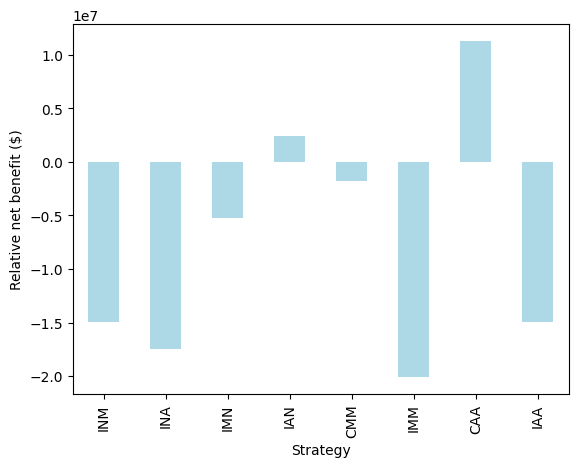

In [113]:
# plotting graph
df_npv_net_benefit_relative.plot(ylabel='Relative net benefit ($)', kind="bar", color="lightblue", legend=False)
#plt.savefig(r'../../figures/relative-npv.png', dpi=300, bbox_inches='tight')

In [114]:
df_npv_cost_loss_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['net_benefit', 'total_cost'], axis=1)

In [115]:
df_npv_cost_loss_benefit_relative

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                           0.00                      0.000        0.000   
INM                    21537267.32                1422186.244   832488.950   
INA                    31280977.11                2968567.363  1774013.982   
IMN                    21068116.80                1422186.244   832488.950   
IAN                    30897813.91                2968567.363  1774013.982   
CMM                    24307815.98                2844372.488  1664977.900   
IMM                    42605384.12                2844372.488  1664977.900   
CAA                    35896399.02                5937134.726  3548027.963   
IAA                    62178791.02                5937134.726  3548027.963   

          aesthetic_benefit  avoided_economic_losses  
Strategy                                              
INN            0.000000e+00             0.000000e+00  
INM            4.284824e+05             8.449969e+06  
INA            7.669424e+05             1.781414e+07  
IMN            4.284824e+05             1.770095e+07  
IAN            7.669424e+05             3.731697e+07  
CMM            8.569649e+05             2.615092e+07  
IMM            8.569649e+05             2.615092e+07  
CAA            1.533885e+06             5.513111e+07  
IAA            1.533885e+06             5.513111e+07

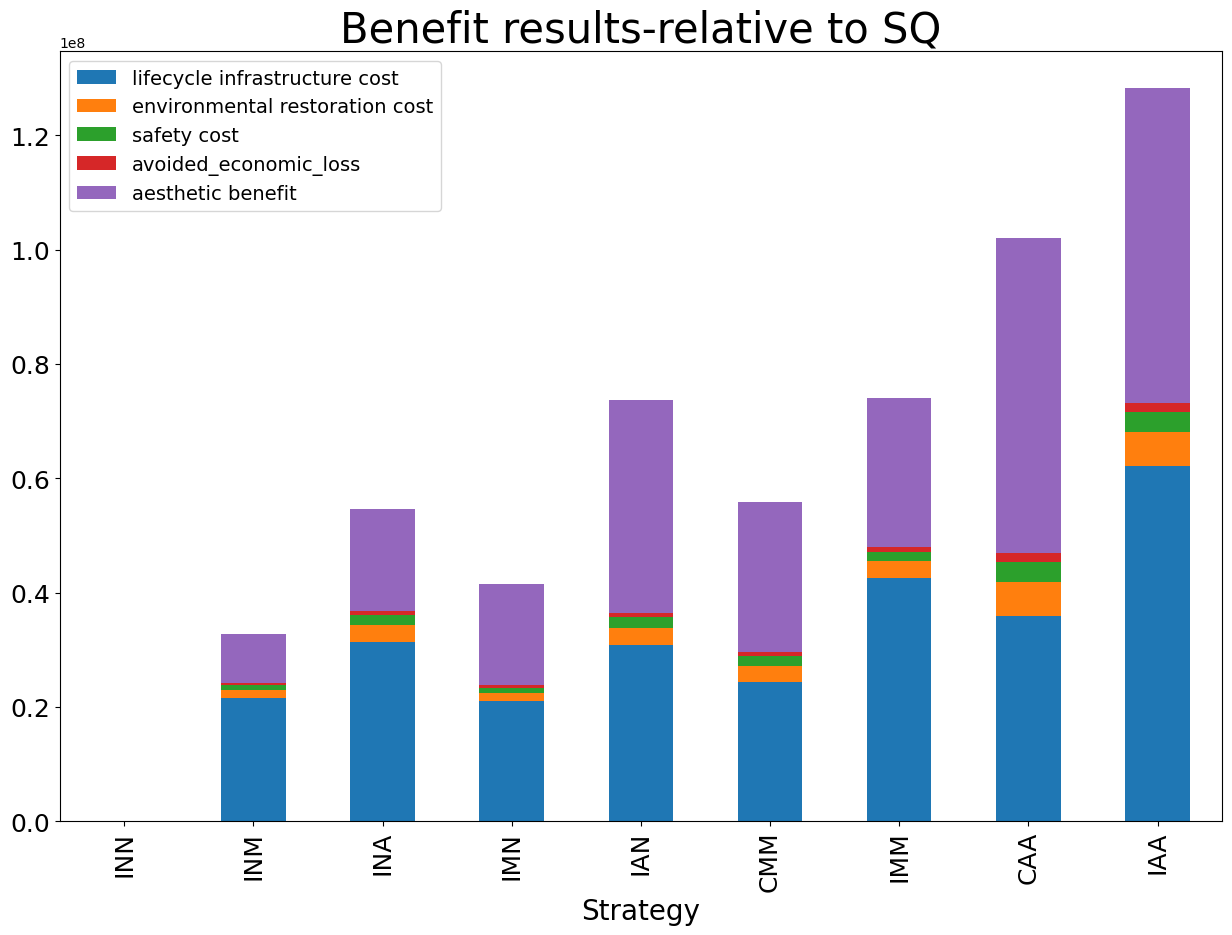

In [116]:
# plotting cost-loss-benefit results integerated for broadband and electric
df_npv_cost_loss_benefit_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(15, 10)
#plt.ylim([-12500000, 1250000000])
plt.grid()
plt.title("Benefit results-relative to SQ", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['lifecycle infrastructure cost','environmental restoration cost','safety cost','avoided_economic_loss','aesthetic benefit'], fontsize=14)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.savefig(r'../../figures/npv-cost-loss-benefit-integrated-relative.png', dpi=300)

In [117]:
df_npv_cost_relative=df_npv_cost_loss_benefit_relative.drop(['avoided_economic_losses', 'aesthetic_benefit'], axis=1)

In [118]:
df_npv_cost_relative

lifecycle_infrastructure  environmental_restoration       safety
Strategy                                                                  
INN                           0.00                      0.000        0.000
INM                    21537267.32                1422186.244   832488.950
INA                    31280977.11                2968567.363  1774013.982
IMN                    21068116.80                1422186.244   832488.950
IAN                    30897813.91                2968567.363  1774013.982
CMM                    24307815.98                2844372.488  1664977.900
IMM                    42605384.12                2844372.488  1664977.900
CAA                    35896399.02                5937134.726  3548027.963
IAA                    62178791.02                5937134.726  3548027.963

In [119]:
df_npv_cost_relative=df_npv_cost_relative.reset_index()

In [120]:
#fig,(ax) = plt.subplots()
#fig.set_size_inches(16, 18)

#x= df_npv_cost_relative.index
#issues_addressed = [10, 14, 0, 10, 15, 15]
#issues_pending = [5, 10, 50, 2, 0, 10]
#y1 = df_npv_cost_relative['lifecycle_infrastructure']
#y2 = df_npv_cost_relative['environmental_restoration']
#y3 = df_npv_cost_relative['safety']

#mpl.rcParams['hatch.linewidth'] = 3.0 


#b1 = plt.barh(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black',hatch='/', zorder=3)

#b2 = plt.barh(x, y2, left=y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='-', zorder=3)

#b3 = plt.barh(x, y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],edgecolor='black', hatch='x', zorder=3)

#plt.yticks(df_npv_cost.index, labels=['INN','INC','INA','ICN','IAN','JCC','ICC','JAA','IAA'])

#a_val = 0.3

#circ1 = mpatches.Patch( alpha=a_val,hatch=r'/',label='Lifecycle infrastructure')
#circ2= mpatches.Patch( alpha=a_val,hatch='-',label='Environmental restoration')
#circ3 = mpatches.Patch(alpha=a_val,hatch='x',label='Safety')

#ax.legend(handles = [circ1,circ2,circ3],loc=4,fontsize=50)
#plt.tight_layout()
#plt.xlabel("Relative Cost (2022 $)", fontsize=55)

#plt.xticks(fontsize=50)
#plt.yticks(fontsize=50)
#ax.xaxis.offsetText.set_fontsize(50)
#ax.yaxis.offsetText.set_fontsize(50)
#plt.grid(axis='x')
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')


#plt.legend([b1, b2], ["Completed", "Pending"], title="Issues", loc="upper right")

#plt.show()

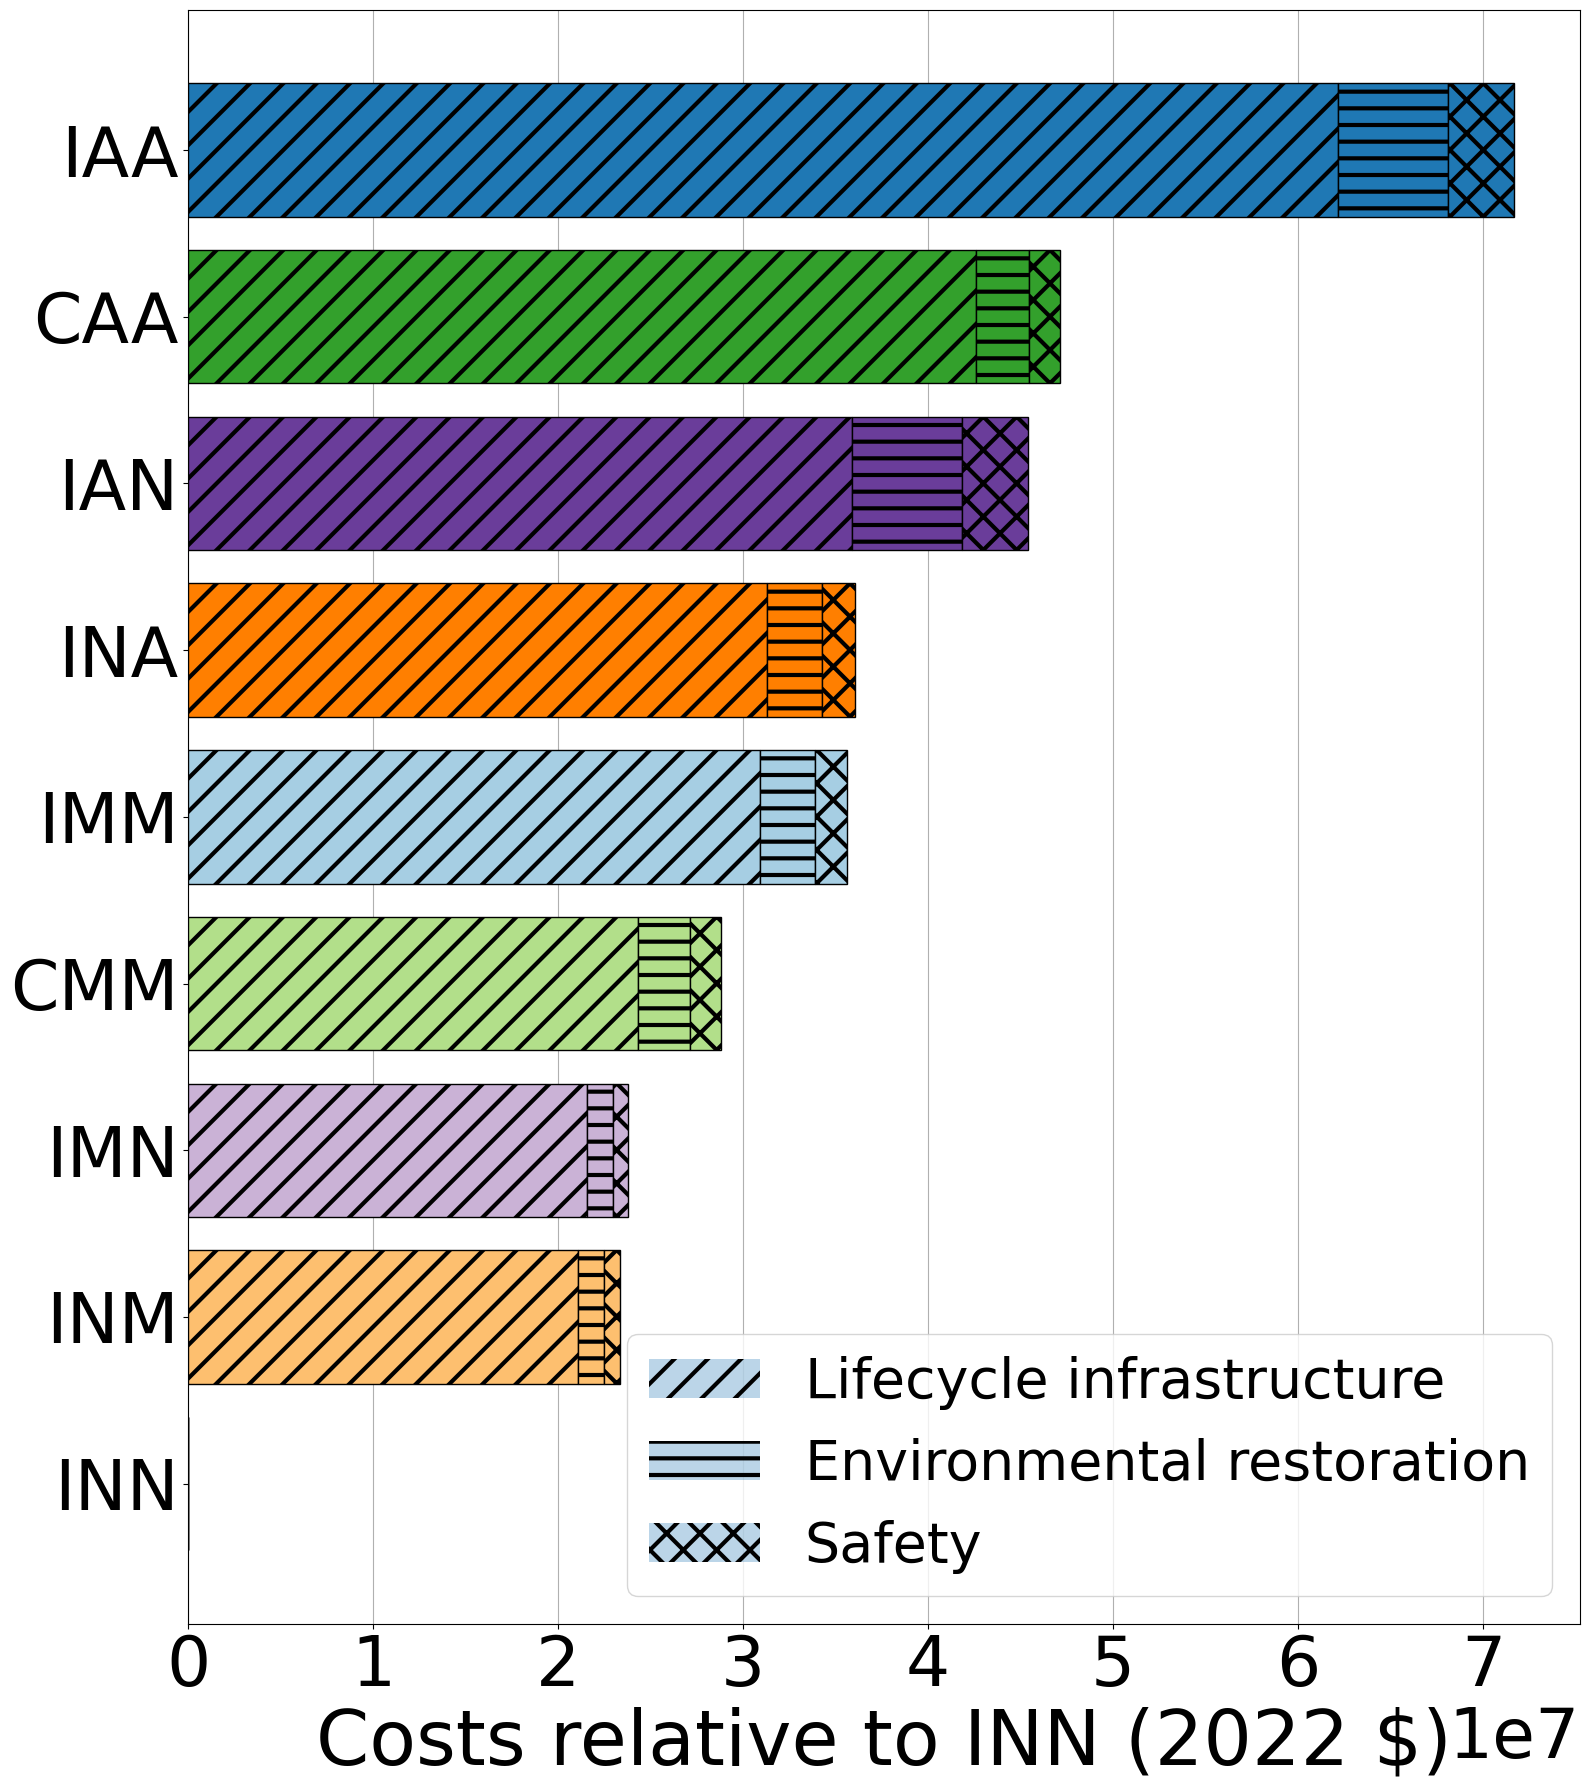

In [121]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming df_npv_cost_relative is already defined and loaded with data
# Calculate the total for each strategy
total_cost = df_npv_cost_relative['lifecycle_infrastructure'] + df_npv_cost_relative['environmental_restoration'] + df_npv_cost_relative['safety']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost_relative.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost_relative.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost_relative.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

#['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']
#['#FB9A99','#FDBF6F','#6A3D9A','#FF7F00','#A6CEE3','#B2DF8A','#CAB2D6','#33A02C','#1F78B4']

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1,             color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1,    color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F','#CAB2D6','#B2DF8A','#A6CEE3','#FF7F00','#6A3D9A','#33A02C','#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost_relative.index[i] for i in sorted_indices_reversed], fontsize=50)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost_relative.index, labels=['INN','INM','IMN','CMM','IMM','INA','IAN','CAA','IAA'])


# Set labels and grid
plt.xlabel("Costs relative to INN (2022 $)", fontsize=55)
plt.xticks(fontsize=50)
ax.xaxis.offsetText.set_fontsize(50)
ax.yaxis.offsetText.set_fontsize(50)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


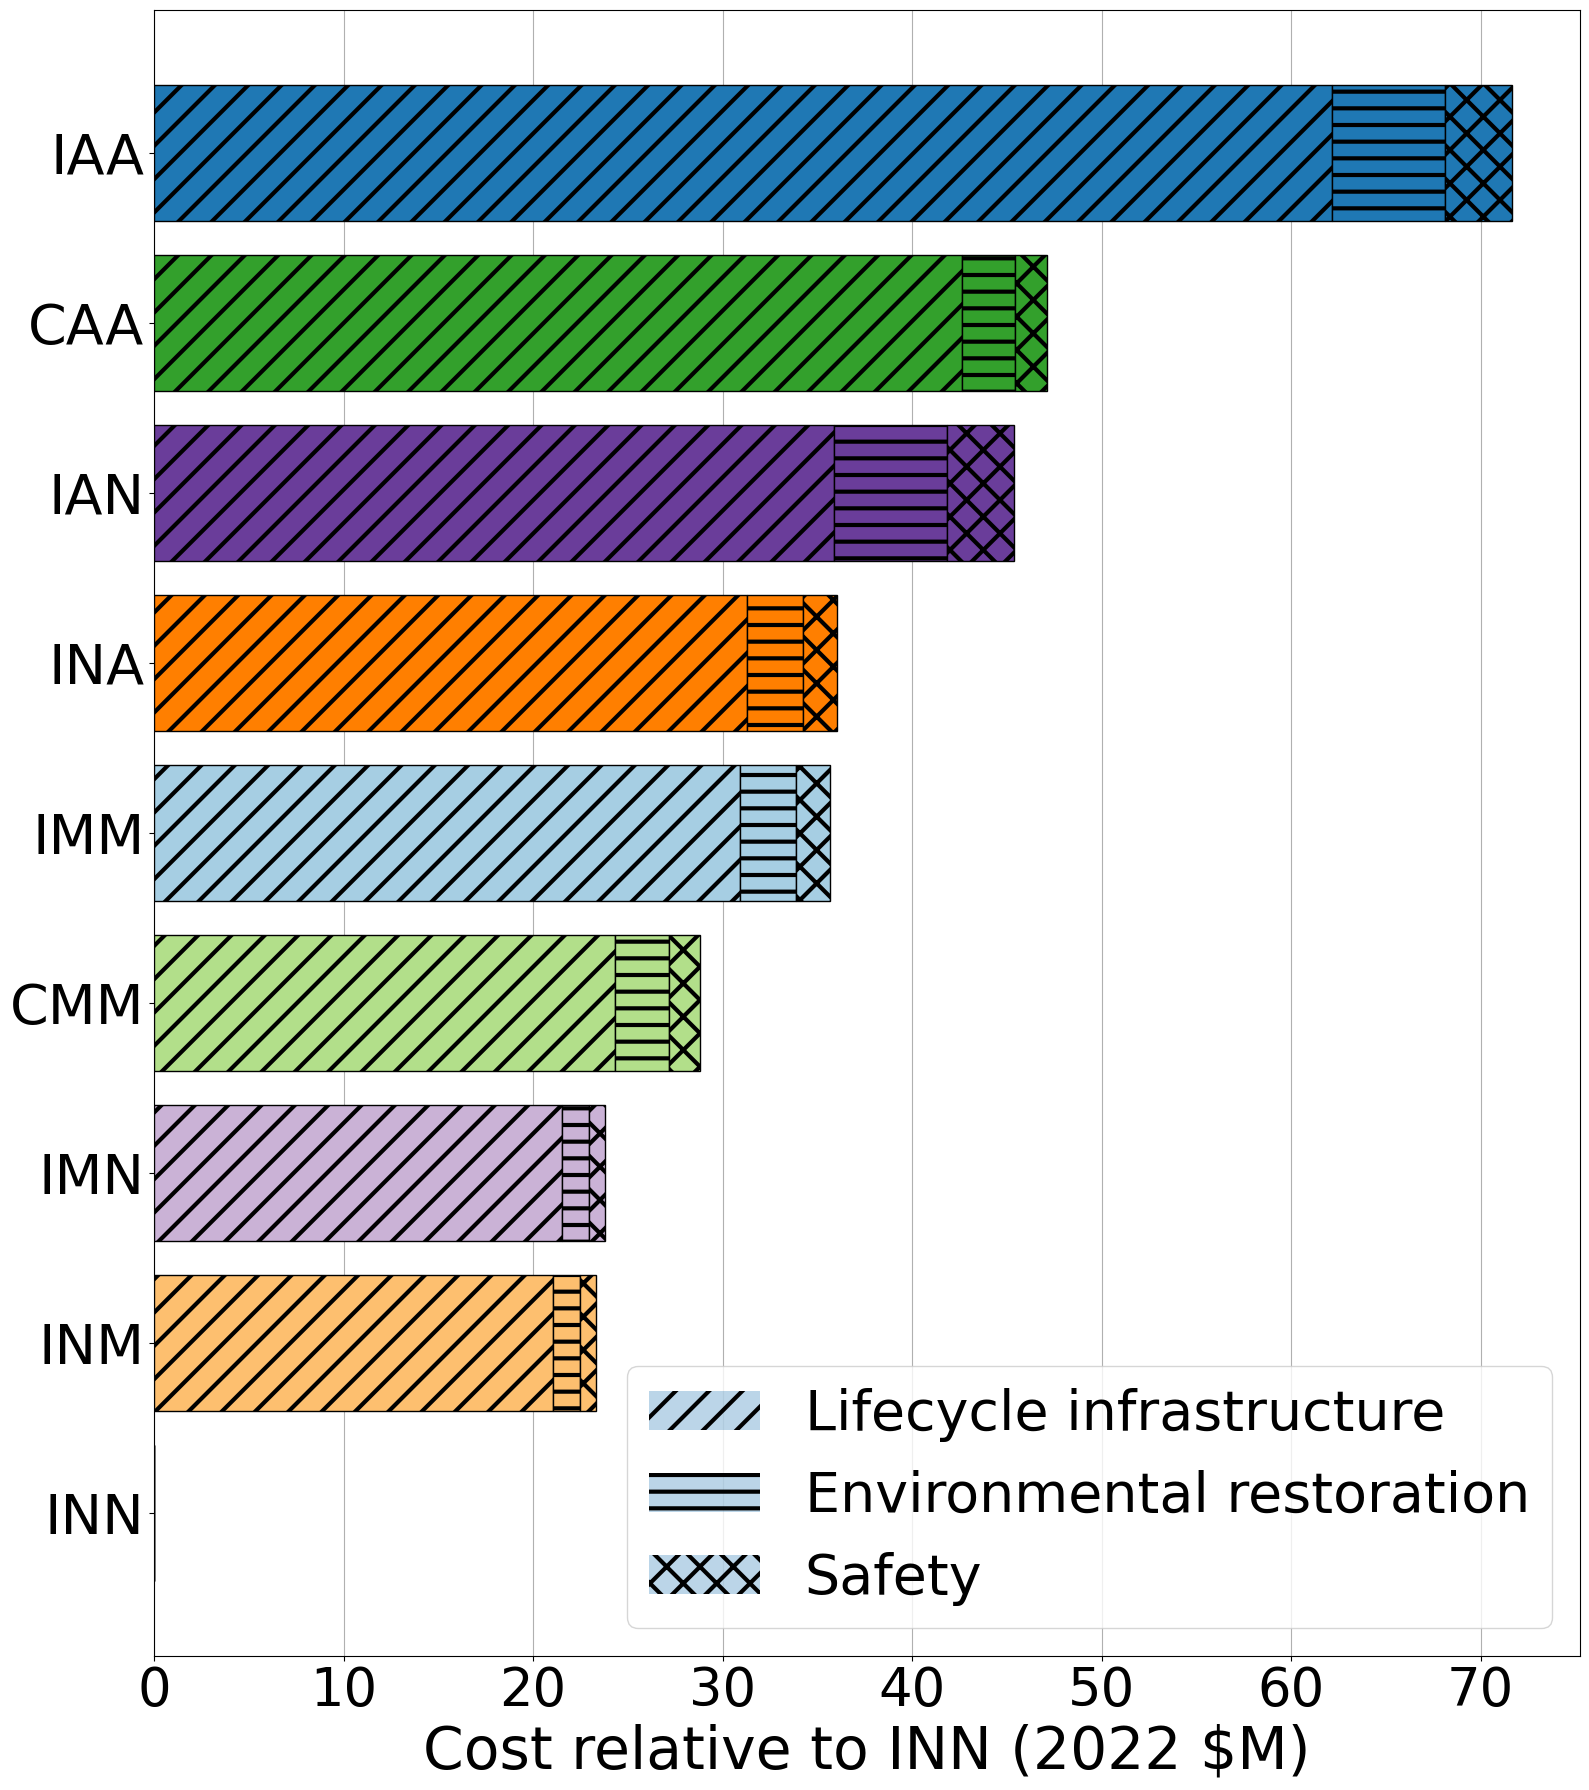

In [122]:
# Calculate the total for each strategy
total_cost = df_npv_cost_relative['lifecycle_infrastructure'] + df_npv_cost_relative['environmental_restoration'] + df_npv_cost_relative['safety']
#df_npv_cost_relative = df_npv_cost_relative.loc[df_npv_cost_relative['Strategy']!='INN']

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost_relative.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost_relative.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost_relative.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18))

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FB9A99','#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FB9A99','#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FB9A99','#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost_relative.index[i] for i in sorted_indices_reversed], fontsize=40)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost_relative.index, labels=['INN', 'INM', 'IMN', 'CMM', 'IMM', 'INA', 'IAN', 'CAA', 'IAA'])


# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

# Set labels and grid
plt.xlabel('Cost relative to INN (2022 $M)', fontsize=42)

plt.xticks(fontsize=38)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [123]:
df_npv_cost_relative
#total_cost

Strategy  lifecycle_infrastructure  environmental_restoration       safety
0      INN                      0.00                      0.000        0.000
1      INM               21537267.32                1422186.244   832488.950
2      INA               31280977.11                2968567.363  1774013.982
3      IMN               21068116.80                1422186.244   832488.950
4      IAN               30897813.91                2968567.363  1774013.982
5      CMM               24307815.98                2844372.488  1664977.900
6      IMM               42605384.12                2844372.488  1664977.900
7      CAA               35896399.02                5937134.726  3548027.963
8      IAA               62178791.02                5937134.726  3548027.963

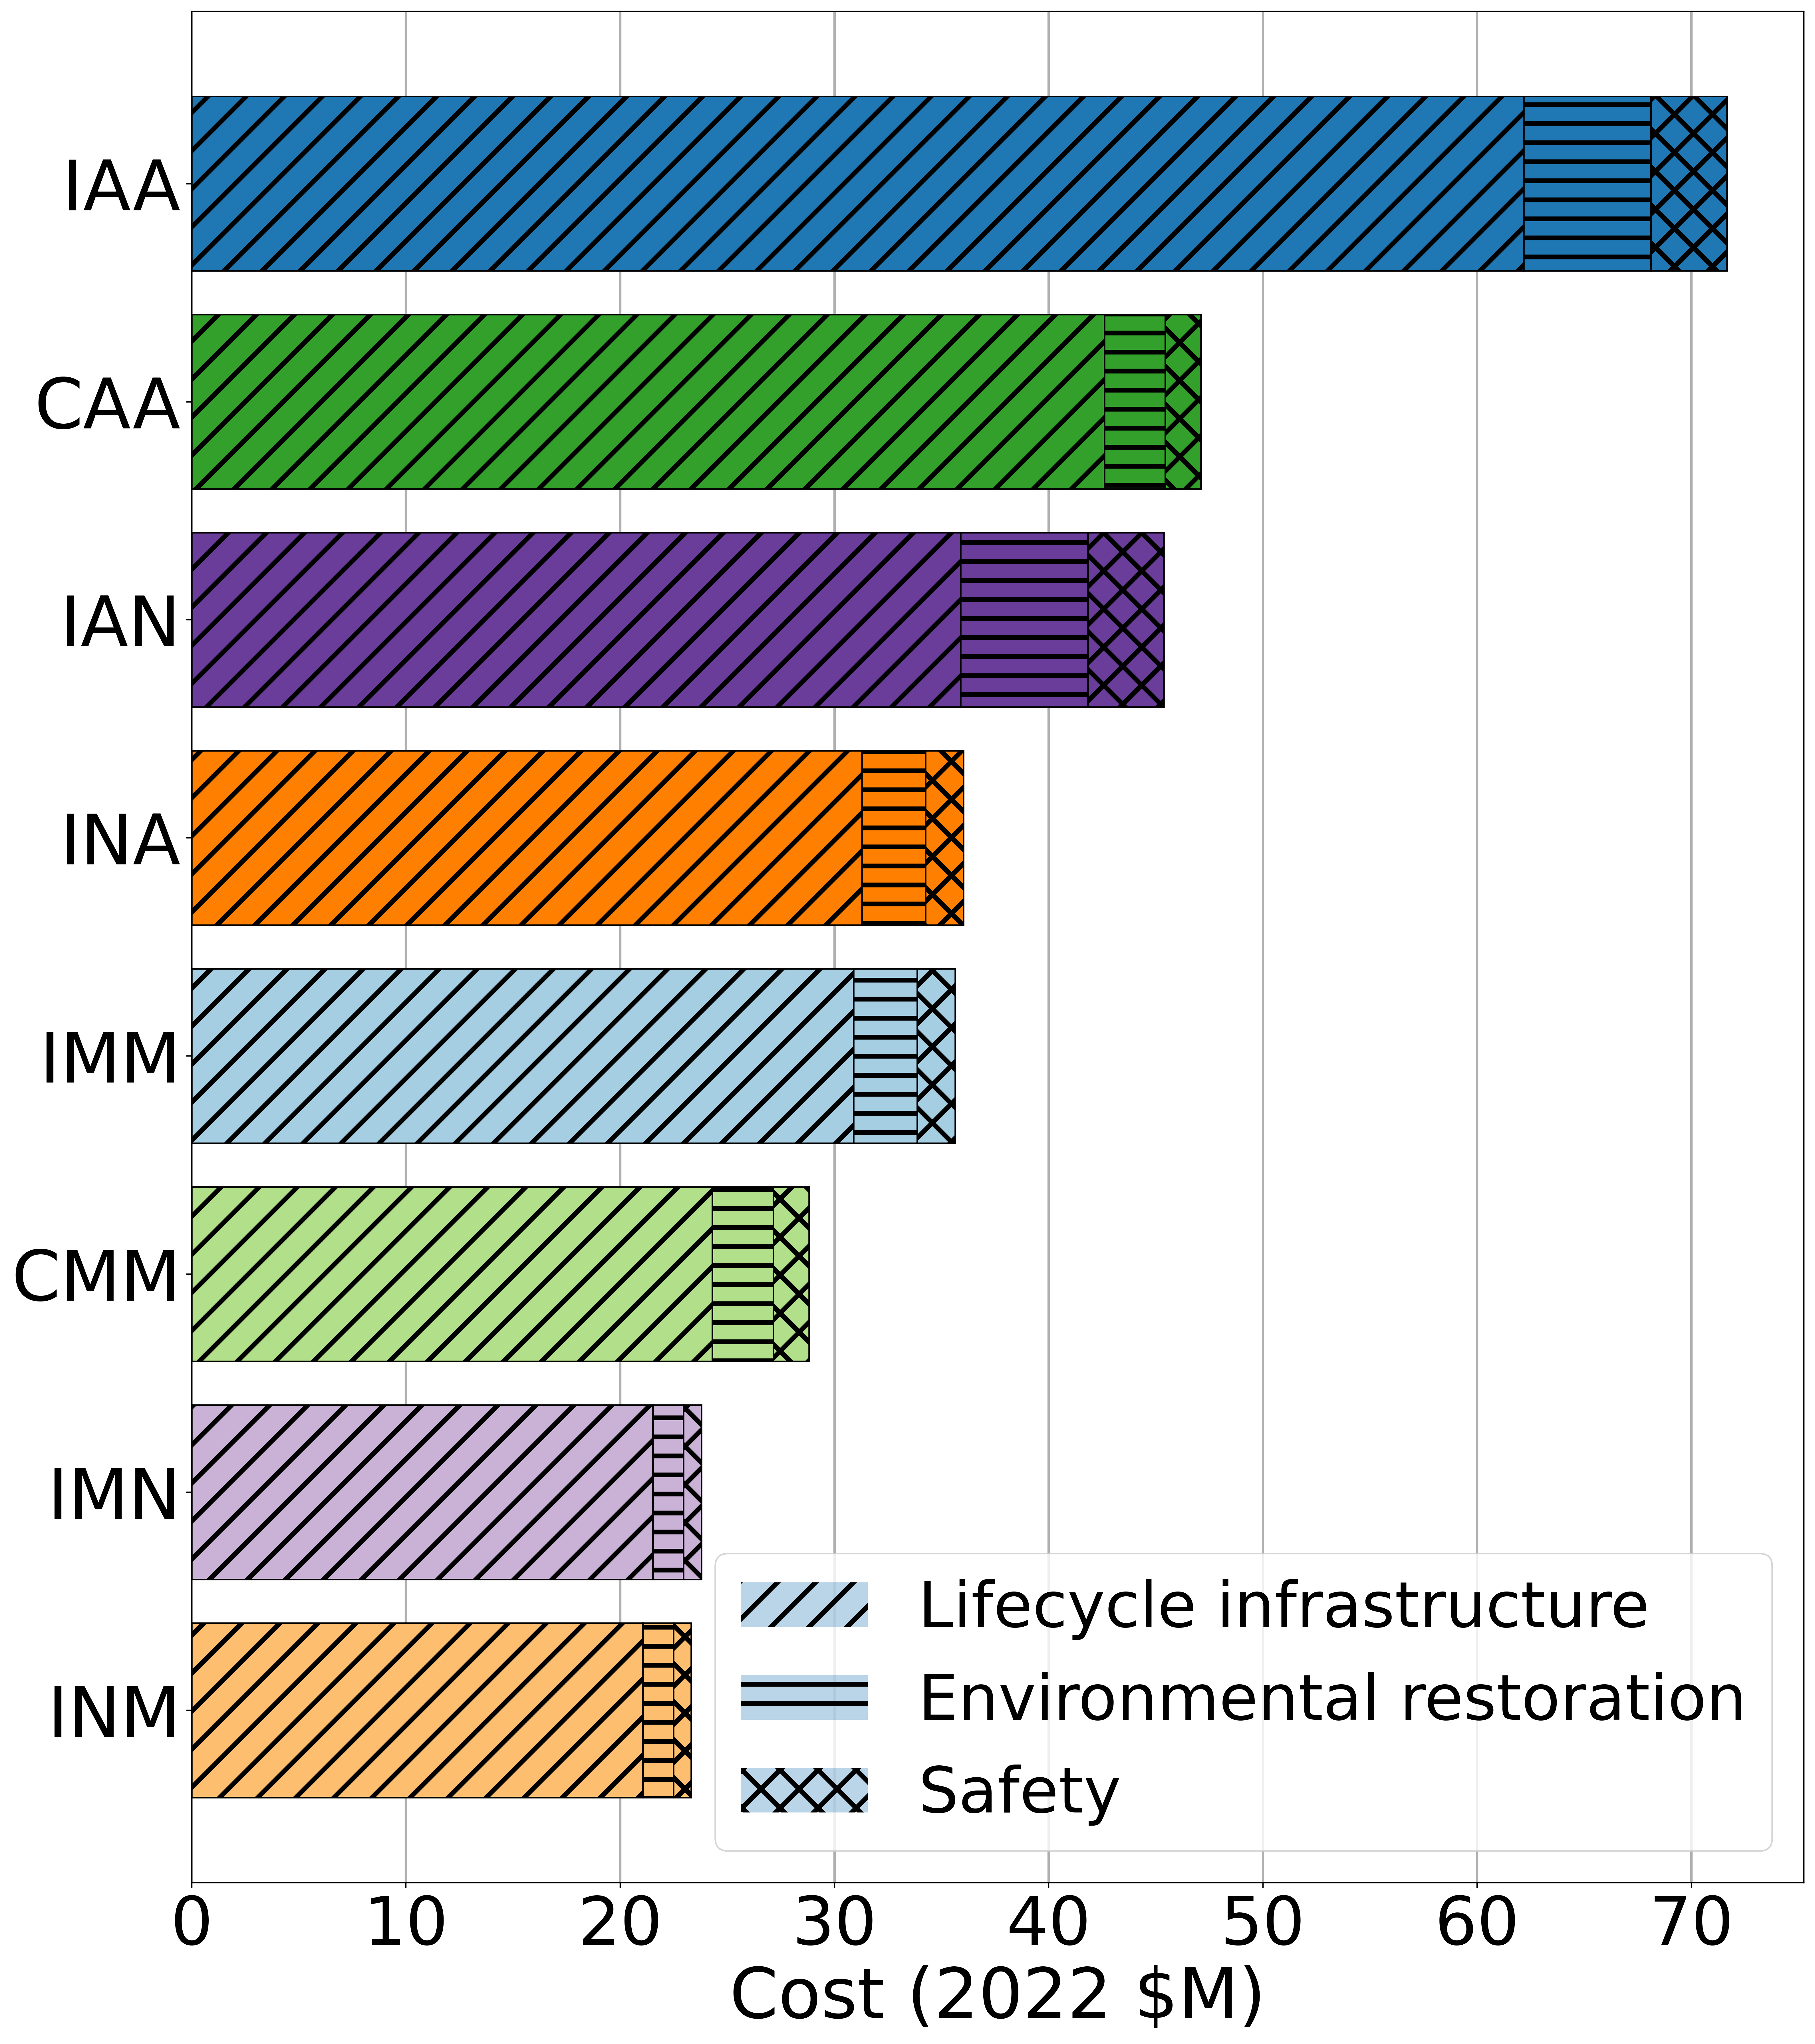

In [244]:
# Calculate the total for each strategy
df_npv_cost_relative = df_npv_cost_relative.loc[df_npv_cost_relative['Strategy']!='INN']
total_cost = df_npv_cost_relative['lifecycle_infrastructure'] + df_npv_cost_relative['environmental_restoration'] + df_npv_cost_relative['safety']

# Reset the index of total_cost to start from 0
df_npv_cost_relative = df_npv_cost_relative.reset_index(drop=True)
total_cost = total_cost.reset_index(drop=True)

# Sort the total costs in descending order and get the sorted indices
sorted_indices = total_cost.sort_values(ascending=False).index

# Reverse the order for highest to lowest from top to bottom
sorted_indices_reversed = sorted_indices[::-1]

# Use the sorted and reversed indices to reorder the data for plotting
y1 = df_npv_cost_relative.loc[sorted_indices_reversed, 'lifecycle_infrastructure']
y2 = df_npv_cost_relative.loc[sorted_indices_reversed, 'environmental_restoration']
y3 = df_npv_cost_relative.loc[sorted_indices_reversed, 'safety']

# Plotting
fig, ax = plt.subplots(figsize=(16, 18), dpi=400)

# Set hatch line width
mpl.rcParams['hatch.linewidth'] = 3.0

# Plot horizontal bars
b1 = ax.barh(range(len(sorted_indices_reversed)), y1, color=['#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='/', zorder=3)
b2 = ax.barh(range(len(sorted_indices_reversed)), y2, left=y1, color=['#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='-', zorder=3)
b3 = ax.barh(range(len(sorted_indices_reversed)), y3, left=y1+y2, color=['#FDBF6F', '#CAB2D6', '#B2DF8A', '#A6CEE3', '#FF7F00', '#6A3D9A', '#33A02C', '#1F78B4'], edgecolor='black', hatch='x', zorder=3)

# Set the y-ticks to the original names, matched with the sorted and reversed indices
plt.yticks(range(len(sorted_indices_reversed)), [df_npv_cost_relative.index[i] for i in sorted_indices_reversed], fontsize=40)

# Create legend
a_val = 0.3
circ1 = mpatches.Patch(alpha=a_val, hatch='/', label='Lifecycle infrastructure')
circ2 = mpatches.Patch(alpha=a_val, hatch='-', label='Environmental restoration')
circ3 = mpatches.Patch(alpha=a_val, hatch='x', label='Safety')

ax.legend(handles=[circ1, circ2, circ3], loc=4, fontsize=40)
plt.yticks(df_npv_cost_relative.index, labels=['INM', 'IMN', 'CMM', 'IMM', 'INA', 'IAN', 'CAA', 'IAA'], fontsize=44)

# Convert the x-axis values to millions
formatter = plt.FuncFormatter(lambda x, pos: f'{int(x * 1e-6)}')
ax.xaxis.set_major_formatter(formatter)

# Set labels and grid
#plt.xlabel('Cost relative to INN (2022 $M)', fontsize=42)
plt.xlabel('Cost (2022 $M)', fontsize=44)

plt.xticks(fontsize=42)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x', alpha=1, linewidth=1.5)

# Save and show plot
plt.tight_layout()
plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [125]:
### Pareto plot



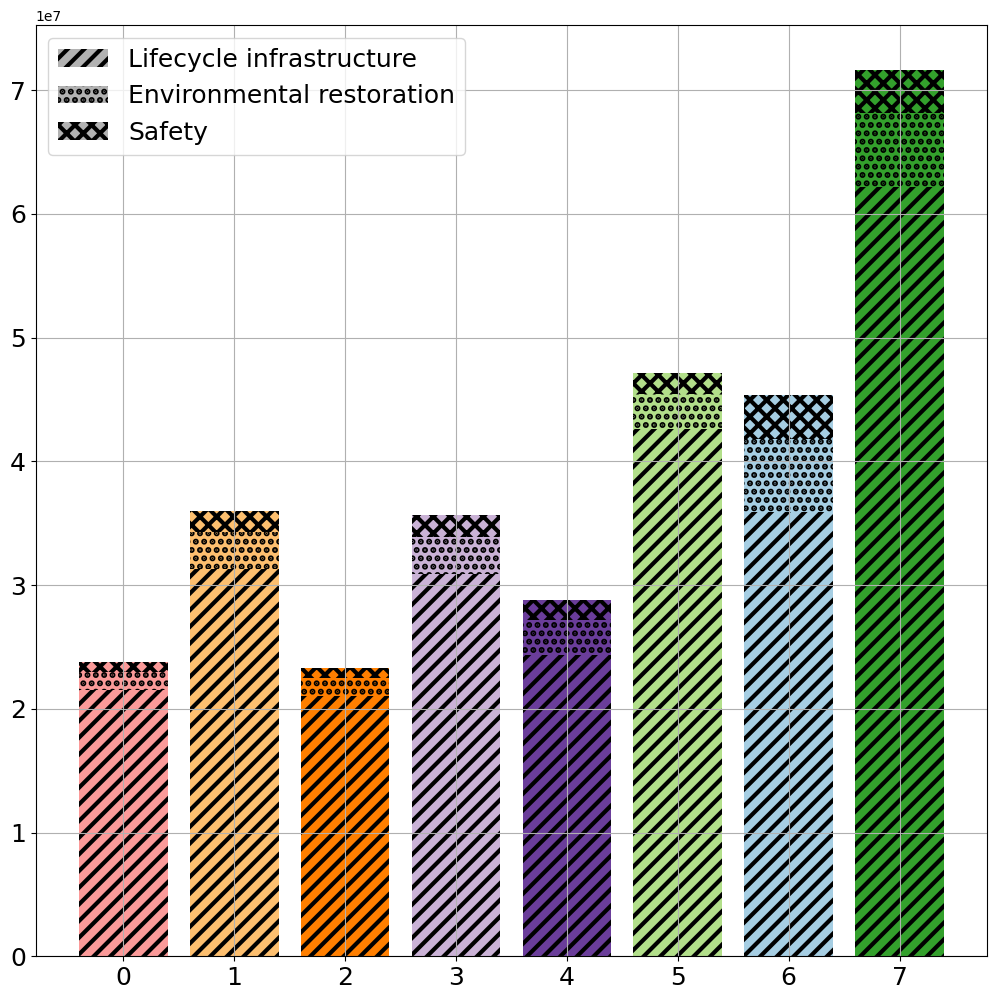

In [126]:
import matplotlib.patches as mpatches

fig,(ax) = plt.subplots()
fig.set_size_inches(10, 10)

x= df_npv_cost_relative.index
y1 = df_npv_cost_relative['lifecycle_infrastructure']
y2 = df_npv_cost_relative['environmental_restoration']
y3 = df_npv_cost_relative['safety']
plt.bar(x, y1, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'],hatch='//')
plt.bar(x, y2, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='..', bottom=y1)
plt.bar(x, y3, color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'], hatch='xx', bottom=y1+y2)

a_val = 0.3

circ1 = mpatches.Patch( facecolor='#000000',alpha=a_val,hatch=r'//',label='Lifecycle infrastructure')
circ2= mpatches.Patch( facecolor='#000000',alpha=a_val,hatch='..',label='Environmental restoration')
circ3 = mpatches.Patch(facecolor='#000000',alpha=a_val,hatch='xx',label='Safety')

ax.legend(handles = [circ1,circ2,circ3],loc=2,fontsize=18)
plt.tight_layout()

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

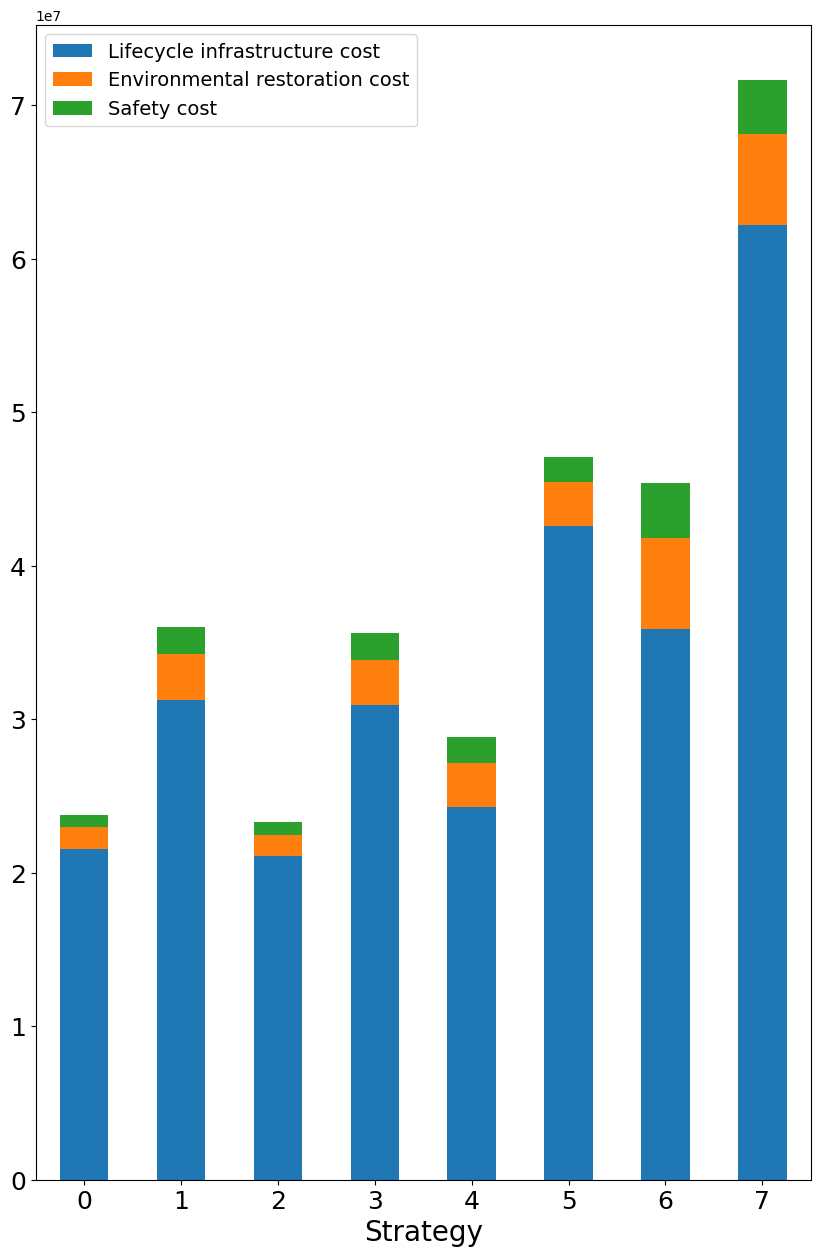

In [127]:
# plotting cost results integerated for broadband and electric
df_npv_cost_relative.plot.bar(stacked=True)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Cost results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.legend(['Lifecycle infrastructure cost','Environmental restoration cost','Safety cost'], fontsize=14)
plt.grid()
#plt.savefig(r'../../figures/npv-cost-integrated-relative.png', dpi=300)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)

In [128]:
df_npv_loss_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'aesthetic_benefit'], axis=1)

In [129]:
df_npv_loss_relative

avoided_economic_losses
Strategy                         
INN                  0.000000e+00
INM                  8.449969e+06
INA                  1.781414e+07
IMN                  1.770095e+07
IAN                  3.731697e+07
CMM                  2.615092e+07
IMM                  2.615092e+07
CAA                  5.513111e+07
IAA                  5.513111e+07

In [130]:
df_npv_loss_relative=df_npv_loss_relative.reset_index()

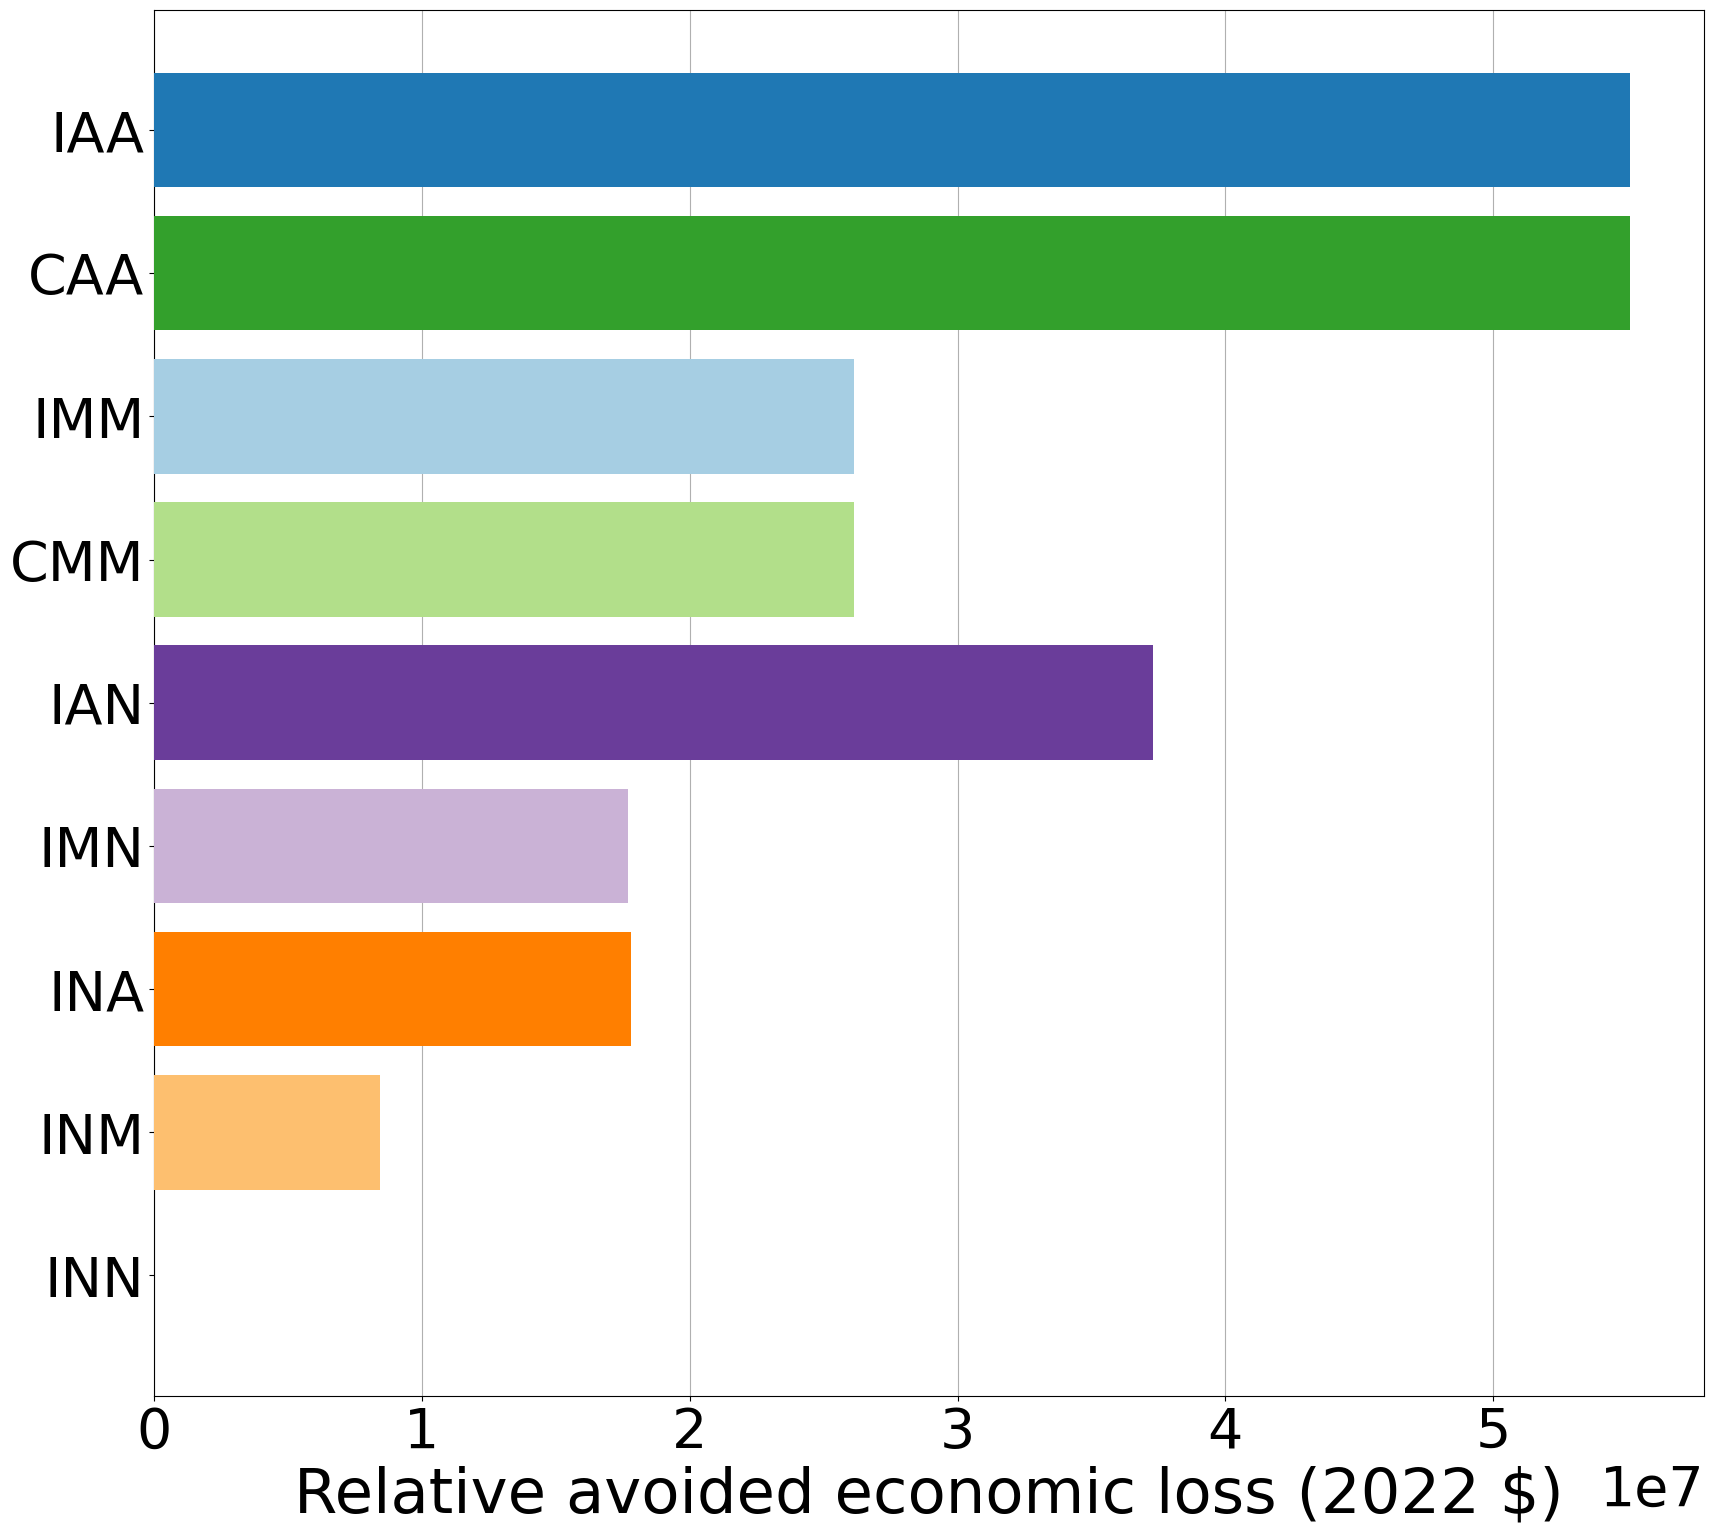

In [131]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_loss_relative.loc[i,"avoided_economic_losses"],color=row, zorder=3)
plt.xlabel ('Relative avoided economic loss (2022 $)', fontsize=45)
#plt.ylabel ('Strategies')
plt.yticks(df_npv_loss_relative.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')

plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [132]:
# plotting loss results integerated for broadband and electric
#ax=df_npv_loss_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
#plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.yticks(fontsize=18)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

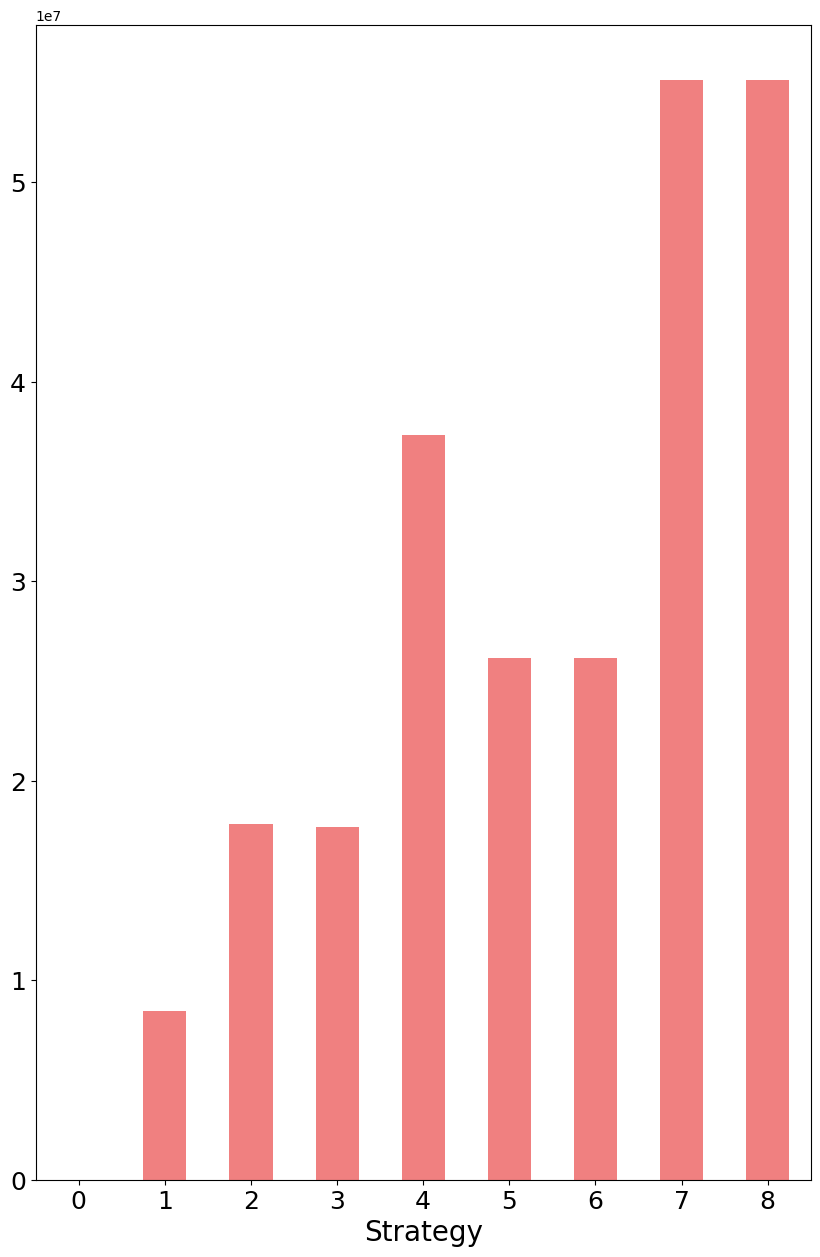

In [133]:
# plotting loss results integerated for broadband and electric
df_npv_loss_relative.plot.bar(stacked=True, color='lightcoral', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Losses results-relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-loss-integrated-relative.png', dpi=300)

In [134]:
df_npv_benefit_relative=df_npv_cost_loss_benefit_relative.drop(['lifecycle_infrastructure','environmental_restoration','safety', 'avoided_economic_losses'], axis=1)

In [135]:
#df_npv_benefit_relative=df_npv_benefit_relative.reset_index()

In [136]:
df_npv_benefit_relative = df_npv_benefit_relative.reset_index()
df_npv_benefit_relative

Strategy  aesthetic_benefit
0      INN       0.000000e+00
1      INM       4.284824e+05
2      INA       7.669424e+05
3      IMN       4.284824e+05
4      IAN       7.669424e+05
5      CMM       8.569649e+05
6      IMM       8.569649e+05
7      CAA       1.533885e+06
8      IAA       1.533885e+06

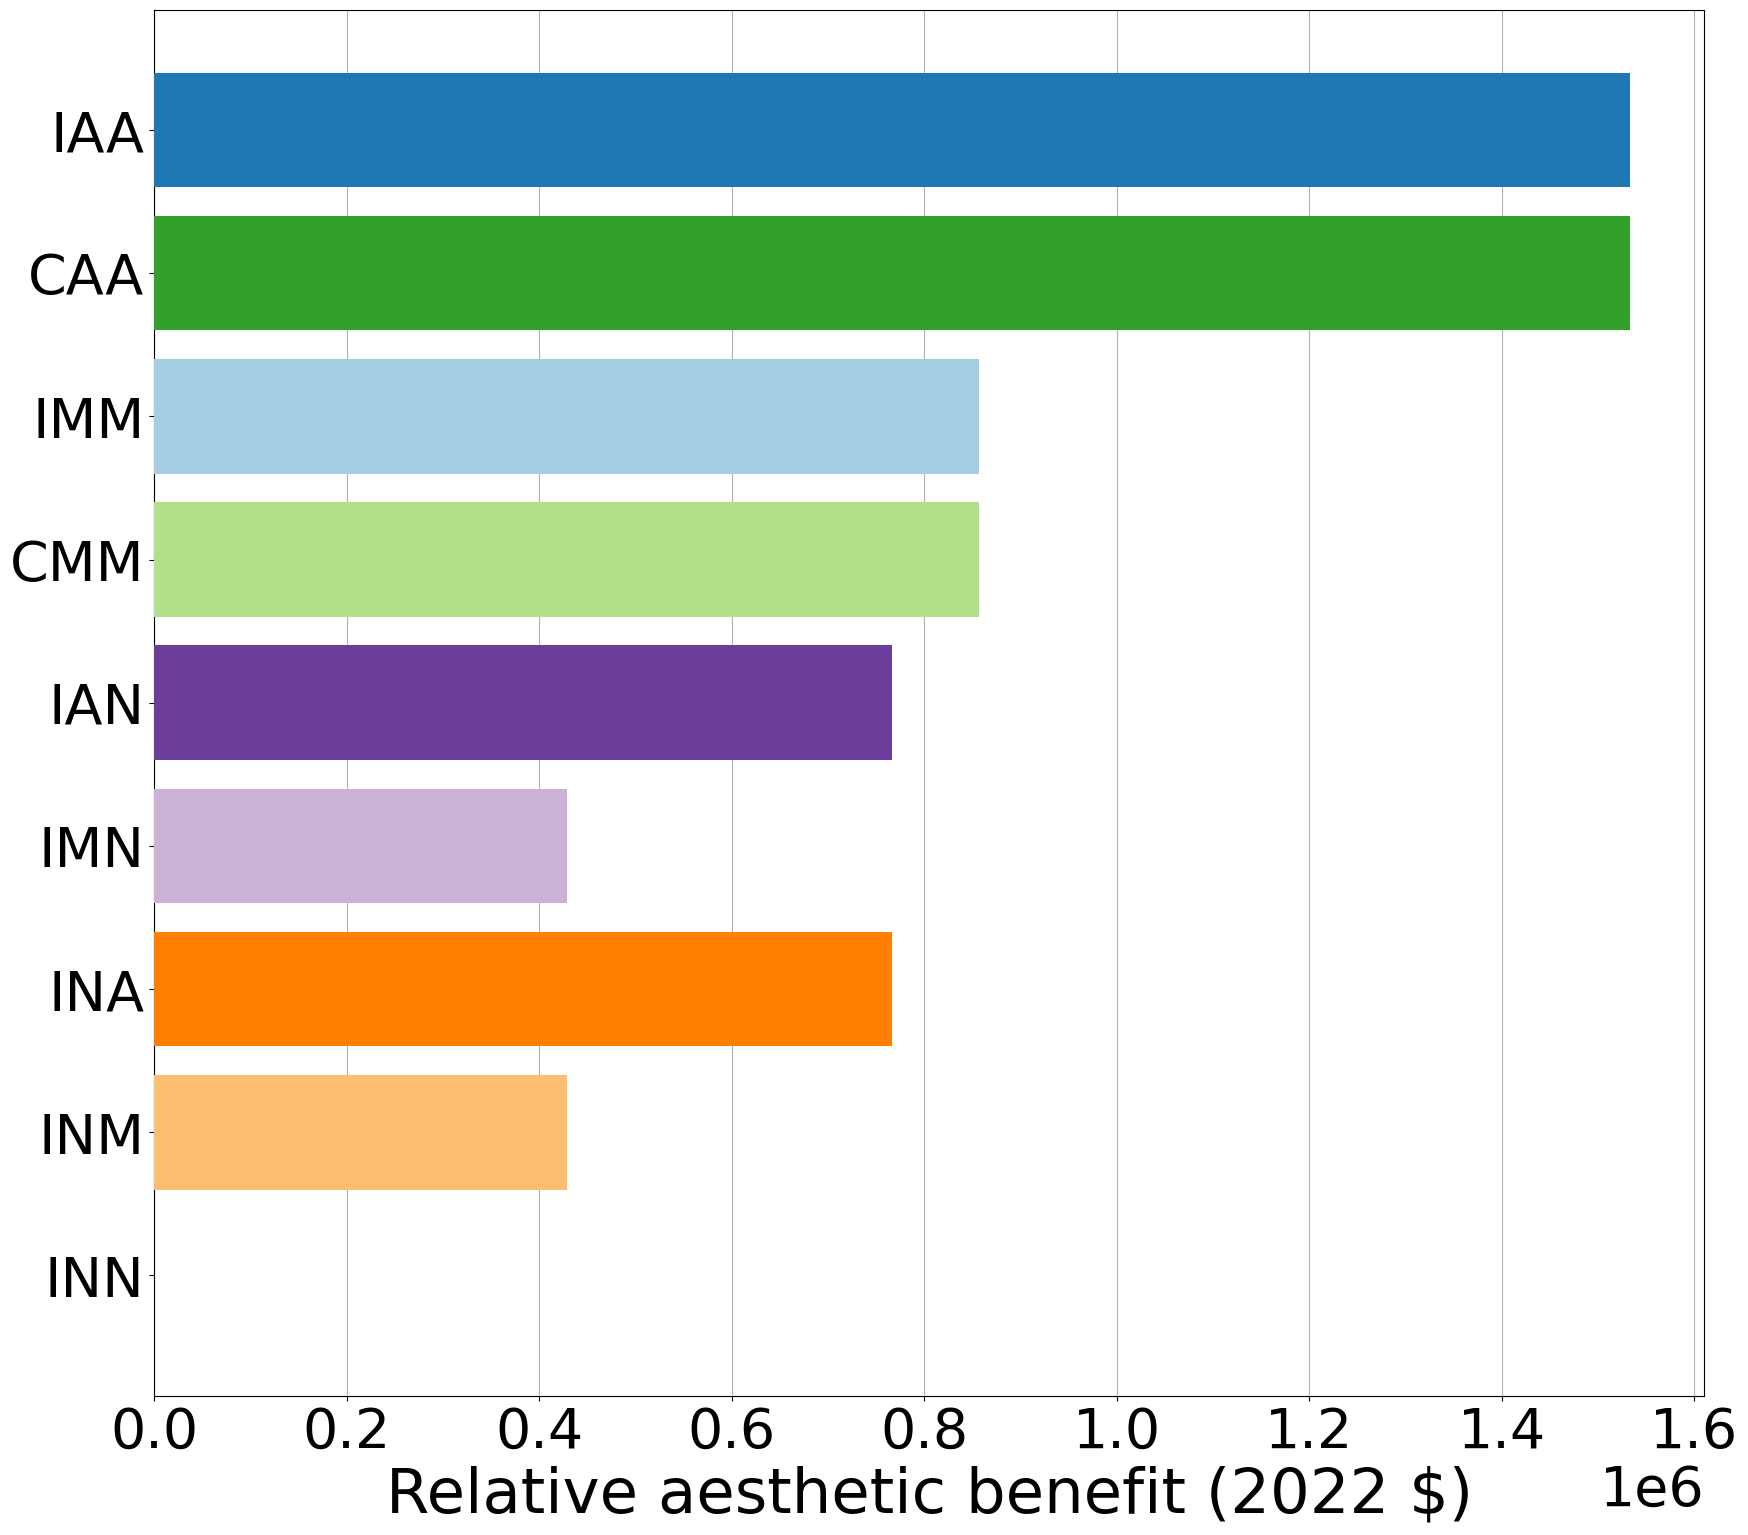

In [137]:
# Using plt to provide horizontal bar plots for net present values using color codes
#fig.set_size_inches(10,15)
fig, ax = plt.subplots(figsize=(20,18))

my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

for i ,row in enumerate(my_colors):
    plt.barh(i,df_npv_benefit_relative.loc[i,"aesthetic_benefit"],color=row, zorder=3)
plt.xlabel ('Relative aesthetic benefit (2022 $)', fontsize=45)

#plt.ylabel ('Strategies')
plt.yticks(df_npv_benefit_relative.index, labels=['INN','INM','INA','IMN','IAN','CMM','IMM','CAA','IAA'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=400, bbox_inches='tight')
plt.show()

In [138]:
# plotting benefit results integerated for broadband and electric
#ax=df_npv_benefit_relative.T.plot.bar(color=['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4'])
#ax.set_xticks([])
#fig = plt.gcf()
#fig.set_size_inches(10, 15)
##plt.ylim([-12500000, 1250000000])
#plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
#plt.xlabel('Strategy',fontsize=20)
#plt.grid()
#plt.xticks(fontsize=26)
#plt.yticks(fontsize=26)
#plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

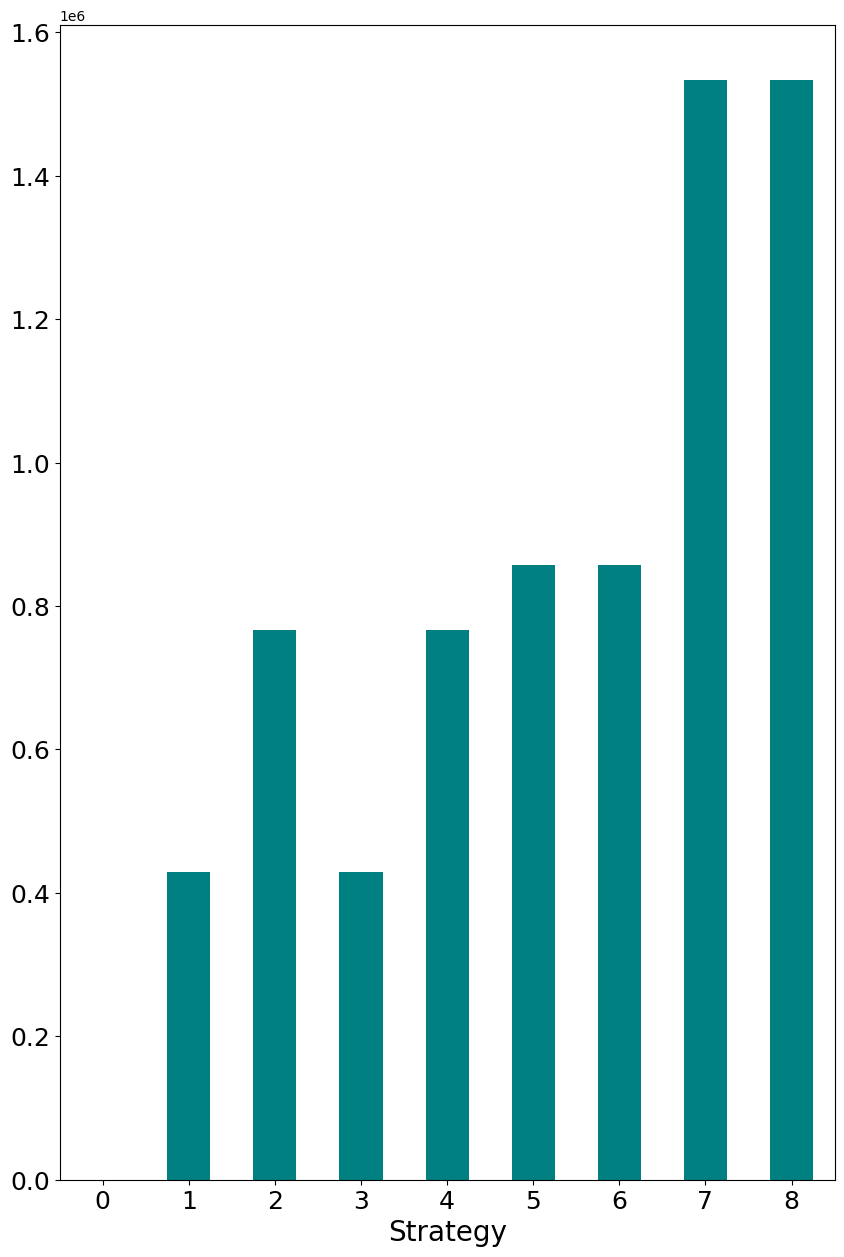

In [139]:
# plotting benefit results integerated for broadband and electric
df_npv_benefit_relative.plot.bar(stacked=True, color='teal', legend=False)
fig = plt.gcf()
fig.set_size_inches(10, 15)
#plt.ylim([-12500000, 1250000000])
plt.grid()
#plt.title("Benefit results- relative to S1", fontsize=30)
plt.xlabel('Strategy',fontsize=20)
plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(rotation=0)
#plt.savefig(r'../../figures/npv-benefit-integrated-relative.png', dpi=300)

In [140]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                     5029480.00                      0.000  2097282.720   
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
CMM                    29337295.98                2844372.488  3762260.620   
IMM                    47634864.12                2844372.488  3762260.620   
CAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INN        7126762.72       0.000000e+00             0.000000e+00   
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   

           net_benefit  
Strategy                
INN      -7.126763e+06  
INM      -2.204025e+07  
INA      -2.456924e+07  
IMN      -1.232012e+07  
IAN      -4.683250e+06  
CMM      -8.936045e+06  
IMM      -2.723361e+07  
CAA       4.156668e+06  
IAA      -2.212572e+07

In [141]:
df_npv_cost_loss_benefit['benefit_loss']=df_npv_cost_loss_benefit['aesthetic_benefit']+df_npv_cost_loss_benefit['avoided_economic_losses']
df_npv_cost_loss_benefit['cost_benefit_ratio']=df_npv_cost_loss_benefit['total_cost']/df_npv_cost_loss_benefit['benefit_loss']
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                     5029480.00                      0.000  2097282.720   
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
CMM                    29337295.98                2844372.488  3762260.620   
IMM                    47634864.12                2844372.488  3762260.620   
CAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INN        7126762.72       0.000000e+00             0.000000e+00   
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INN      -7.126763e+06  0.000000e+00                 inf  
INM      -2.204025e+07  8.878452e+06            3.482443  
INA      -2.456924e+07  1.858108e+07            2.322271  
IMN      -1.232012e+07  1.812943e+07            1.679565  
IAN      -4.683250e+06  3.808391e+07            1.122972  
CMM      -8.936045e+06  2.700788e+07            1.330868  
IMM      -2.723361e+07  2.700788e+07            2.008358  
CAA       4.156668e+06  5.666499e+07            0.926645  
IAA      -2.212572e+07  5.666499e+07            1.390465

In [142]:
df_pareto_plots=df_npv_cost_loss_benefit.copy()

In [143]:
df_pareto_plots=df_pareto_plots.loc[df_pareto_plots.index!='INN']
df_pareto_plots

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
CMM                    29337295.98                2844372.488  3762260.620   
IMM                    47634864.12                2844372.488  3762260.620   
CAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INM      -2.204025e+07  8.878452e+06            3.482443  
INA      -2.456924e+07  1.858108e+07            2.322271  
IMN      -1.232012e+07  1.812943e+07            1.679565  
IAN      -4.683250e+06  3.808391e+07            1.122972  
CMM      -8.936045e+06  2.700788e+07            1.330868  
IMM      -2.723361e+07  2.700788e+07            2.008358  
CAA       4.156668e+06  5.666499e+07            0.926645  
IAA      -2.212572e+07  5.666499e+07            1.390465

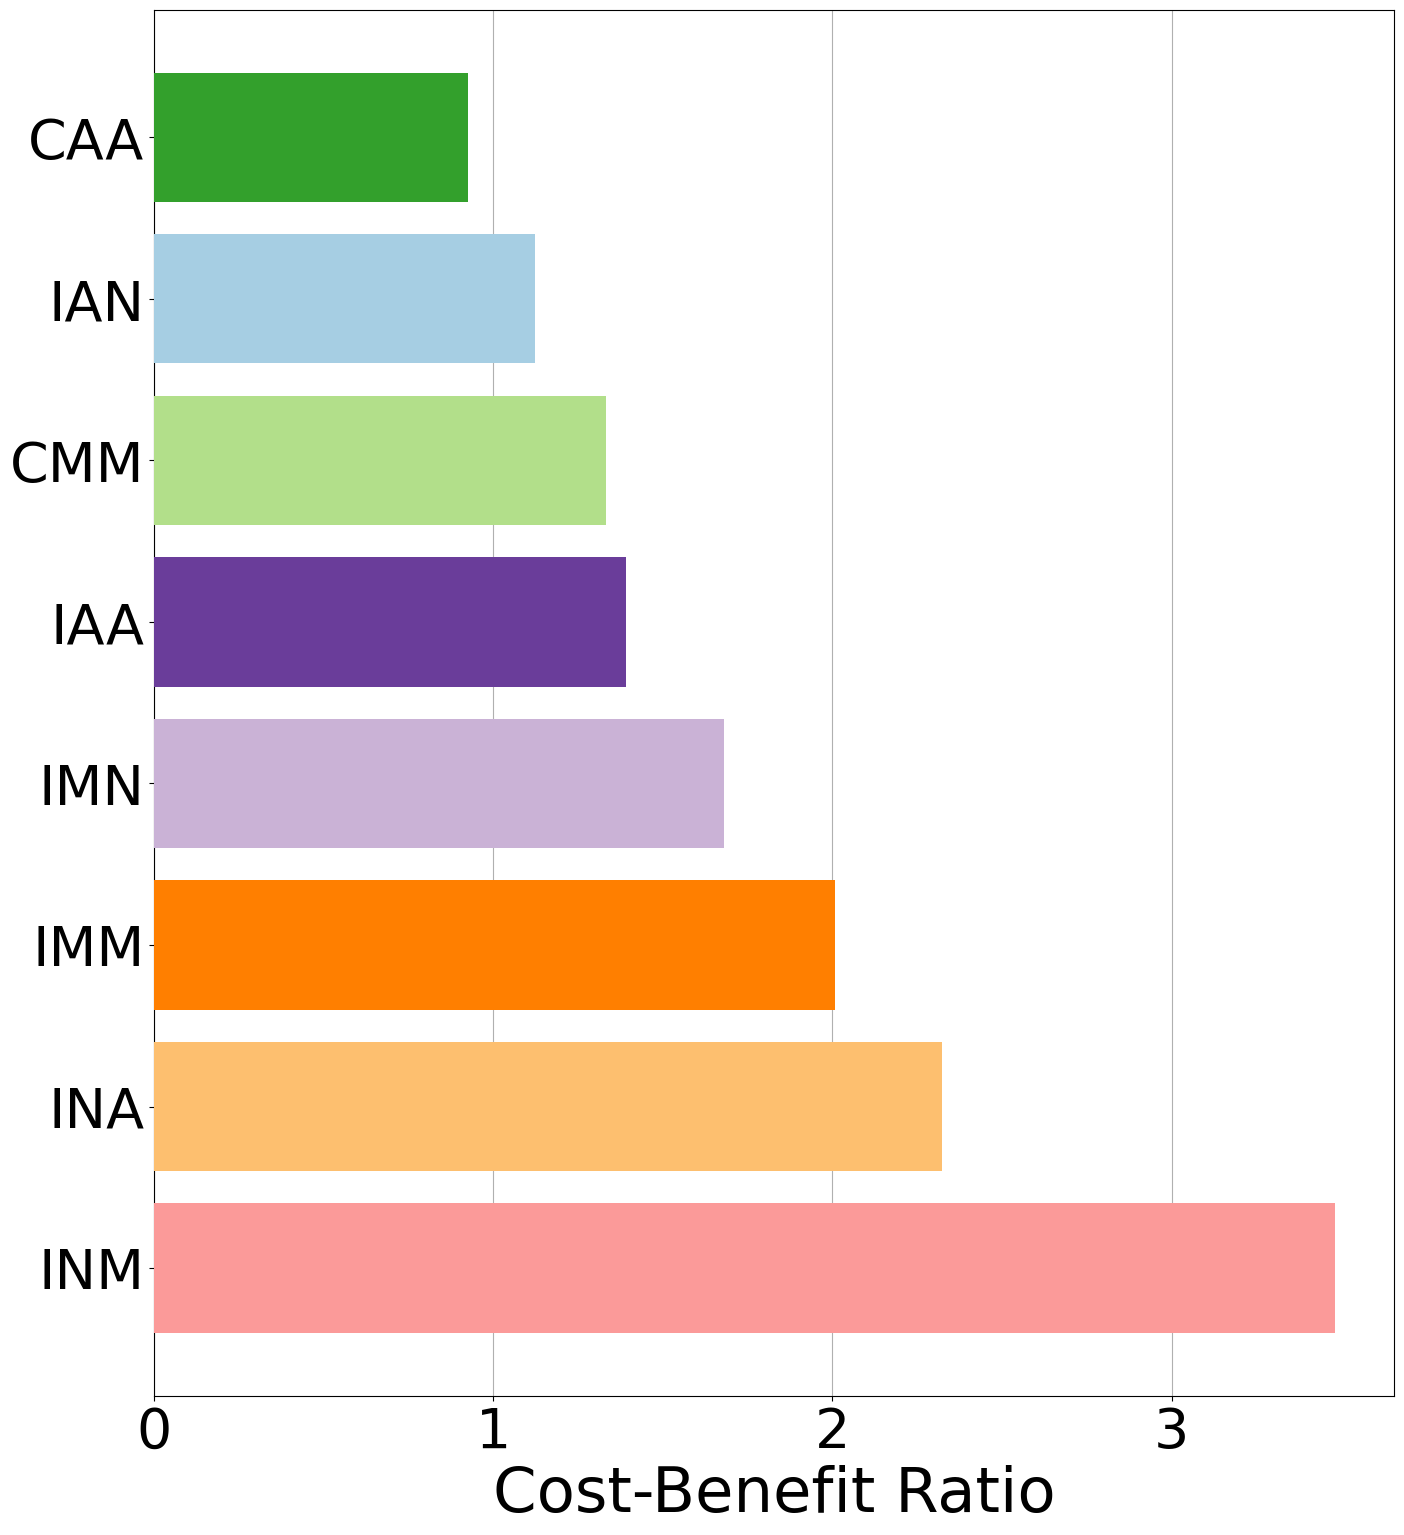

In [144]:
# Sorting the DataFrame based on 'cost_benefit_ratio'
df_pareto_sorted = df_pareto_plots.sort_values(by='cost_benefit_ratio', ascending=False)

# Colors as specified by user
my_colors = ['#FB9A99','#FDBF6F','#FF7F00','#CAB2D6','#6A3D9A','#B2DF8A','#A6CEE3','#33A02C','#1F78B4']

# Creating the Pareto plot
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_pareto_sorted.index, df_pareto_sorted['cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)], zorder=3)
ax.set_xlabel('Cost-Benefit Ratio', fontsize=45)
#ax.set_xticks(fontsize=40)
#ax.set_yticks(fontsize=40)
ax.tick_params(axis='x', labelsize=40)  
ax.tick_params(axis='y', labelsize=40)  
ax.xaxis.offsetText.set_fontsize(40)
ax.yaxis.offsetText.set_fontsize(40)
plt.grid(axis='x')
plt.show()

In [145]:
df_pareto_sorted['log_of_cost_benefit_ratio']=np.log(df_pareto_sorted['cost_benefit_ratio'])
df_pareto_sorted

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMM                    47634864.12                2844372.488  3762260.620   
IMN                    26097596.80                1422186.244  2929771.670   
IAA                    67208271.02                5937134.726  5645310.683   
CMM                    29337295.98                2844372.488  3762260.620   
IAN                    35927293.91                2968567.363  3871296.702   
CAA                    40925879.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  \
Strategy                                                   
INM      -2.204025e+07  8.878452e+06            3.482443   
INA      -2.456924e+07  1.858108e+07            2.322271   
IMM      -2.723361e+07  2.700788e+07            2.008358   
IMN      -1.232012e+07  1.812943e+07            1.679565   
IAA      -2.212572e+07  5.666499e+07            1.390465   
CMM      -8.936045e+06  2.700788e+07            1.330868   
IAN      -4.683250e+06  3.808391e+07            1.122972   
CAA       4.156668e+06  5.666499e+07            0.926645   

          log_of_cost_benefit_ratio  
Strategy                             
INM                        1.247734  
INA                        0.842546  
IMM                        0.697317  
IMN                        0.518535  
IAA                        0.329639  
CMM                        0.285831  
IAN                        0.115979  
CAA                       -0.076185

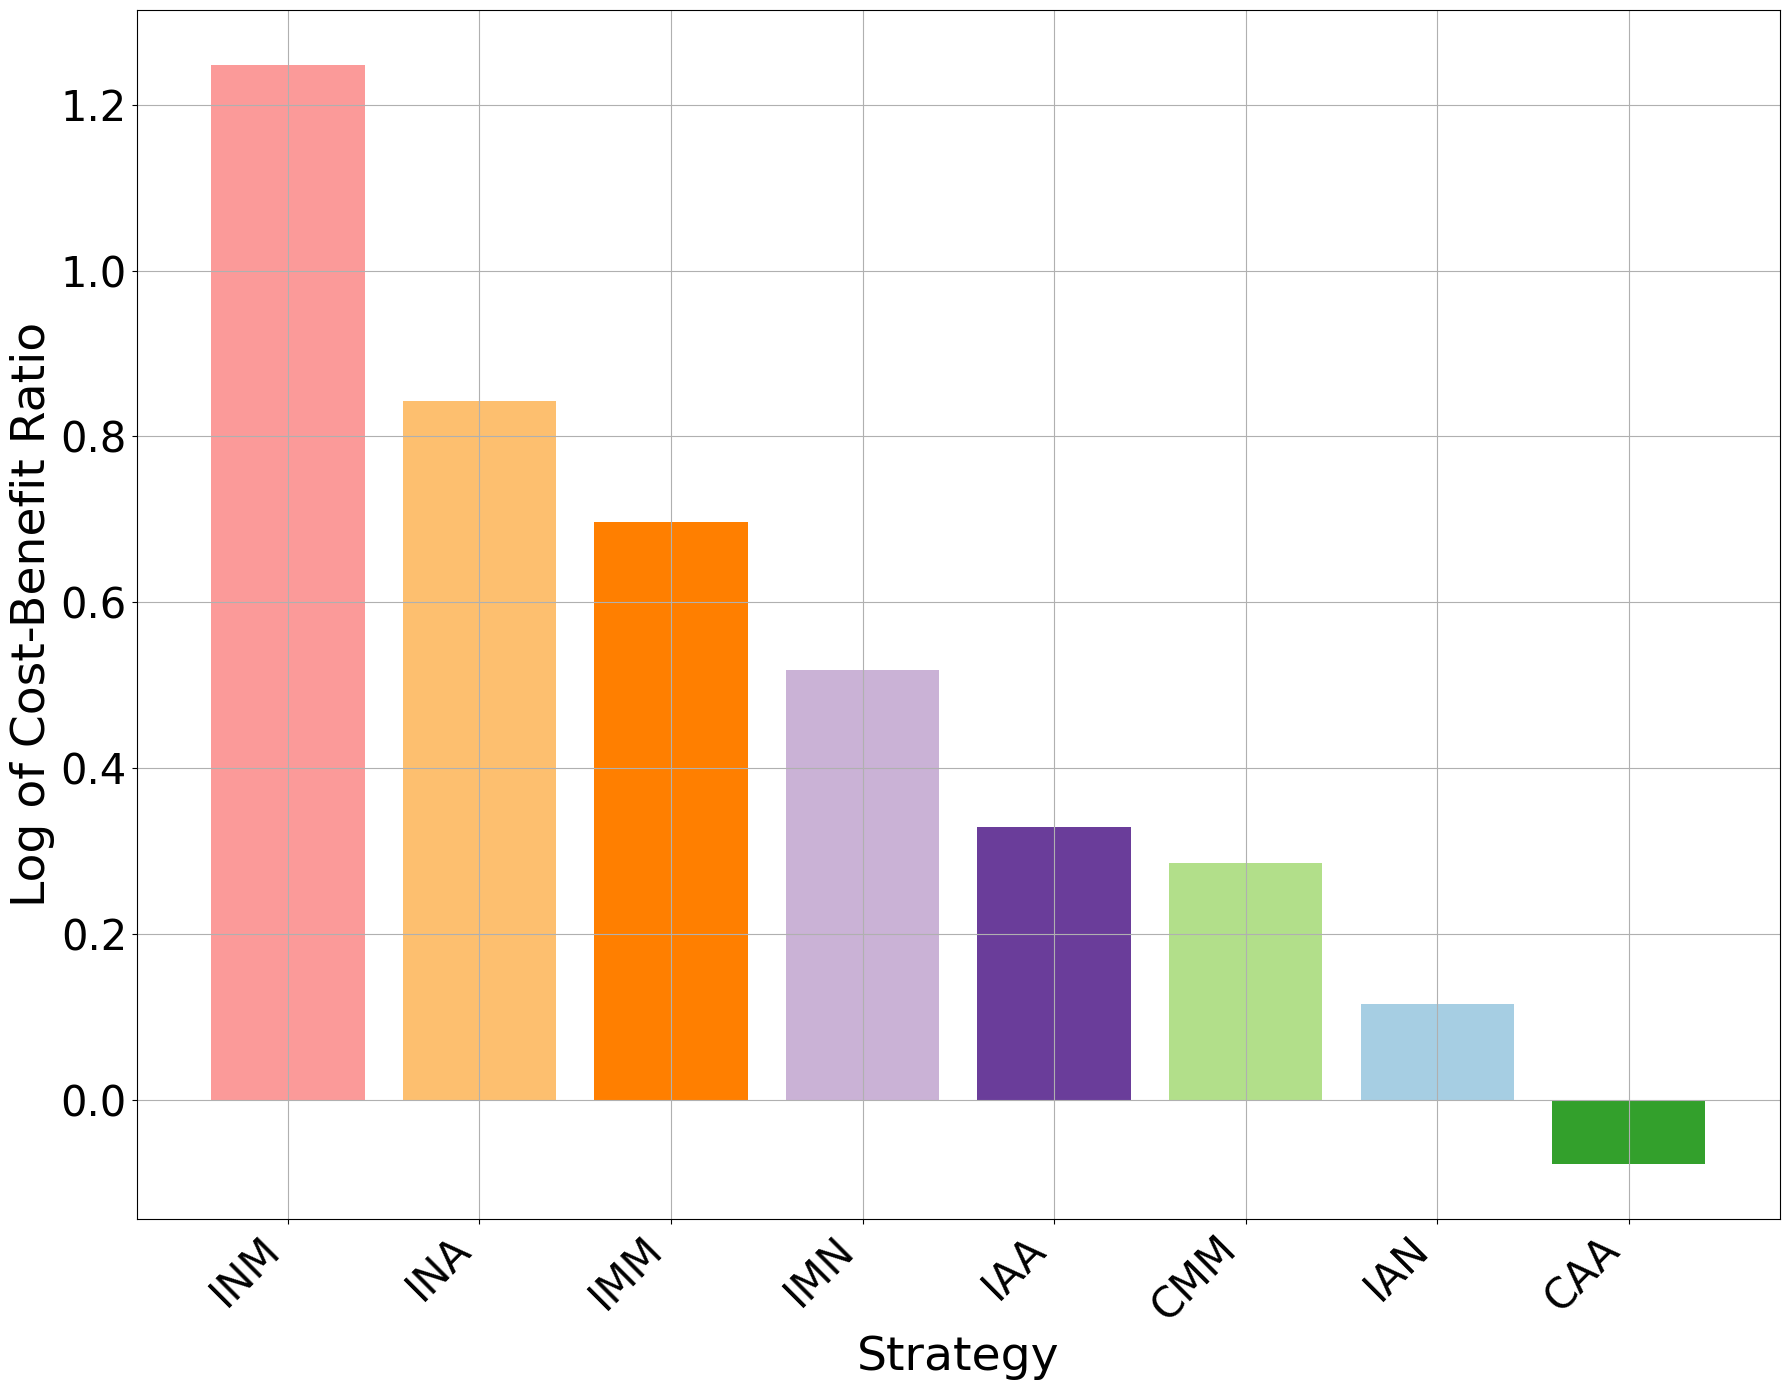

In [146]:
# Calculate cumulative percentage
df_pareto_sorted['cumulative_pct'] = df_pareto_sorted['log_of_cost_benefit_ratio'].cumsum() / df_pareto_sorted['log_of_cost_benefit_ratio'].sum() * 100

# Plotting
fig, ax = plt.subplots(figsize=(18, 14))
bar_positions = range(len(df_pareto_sorted))
bars = ax.bar(bar_positions, df_pareto_sorted['log_of_cost_benefit_ratio'], color=my_colors[:len(df_pareto_sorted)])

# Set strategies as x-ticks
ax.set_xticks(bar_positions)
ax.set_xticklabels(df_pareto_sorted.index, rotation=45, ha="right")

# Plot the cumulative percentage line
# Note: We need to ensure the line starts at the first bar and ends at the last one accurately
#ax2 = ax.twinx()
#ax2.plot(bar_positions, df_pareto_sorted['cumulative_pct'], color='black', marker='o', linestyle='-', linewidth=2, ms=10)

# Labeling
ax.set_xlabel('Strategy', fontsize=34)
ax.set_ylabel('Log of Cost-Benefit Ratio', fontsize=34)
#ax2.set_ylabel('Cumulative Percentage (%)', fontsize=34)
ax.tick_params(axis='x', labelsize=30)  
ax.tick_params(axis='y', labelsize=30)  
#ax2.tick_params(axis='y', labelsize=30)  

plt.grid(True)
plt.tight_layout()
plt.show()


In [147]:
df_npv_cost_loss_benefit

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INN                     5029480.00                      0.000  2097282.720   
INM                    26566747.32                1422186.244  2929771.670   
INA                    36310457.11                2968567.363  3871296.702   
IMN                    26097596.80                1422186.244  2929771.670   
IAN                    35927293.91                2968567.363  3871296.702   
CMM                    29337295.98                2844372.488  3762260.620   
IMM                    47634864.12                2844372.488  3762260.620   
CAA                    40925879.02                5937134.726  5645310.683   
IAA                    67208271.02                5937134.726  5645310.683   

           total_cost  aesthetic_benefit  avoided_economic_losses  \
Strategy                                                            
INN        7126762.72       0.000000e+00             0.000000e+00   
INM       30918705.24       4.284824e+05             8.449969e+06   
INA       43150321.18       7.669424e+05             1.781414e+07   
IMN       30449554.71       4.284824e+05             1.770095e+07   
IAN       42767157.97       7.669424e+05             3.731697e+07   
CMM       35943929.09       8.569649e+05             2.615092e+07   
IMM       54241497.23       8.569649e+05             2.615092e+07   
CAA       52508324.43       1.533885e+06             5.513111e+07   
IAA       78790716.43       1.533885e+06             5.513111e+07   

           net_benefit  benefit_loss  cost_benefit_ratio  
Strategy                                                  
INN      -7.126763e+06  0.000000e+00                 inf  
INM      -2.204025e+07  8.878452e+06            3.482443  
INA      -2.456924e+07  1.858108e+07            2.322271  
IMN      -1.232012e+07  1.812943e+07            1.679565  
IAN      -4.683250e+06  3.808391e+07            1.122972  
CMM      -8.936045e+06  2.700788e+07            1.330868  
IMM      -2.723361e+07  2.700788e+07            2.008358  
CAA       4.156668e+06  5.666499e+07            0.926645  
IAA      -2.212572e+07  5.666499e+07            1.390465

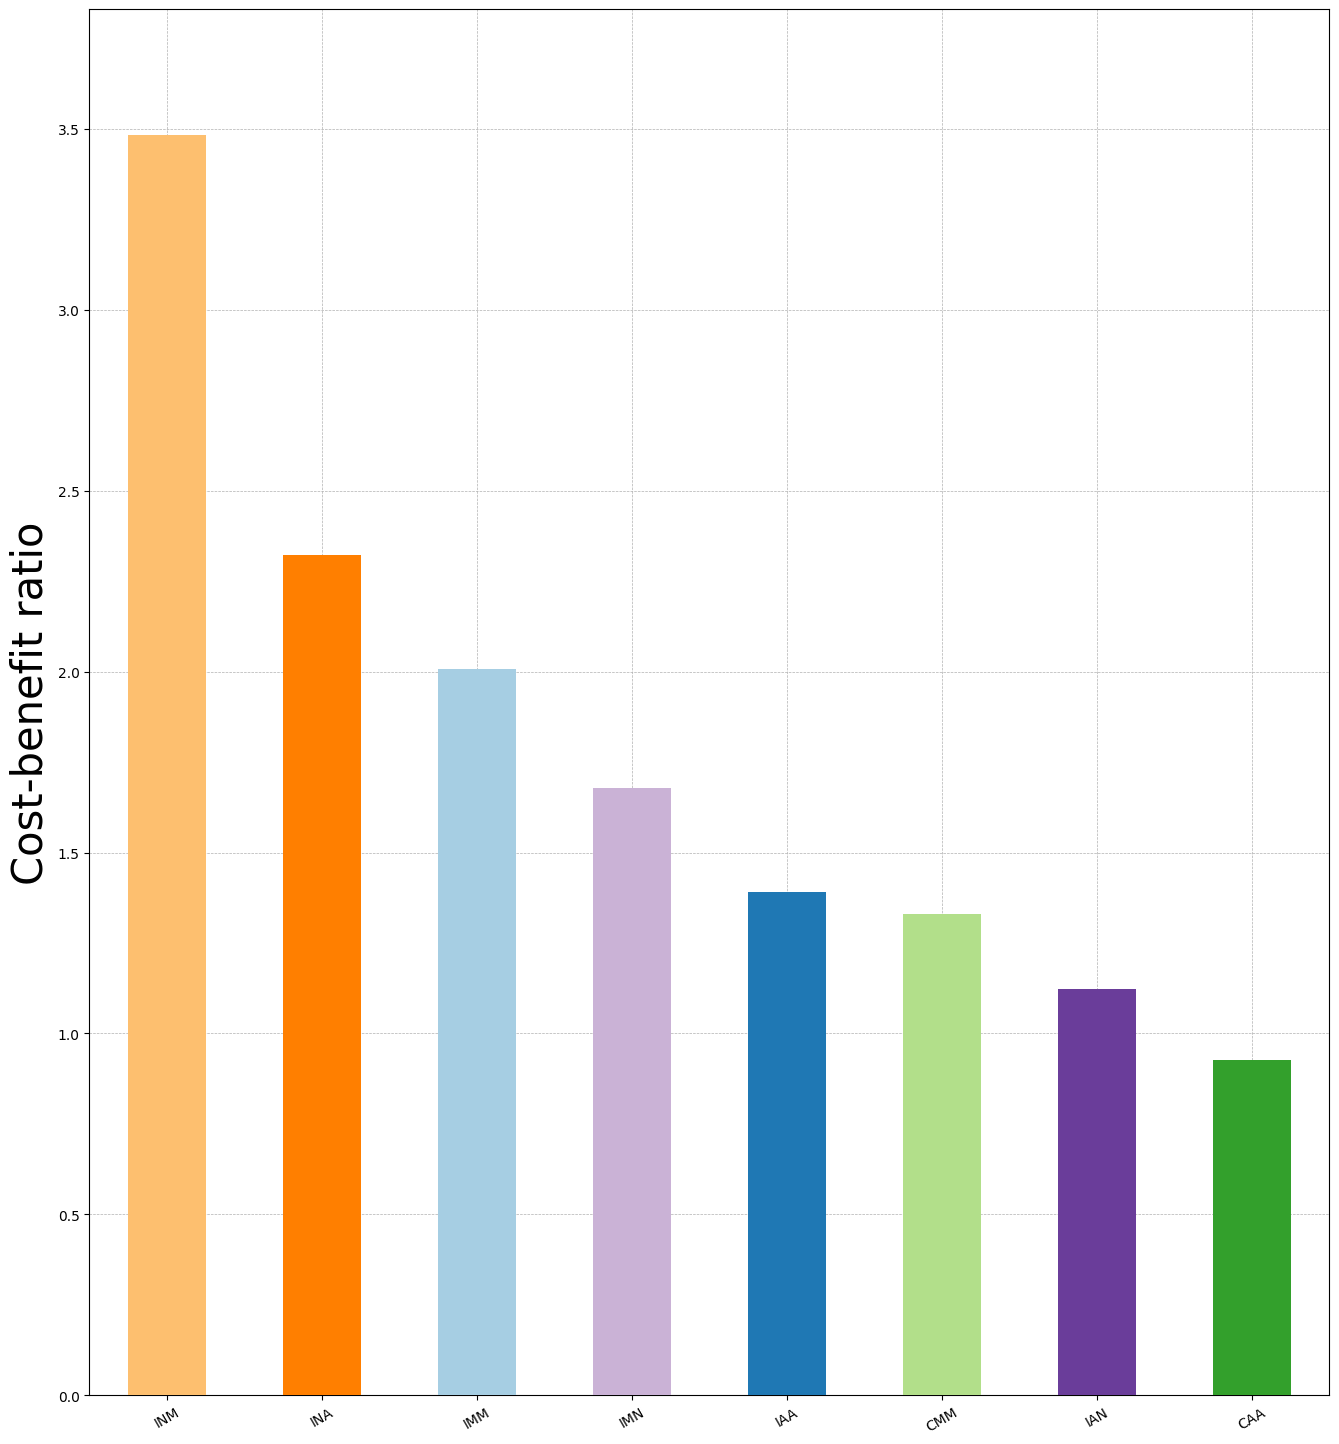

In [148]:
### Plot cost vs benefit

# Dropping rows with infinite cost_benefit_ratio values and updating the DataFrame
df_clean_dropped_inf = df_npv_cost_loss_benefit[df_npv_cost_loss_benefit['cost_benefit_ratio'].notna() & (df_npv_cost_loss_benefit['cost_benefit_ratio'] != float('inf'))]



# Define colors for each strategy
strategy_colors = {
    'INN': '#FB9A99', 'INM': '#FDBF6F', 'INA': '#FF7F00', 'IMN': '#CAB2D6',
    'IAN': '#6A3D9A', 'CMM': '#B2DF8A', 'IMM': '#A6CEE3', 'CAA': '#33A02C', 'IAA': '#1F78B4'
}

# Sort data by cost-benefit ratio
df_sorted = df_clean_dropped_inf.sort_values('cost_benefit_ratio', ascending=False)

# Plot setup
fig, ax = plt.subplots(figsize=(16, 18))
df_sorted['cost_benefit_ratio'].plot(kind='bar', color=[strategy_colors[strategy] for strategy in df_sorted.index], ax=ax, zorder=3)
#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('Cost-benefit ratio', fontsize=30)
plt.xticks(rotation=30)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Handle infinite values in plot
ax.set_ylim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()

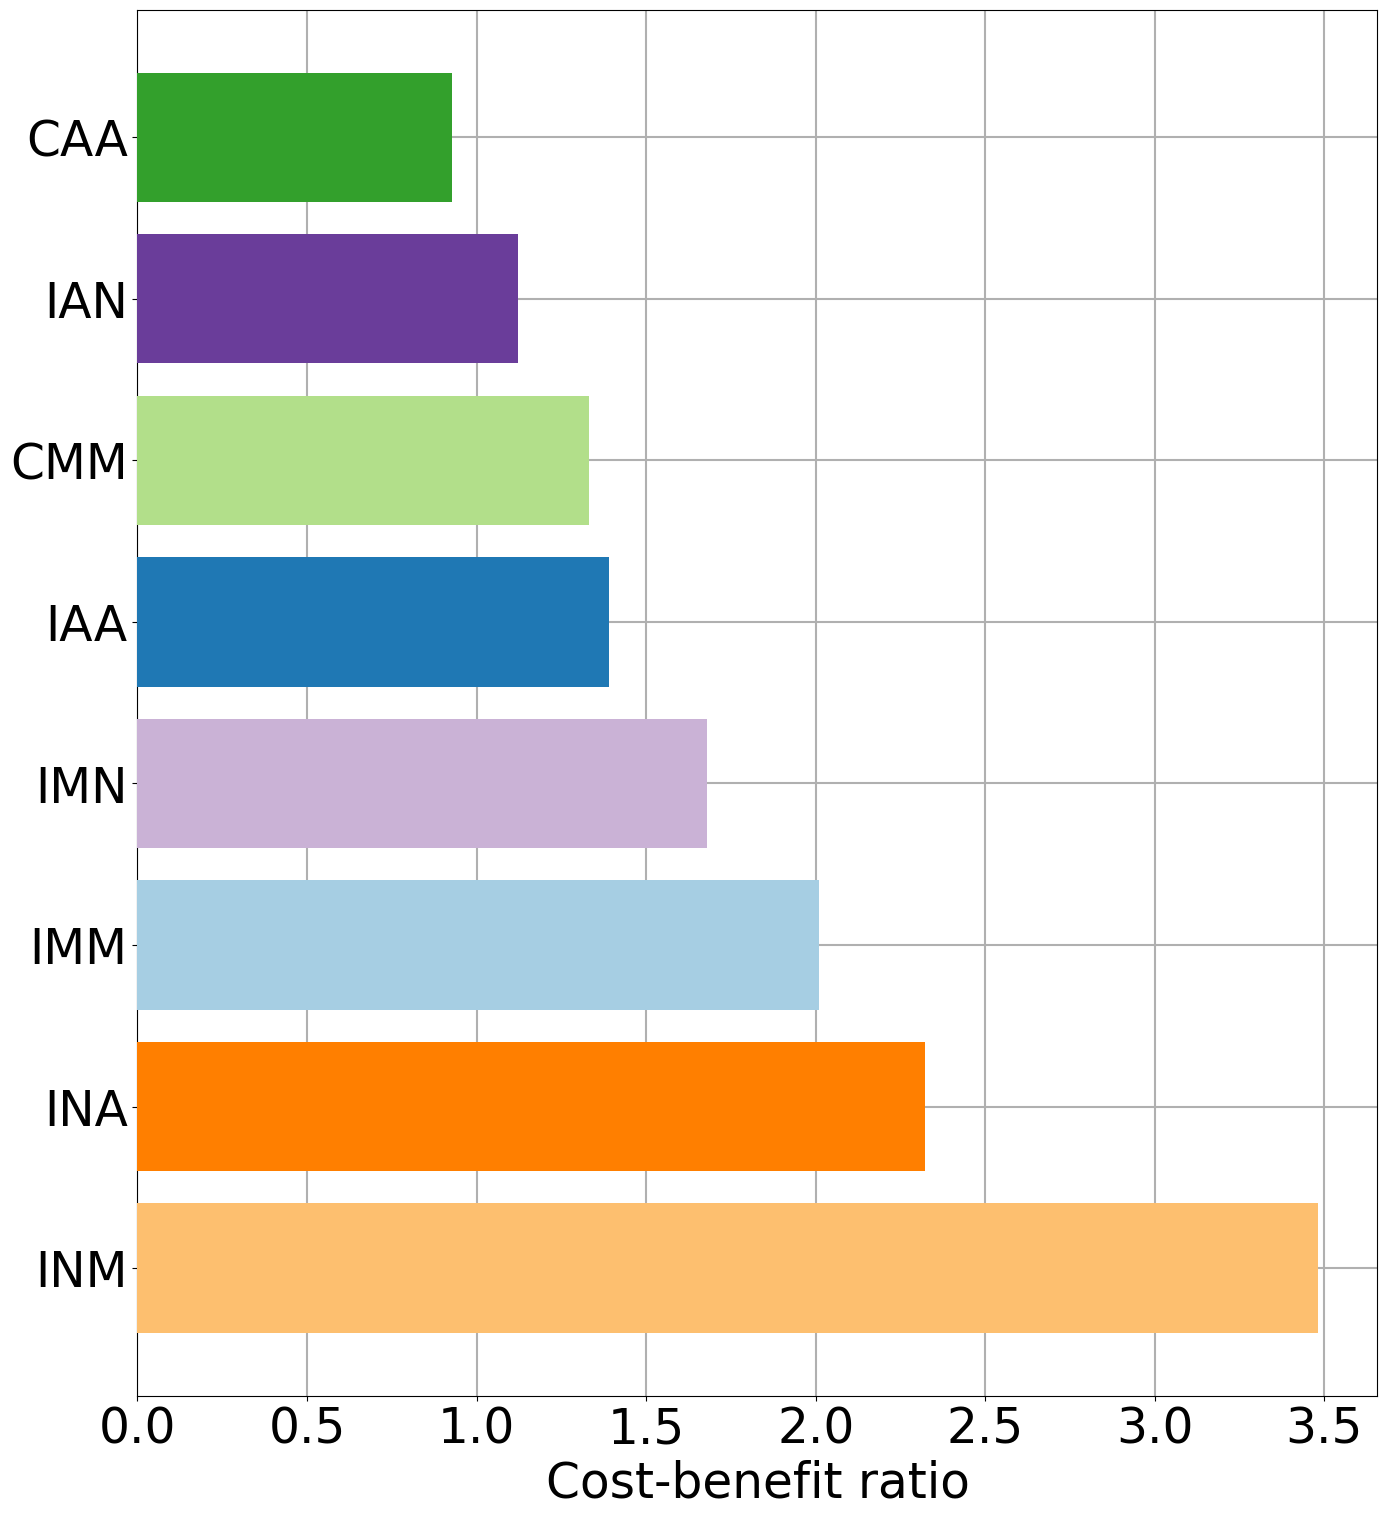

In [167]:
# Switching to a horizontal bar plot to display strategy names on the y-axis
fig, ax = plt.subplots(figsize=(16, 18))
bars = ax.barh(df_sorted.index, df_sorted['cost_benefit_ratio'],
               color=[strategy_colors[strategy] for strategy in df_sorted.index], zorder=3)

#ax.set_title('Cost/Benefit Ratio by Strategy', fontsize=14)
ax.set_xlabel('Cost-benefit ratio', fontsize=35)
ax.set_ylabel('', fontsize=35)
plt.yticks(fontsize=35)  # Larger font for strategy names
plt.xticks(fontsize=35)  # Larger font for ticks
plt.grid(True, which='both', alpha=1, linewidth=1.5, zorder=0)  # grid behind bars
#ax.set_xlim(0, max_value_filtered * 1.1)  # Set x-axis limit to slightly above max value for better display
#ax.set_xlim(0, df_sorted['cost_benefit_ratio'].replace(float('inf'), pd.NA).dropna().max() * 1.1)
plt.savefig(r'../../figures/cost-benefit-ratio.png', dpi=400, bbox_inches='tight')

plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\3014519003.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),


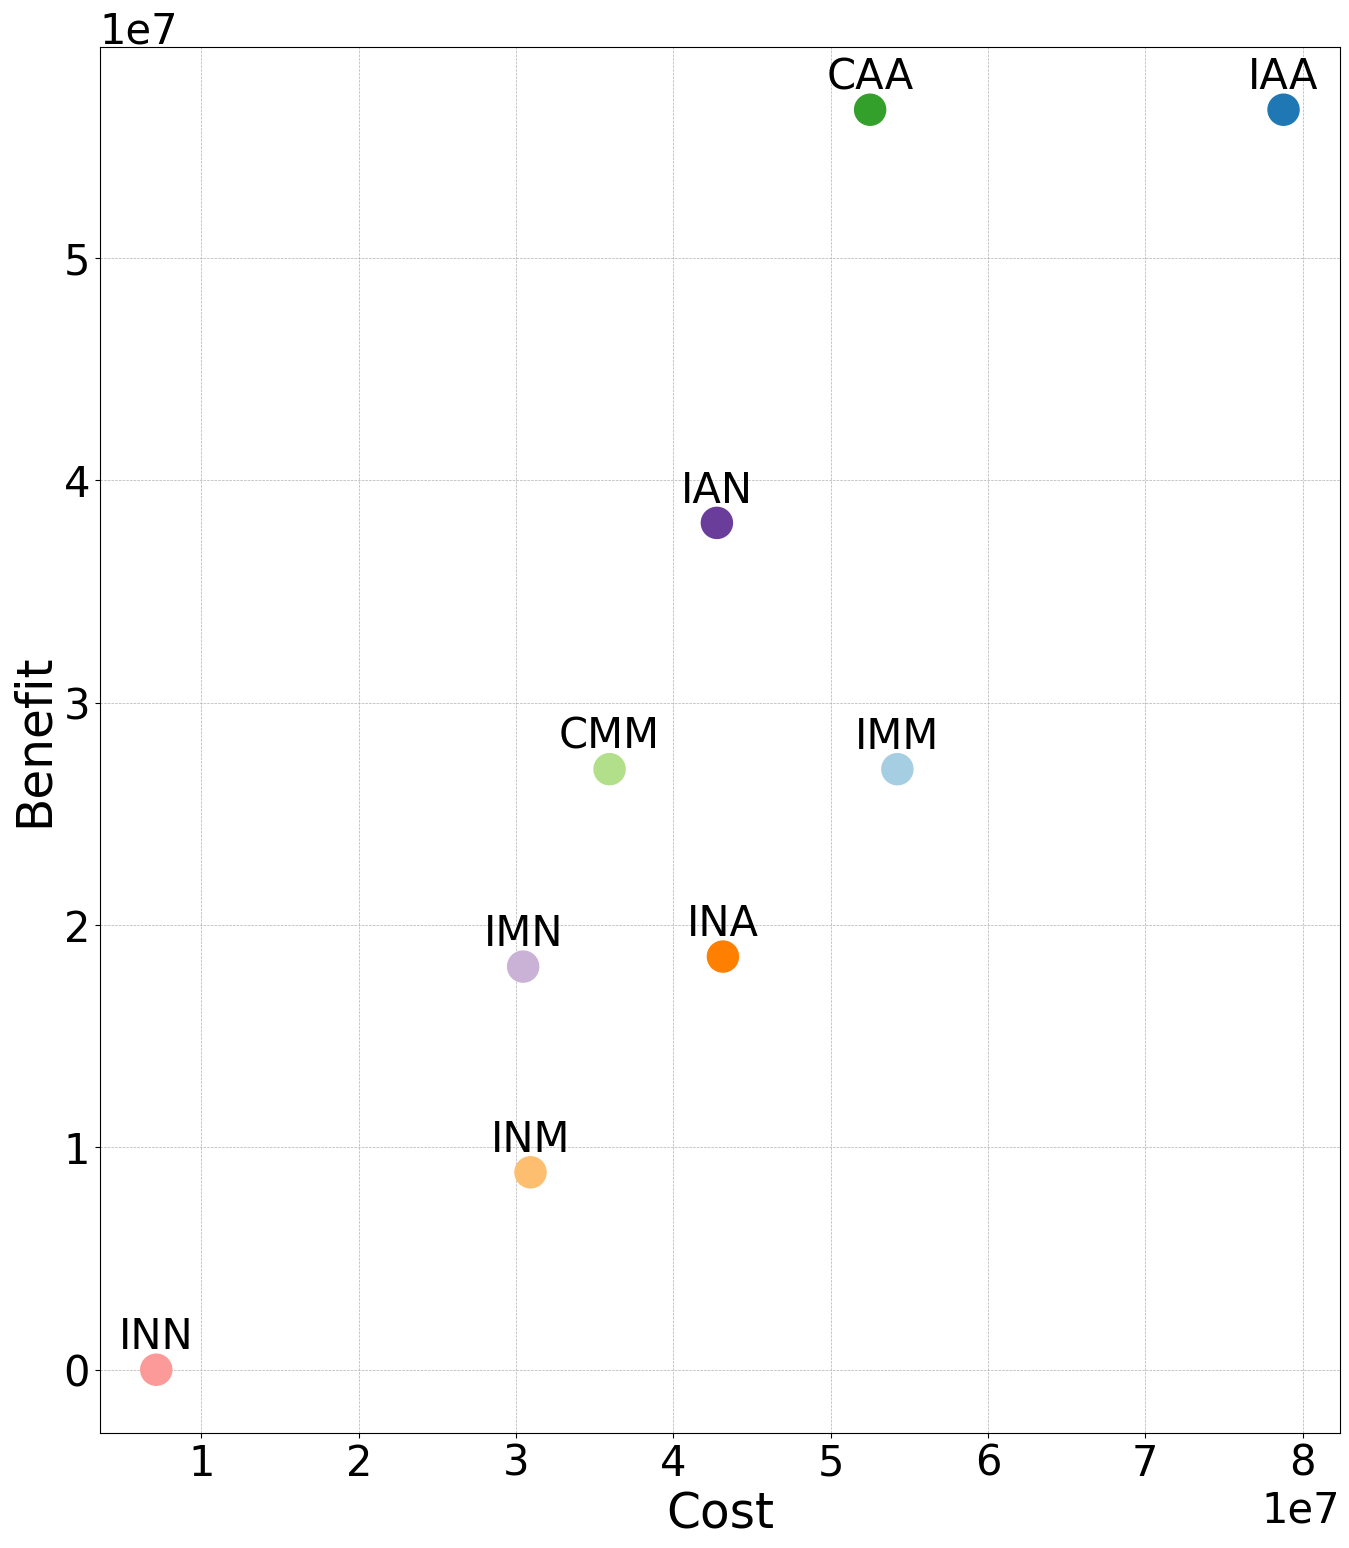

In [150]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit['total_cost'], df_npv_cost_loss_benefit['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
                     s=500, marker='o', zorder=3)  # Use circles as markers

# Formatting to match the provided plot style
ax.set_xlabel('Cost', fontsize=35)
ax.set_ylabel('Benefit', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit['total_cost'][i], df_npv_cost_loss_benefit['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

plt.savefig(r'../../figures/cost-vs-benefit.png', dpi=400, bbox_inches='tight')
plt.show()

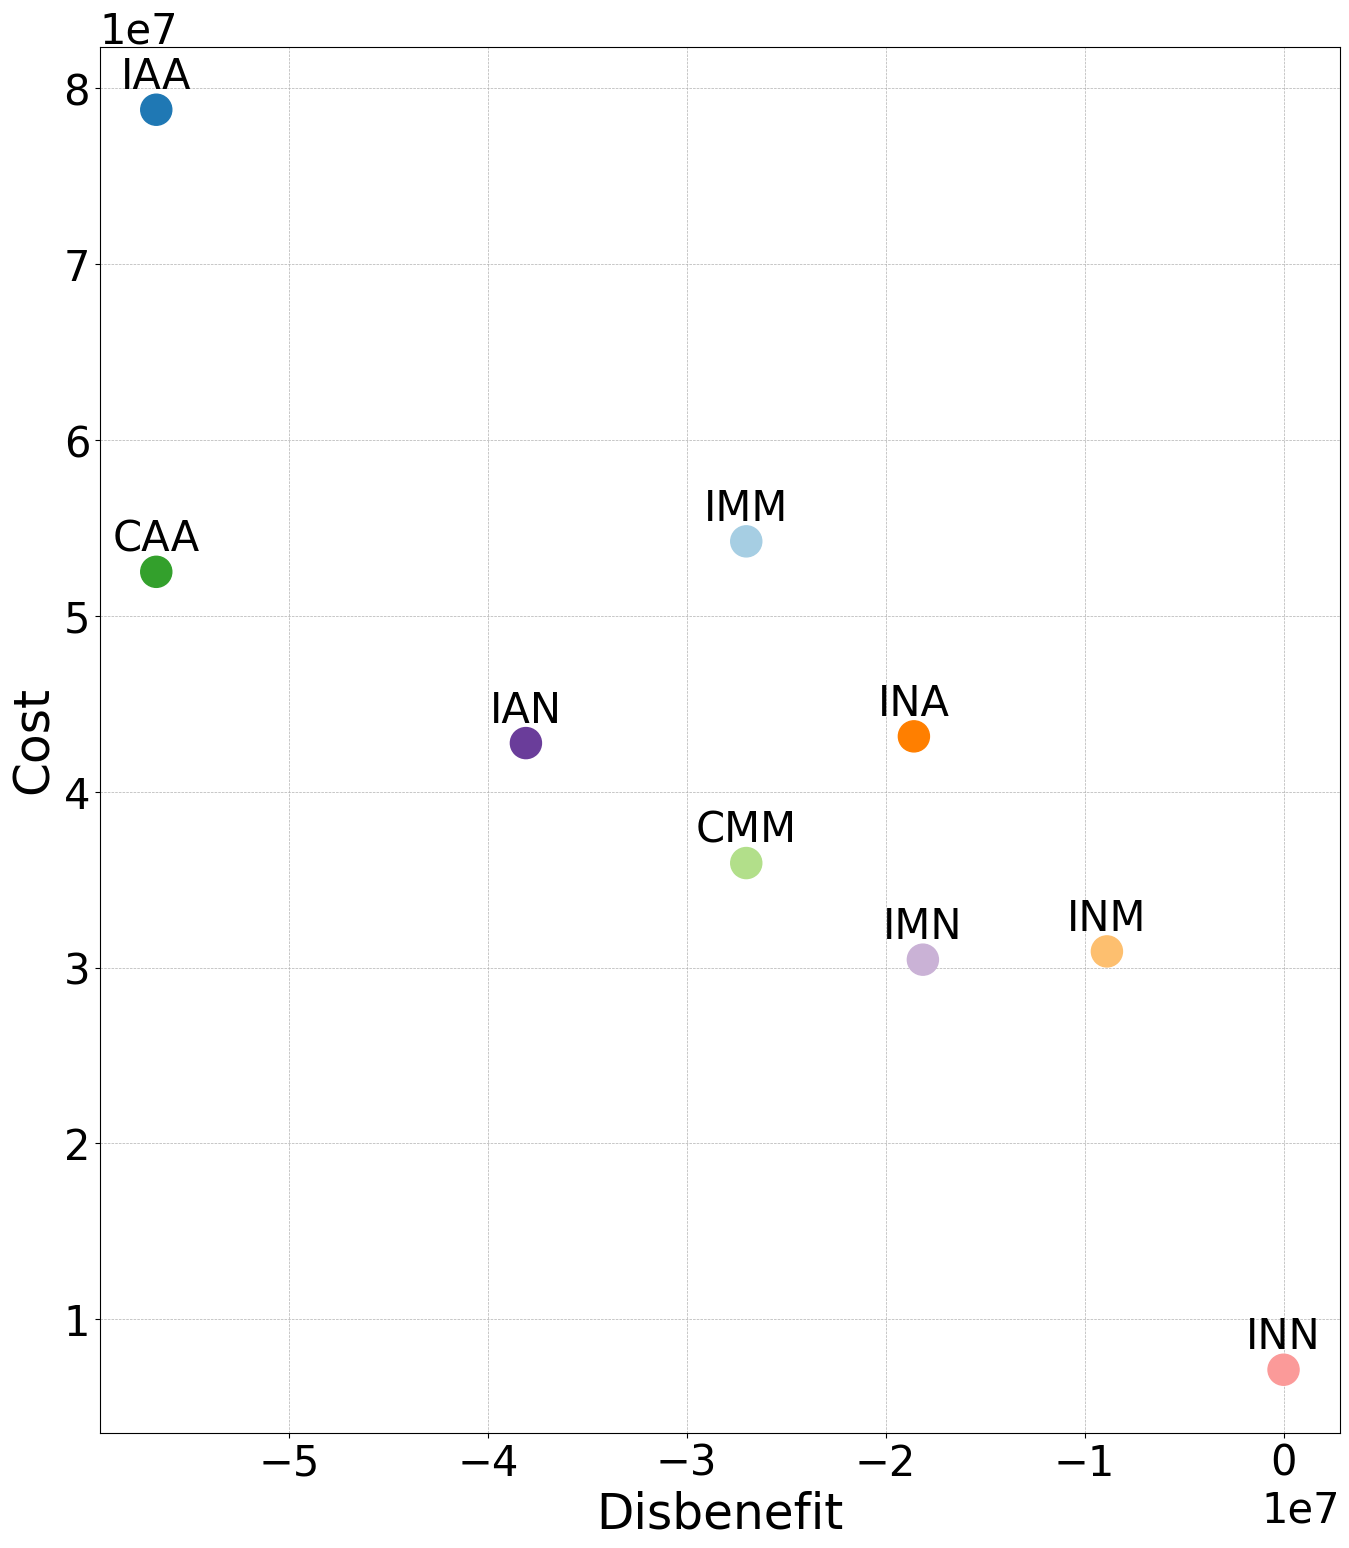

In [151]:
# Correcting the data assignment to create disbenefits from benefits
df_npv_cost_loss_benefit['disbenefit_loss'] = -1 * df_npv_cost_loss_benefit['benefit_loss']

# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(
    df_npv_cost_loss_benefit['disbenefit_loss'],
    df_npv_cost_loss_benefit['total_cost'],
    color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit.index],
    s=500, marker='o', zorder=3
)

# Proper labeling and formatting
ax.set_xlabel('Disbenefit', fontsize=35)
ax.set_ylabel('Cost', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotating each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit.index):
    ax.annotate(
        strategy,
        (df_npv_cost_loss_benefit['disbenefit_loss'].iloc[i], df_npv_cost_loss_benefit['total_cost'].iloc[i]),
        textcoords="offset points",
        xytext=(0, 15),
        ha='center',
        fontsize=30
    )

# Adjusting text size for axis offset text
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

# Save and display the plot
plt.savefig(r'../../figures/cost-vs-disbenefit.png', dpi=400, bbox_inches='tight')
plt.show()

In [152]:
df_npv_cost_loss_benefit_relative['total_cost']=df_npv_cost_loss_benefit_relative['lifecycle_infrastructure']+df_npv_cost_loss_benefit_relative['environmental_restoration']+df_npv_cost_loss_benefit_relative['safety']
df_npv_cost_loss_benefit_relative['benefit_loss']=df_npv_cost_loss_benefit_relative['avoided_economic_losses']+df_npv_cost_loss_benefit_relative['aesthetic_benefit']

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\1358801894.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),


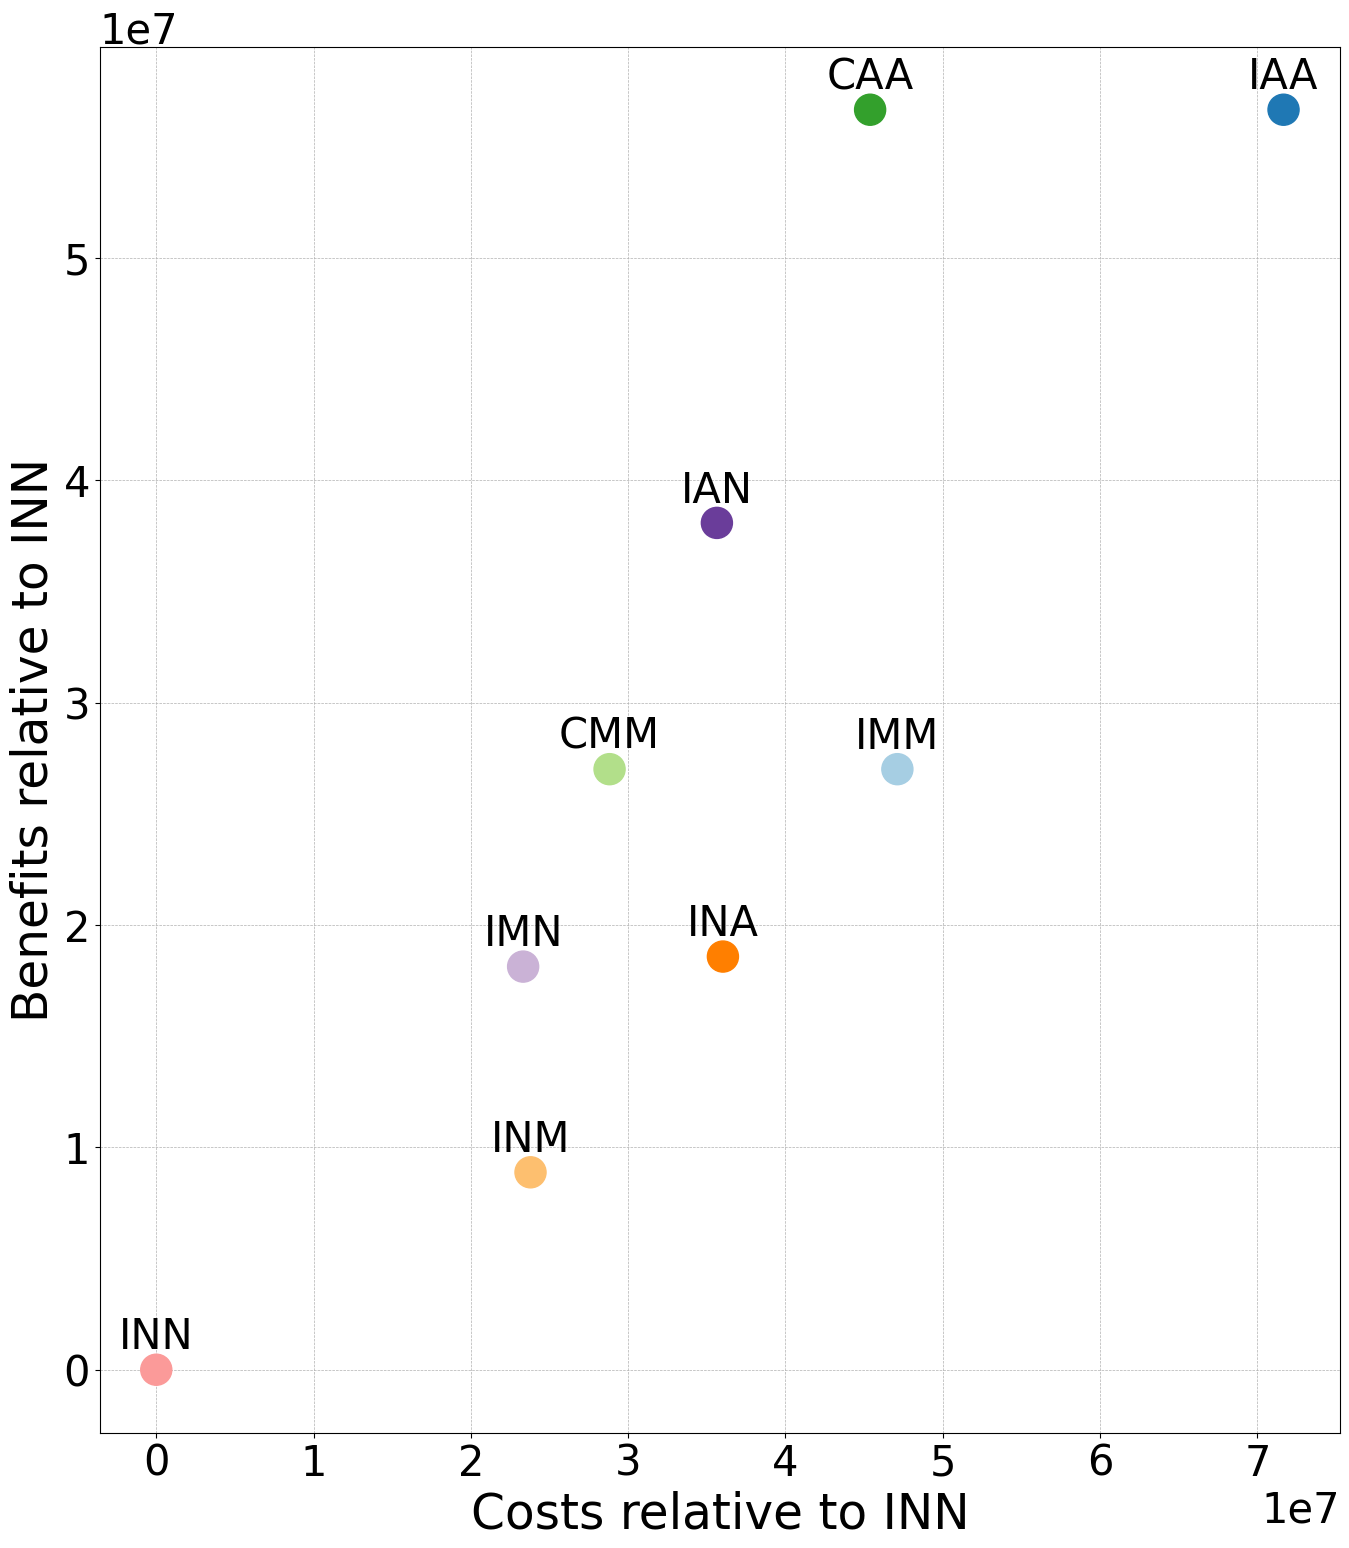

In [153]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'], df_npv_cost_loss_benefit_relative['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit_relative.index],
                     s=500, marker='o', zorder=3)  # Use circles as markers

# Formatting to match the provided plot style
ax.set_xlabel('Costs relative to INN', fontsize=35)
ax.set_ylabel('Benefits relative to INN', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit_relative.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

plt.savefig(r'../../figures/cost-vs-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\2123968020.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\2123968020.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\2123968020.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.1f}'.format(y / 1e6) for y in ax.get_yticks()])


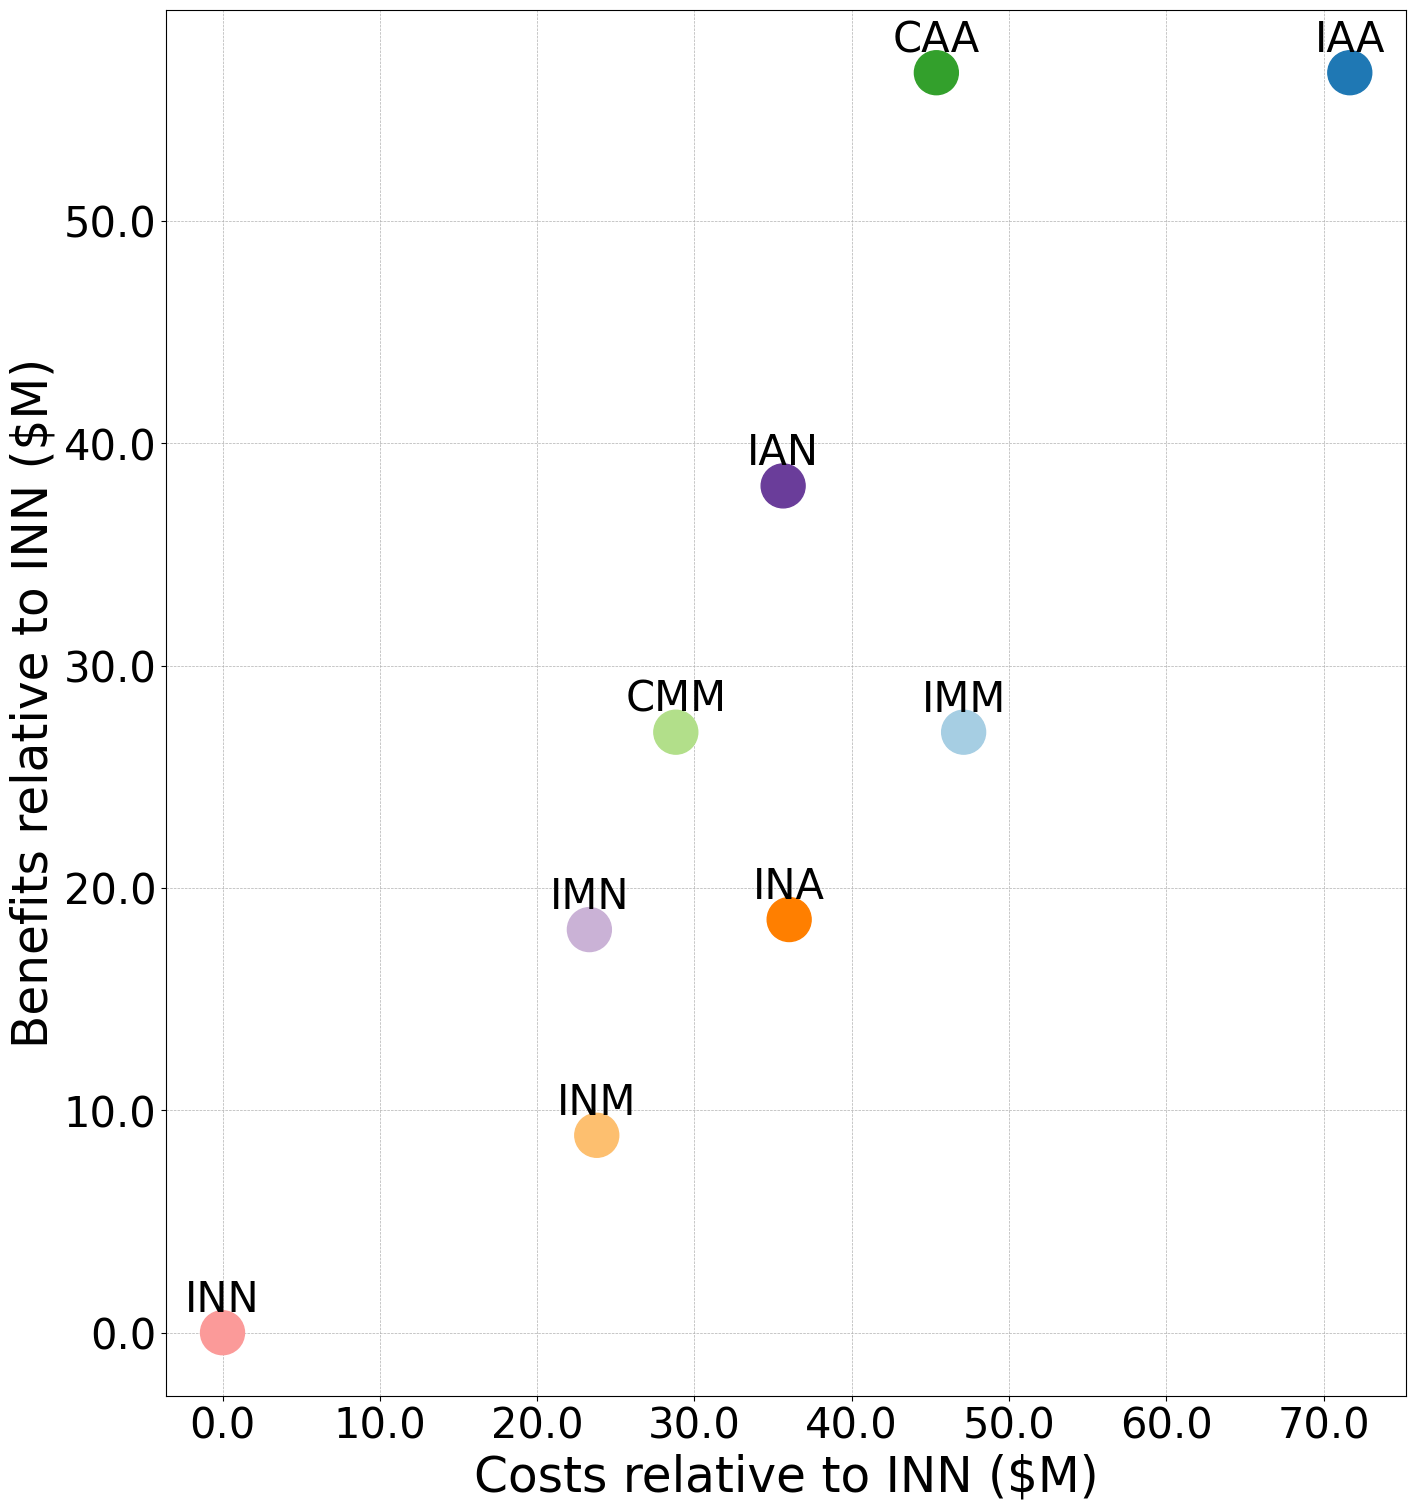

In [154]:
# Increase the circle sizes by modifying the 's' parameter in the scatter function
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'], df_npv_cost_loss_benefit_relative['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit_relative.index],
                     s=1000, marker='o', zorder=3)  # Increase the size of circles

# Formatting to match the provided plot style
ax.set_xlabel('Costs relative to INN ($M)', fontsize=35)
ax.set_ylabel('Benefits relative to INN ($M)', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit_relative.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)

# Convert x and y axis labels to millions
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set x and y ticks to show in millions
ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])
ax.set_yticklabels(['{:,.1f}'.format(y / 1e6) for y in ax.get_yticks()])

# Adjust the font size of the offset text
ax.xaxis.offsetText.set_fontsize(30)
ax.yaxis.offsetText.set_fontsize(30)

plt.savefig(r'../../figures/cost-vs-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [155]:
df_npv_cost_loss_benefit_relative = df_npv_cost_loss_benefit_relative.drop('INN')
df_npv_cost_loss_benefit_relative

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INM                    21537267.32                1422186.244   832488.950   
INA                    31280977.11                2968567.363  1774013.982   
IMN                    21068116.80                1422186.244   832488.950   
IAN                    30897813.91                2968567.363  1774013.982   
CMM                    24307815.98                2844372.488  1664977.900   
IMM                    42605384.12                2844372.488  1664977.900   
CAA                    35896399.02                5937134.726  3548027.963   
IAA                    62178791.02                5937134.726  3548027.963   

          aesthetic_benefit  avoided_economic_losses    total_cost  \
Strategy                                                             
INM            4.284824e+05             8.449969e+06  2.379194e+07   
INA            7.669424e+05             1.781414e+07  3.602356e+07   
IMN            4.284824e+05             1.770095e+07  2.332279e+07   
IAN            7.669424e+05             3.731697e+07  3.564040e+07   
CMM            8.569649e+05             2.615092e+07  2.881717e+07   
IMM            8.569649e+05             2.615092e+07  4.711473e+07   
CAA            1.533885e+06             5.513111e+07  4.538156e+07   
IAA            1.533885e+06             5.513111e+07  7.166395e+07   

          benefit_loss  
Strategy                
INM       8.878452e+06  
INA       1.858108e+07  
IMN       1.812943e+07  
IAN       3.808391e+07  
CMM       2.700788e+07  
IMM       2.700788e+07  
CAA       5.666499e+07  
IAA       5.666499e+07

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\4058073001.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\4058073001.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])
C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\4058073001.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:,.1f}'.format(y / 1e6) for y in ax.get_yticks()])


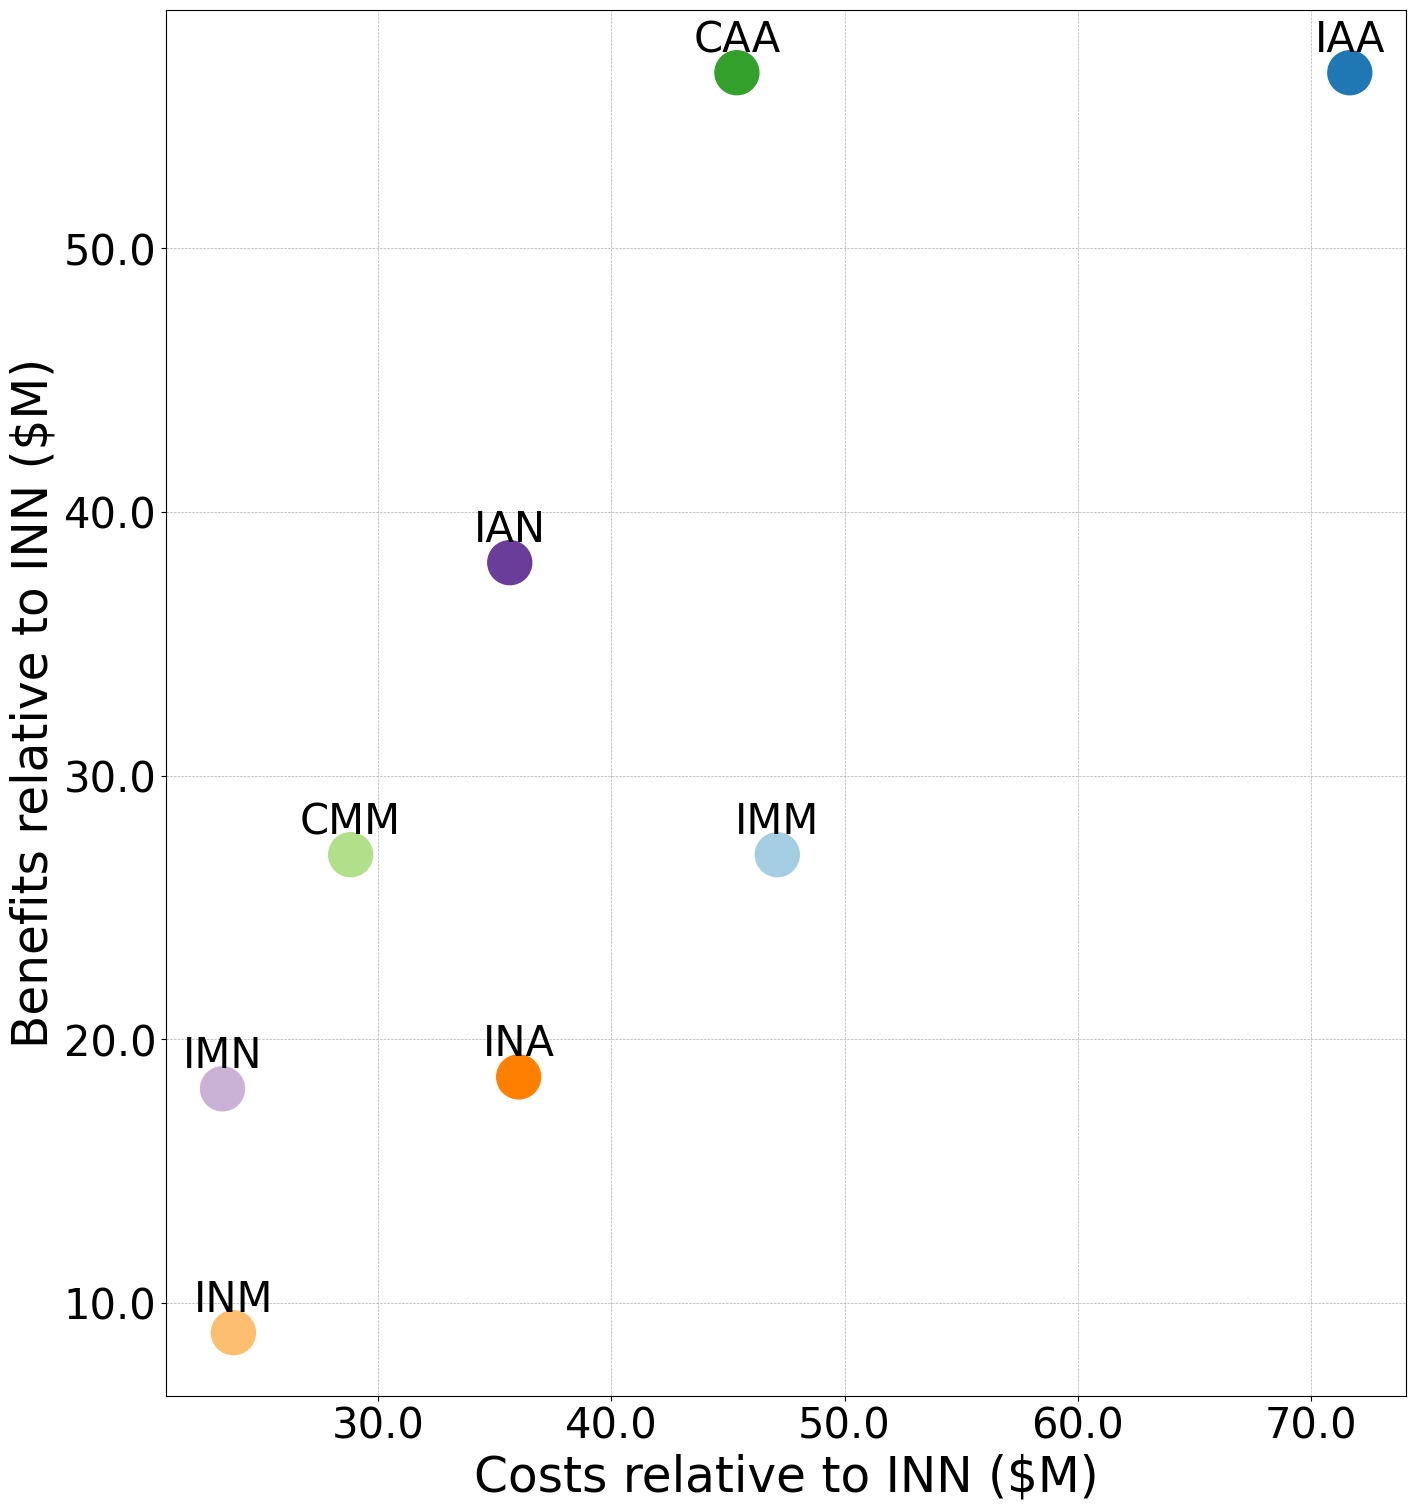

In [156]:
# Increase the circle sizes by modifying the 's' parameter in the scatter function
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'], df_npv_cost_loss_benefit_relative['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit_relative.index],
                     s=1000, marker='o', zorder=3)  # Increase the size of circles

# Formatting to match the provided plot style
ax.set_xlabel('Costs relative to INN ($M)', fontsize=35)
ax.set_ylabel('Benefits relative to INN ($M)', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True, linestyle='--', linewidth=0.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit_relative.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
                textcoords="offset points", xytext=(0,15), ha='center', fontsize=30)

# Convert x and y axis labels to millions
ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

# Set x and y ticks to show in millions
ax.set_xticklabels(['{:,.1f}'.format(x / 1e6) for x in ax.get_xticks()])
ax.set_yticklabels(['{:,.1f}'.format(y / 1e6) for y in ax.get_yticks()])

plt.savefig(r'../../figures/cost-vs-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\1561876909.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),


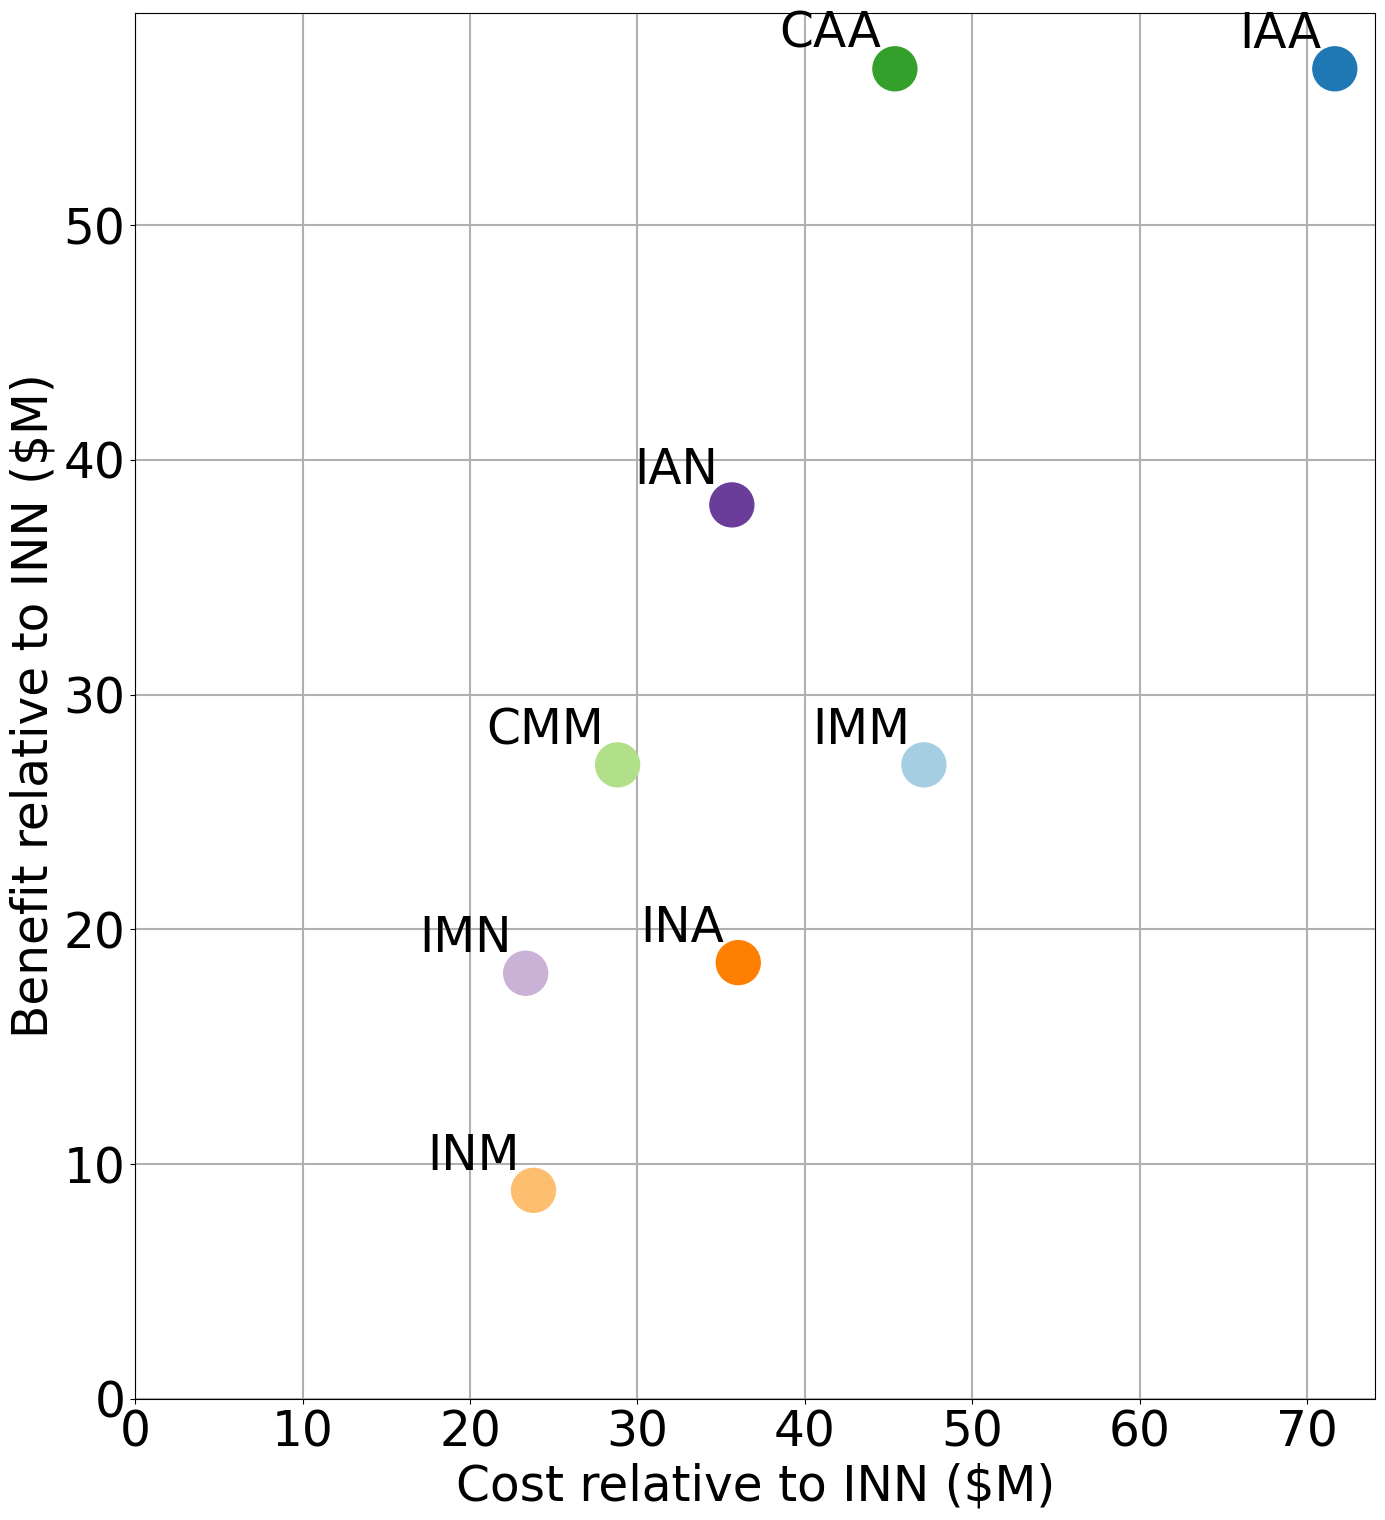

In [333]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))
scatter = ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'], df_npv_cost_loss_benefit_relative['benefit_loss'],
                     color=[strategy_colors[strategy] for strategy in df_npv_cost_loss_benefit_relative.index],
                     s=1000, marker='o', zorder=3)  # Increase the size of circles

# Formatting to match the provided plot style
ax.set_xlabel('Cost relative to INN ($M)', fontsize=35)
ax.set_ylabel('Benefit relative to INN ($M)', fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.grid(True, alpha=1, linewidth=1.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit_relative.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
                textcoords="offset points", xytext=(-10, 15), ha='right', fontsize=35)

# Set x and y axis limits to start from (0,0)
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_ylim(0, ax.get_ylim()[1])

# Convert x and y axis labels to show in millions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 1e6)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:,.0f}'.format(y / 1e6)))

plt.savefig(r'../../figures/cost-vs-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


C:\Users\Mahsa\AppData\Local\Temp\ipykernel_23580\429422856.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),


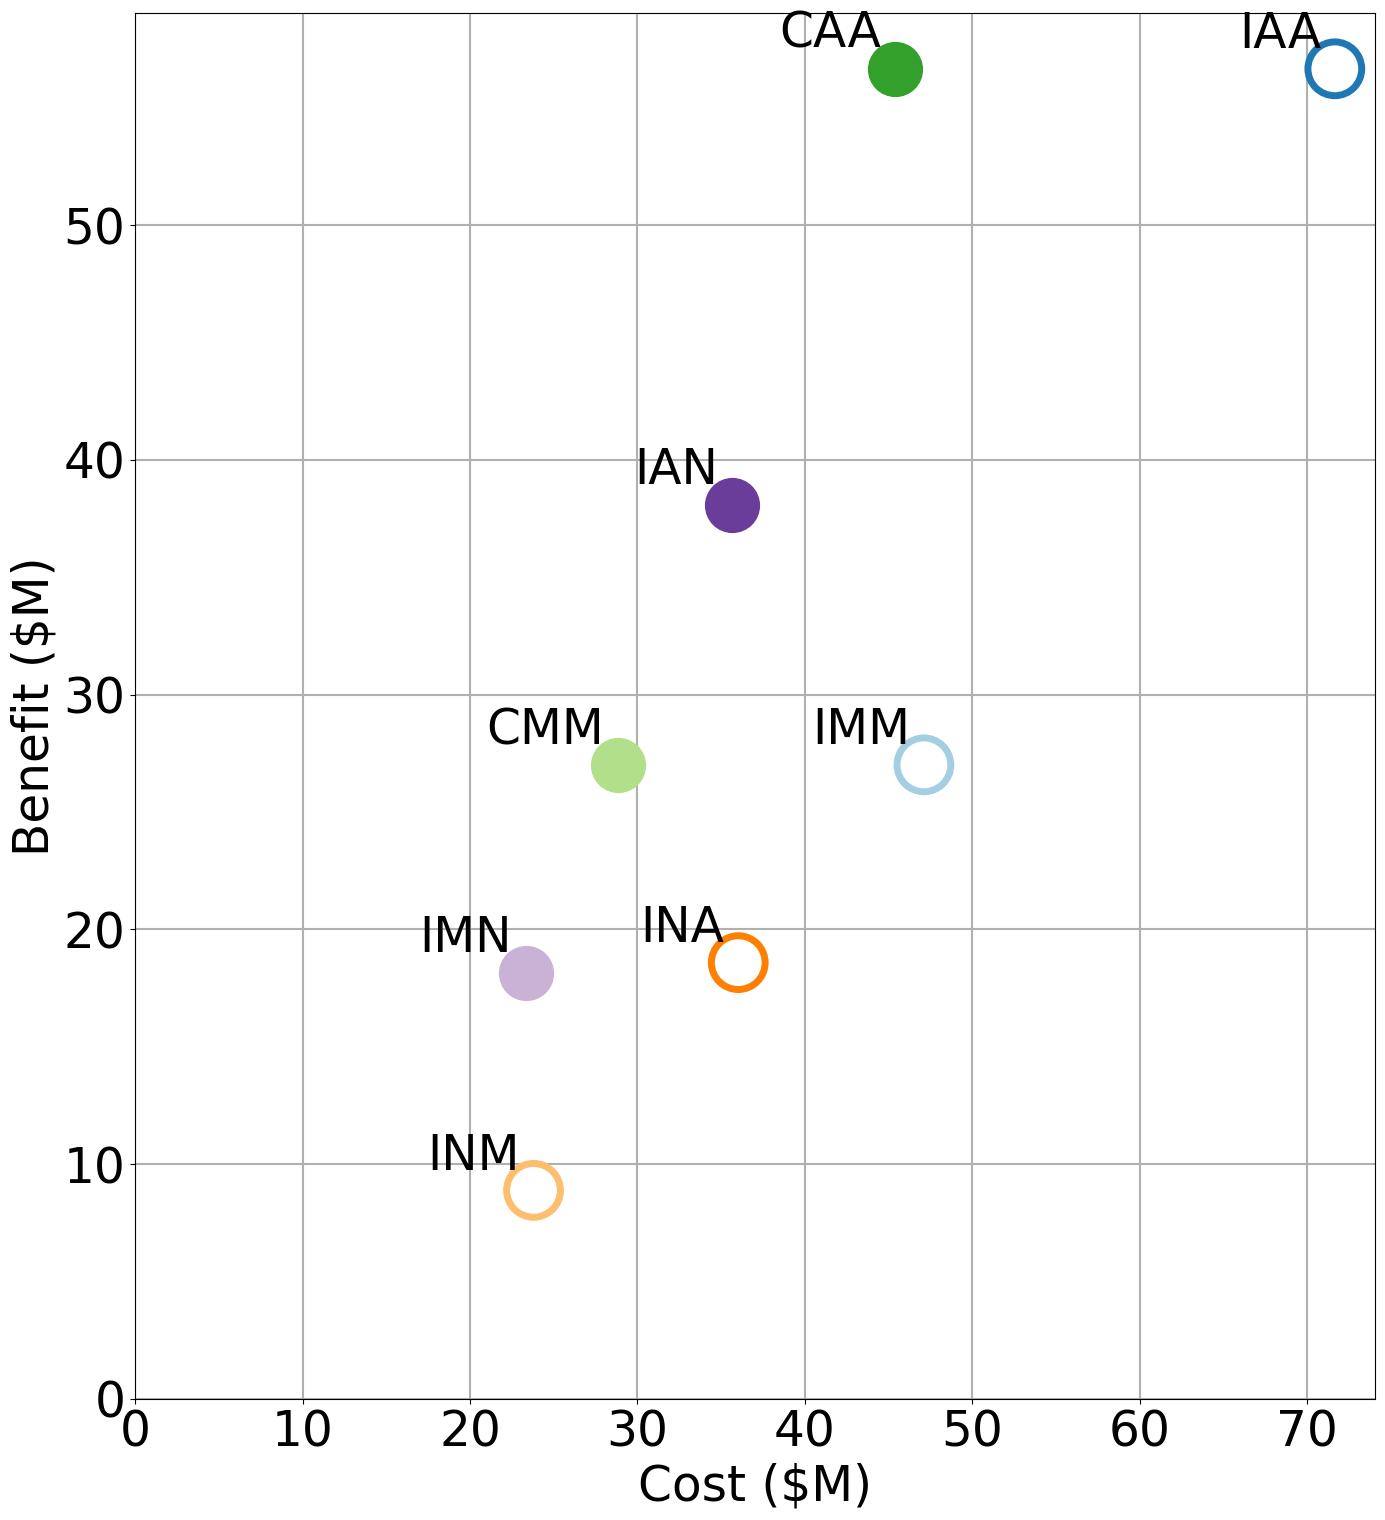

In [340]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(16, 18))

# Plot all strategies
for strategy in df_npv_cost_loss_benefit_relative.index:
    if strategy in ['IAA', 'IMM', 'INA', 'INM']:
        ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'][strategy], df_npv_cost_loss_benefit_relative['benefit_loss'][strategy],
                   edgecolor=strategy_colors[strategy], facecolor='none', s=1500, marker='o', linewidth=5, zorder=3)  # Empty circles with thicker border
    else:
        ax.scatter(df_npv_cost_loss_benefit_relative['total_cost'][strategy], df_npv_cost_loss_benefit_relative['benefit_loss'][strategy],
                   color=strategy_colors[strategy], s=1500, marker='o', zorder=3)  # Filled circles

# Formatting to match the provided plot style
#ax.set_xlabel('Cost relative to INN ($M)', fontsize=35)
#ax.set_ylabel('Benefit relative to INN ($M)', fontsize=35)
ax.set_xlabel('Cost ($M)', fontsize=35)
ax.set_ylabel('Benefit ($M)', fontsize=35)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.grid(True, alpha=1, linewidth=1.5)

# Annotate each point with the strategy name
for i, strategy in enumerate(df_npv_cost_loss_benefit_relative.index):
    ax.annotate(strategy, (df_npv_cost_loss_benefit_relative['total_cost'][i], df_npv_cost_loss_benefit_relative['benefit_loss'][i]),
                textcoords="offset points", xytext=(-10, 15), ha='right', fontsize=35)

# Set x and y axis limits to start from (0,0)
ax.set_xlim(0, ax.get_xlim()[1])
ax.set_ylim(0, ax.get_ylim()[1])

# Convert x and y axis labels to show in millions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x / 1e6)))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:,.0f}'.format(y / 1e6)))

plt.savefig(r'../../figures/cost-vs-benefit-relative.png', dpi=400, bbox_inches='tight')
plt.show()


In [158]:
df_npv_cost_loss_benefit_relative

lifecycle_infrastructure  environmental_restoration       safety  \
Strategy                                                                     
INM                    21537267.32                1422186.244   832488.950   
INA                    31280977.11                2968567.363  1774013.982   
IMN                    21068116.80                1422186.244   832488.950   
IAN                    30897813.91                2968567.363  1774013.982   
CMM                    24307815.98                2844372.488  1664977.900   
IMM                    42605384.12                2844372.488  1664977.900   
CAA                    35896399.02                5937134.726  3548027.963   
IAA                    62178791.02                5937134.726  3548027.963   

          aesthetic_benefit  avoided_economic_losses    total_cost  \
Strategy                                                             
INM            4.284824e+05             8.449969e+06  2.379194e+07   
INA            7.669424e+05             1.781414e+07  3.602356e+07   
IMN            4.284824e+05             1.770095e+07  2.332279e+07   
IAN            7.669424e+05             3.731697e+07  3.564040e+07   
CMM            8.569649e+05             2.615092e+07  2.881717e+07   
IMM            8.569649e+05             2.615092e+07  4.711473e+07   
CAA            1.533885e+06             5.513111e+07  4.538156e+07   
IAA            1.533885e+06             5.513111e+07  7.166395e+07   

          benefit_loss  
Strategy                
INM       8.878452e+06  
INA       1.858108e+07  
IMN       1.812943e+07  
IAN       3.808391e+07  
CMM       2.700788e+07  
IMM       2.700788e+07  
CAA       5.666499e+07  
IAA       5.666499e+07